# TITANIC SURVIVAL PREDICTION

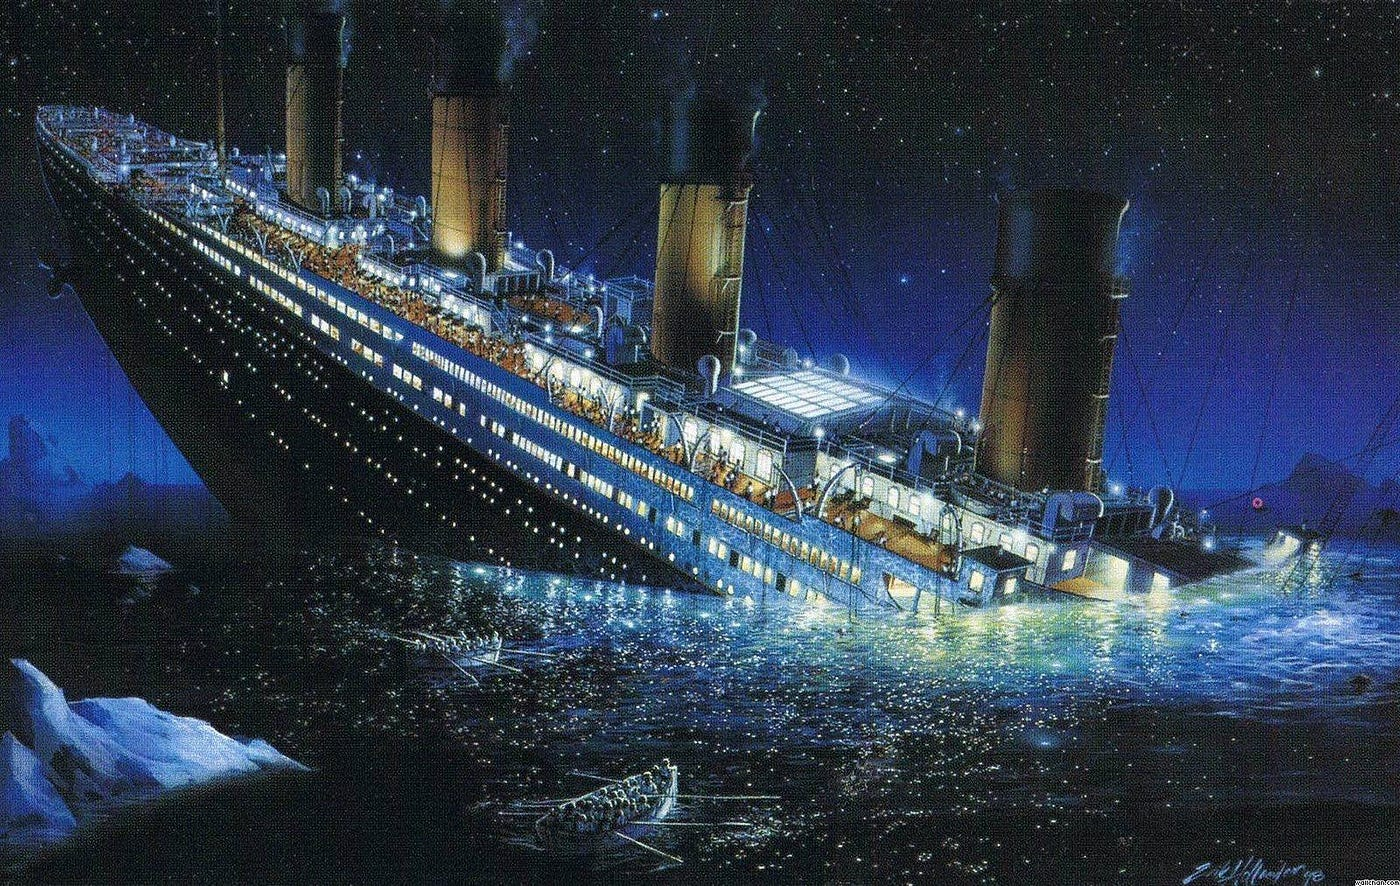

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:/Users/91784/Downloads/archive/tested.csv")
df

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292   NaN        Q  
1                363272    7.0000   NaN        S  
2                240276    9.6875   NaN        Q  
3                315154    8.6625   NaN        S  
4               3101298   12.2875   NaN        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[418 rows x 12 columns]

In [4]:
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [5]:
df.tail()

PassengerId  Survived  Pclass                          Name     Sex  \
413         1305         0       3            Spector, Mr. Woolf    male   
414         1306         1       1  Oliva y Ocana, Dona. Fermina  female   
415         1307         0       3  Saether, Mr. Simon Sivertsen    male   
416         1308         0       3           Ware, Mr. Frederick    male   
417         1309         0       3      Peter, Master. Michael J    male   

      Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
413   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  39.0      0      0            PC 17758  108.9000  C105        C  
415  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416   NaN      0      0              359309    8.0500   NaN        S  
417   NaN      1      1                2668   22.3583   NaN        C

In [6]:
df.shape

(418, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df=df.drop('Cabin',axis=1)

In [11]:
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [12]:
df

Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0           0       3    male  34.5      0      0    7.8292        Q
1           1       3  female  47.0      1      0    7.0000        S
2           0       2    male  62.0      0      0    9.6875        Q
3           0       3    male  27.0      0      0    8.6625        S
4           1       3  female  22.0      1      1   12.2875        S
..        ...     ...     ...   ...    ...    ...       ...      ...
413         0       3    male   NaN      0      0    8.0500        S
414         1       1  female  39.0      0      0  108.9000        C
415         0       3    male  38.5      0      0    7.2500        S
416         0       3    male   NaN      0      0    8.0500        S
417         0       3    male   NaN      1      1   22.3583        C

[418 rows x 8 columns]

In [13]:
#dividing object and numerical columns and making a list
object_columns=df.select_dtypes(include='object').columns.tolist()
numerical_columns=df.select_dtypes(include=['int','float']).columns.tolist()
print("object columns:",object_columns)
print('\n')
print("Numerical columns:",numerical_columns)

object columns: ['Sex', 'Embarked']


Numerical columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [14]:
numeric_features=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for feature in numeric_features:
    df[feature].fillna(df[feature].mean(),inplace=True)
categorical_features=['Sex', 'Embarked']
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0],inplace=True)

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [17]:
df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
mean     0.363636    2.265550   30.272590    0.447368    0.392344   35.627188
std      0.481622    0.841838   12.634534    0.896760    0.981429   55.840500
min      0.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   23.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   30.272590    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.750000    1.000000    0.000000   31.500000
max      1.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [18]:
df.nunique()  

Survived      2
Pclass        3
Sex           2
Age          80
SibSp         7
Parch         8
Fare        170
Embarked      3
dtype: int64

In [19]:
for i in object_columns:
    print(i)
    print(df[i].unique())
    print('\n')

Sex
['male' 'female']


Embarked
['Q' 'S' 'C']




In [20]:
for i in object_columns:
    print(i)
    print(df[i].value_counts())
    print('\n')

Sex
male      266
female    152
Name: Sex, dtype: int64


Embarked
S    270
C    102
Q     46
Name: Embarked, dtype: int64




Countplot for: Sex


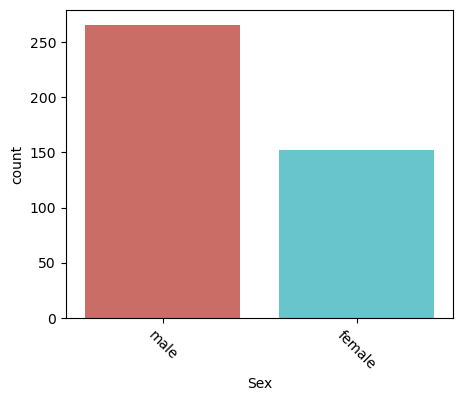



Countplot for: Embarked


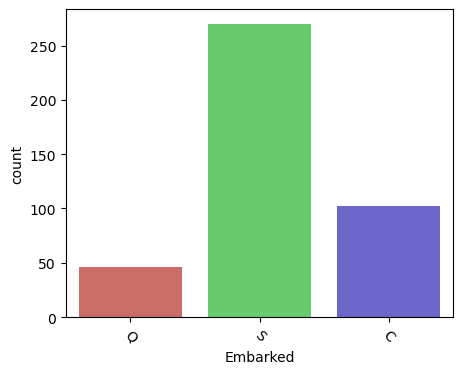

In [21]:
for i in object_columns:
    print('Countplot for:',i)
    plt.figure(figsize=(5,4))
    sns.countplot(x=df[i],data=df,palette='hls')
    plt.xticks(rotation=-45)
    plt.show()
    print('\n')

In [22]:
#graphical object
#plotly is used for better visualization that matplot or seaborn
for i in object_columns:
    fig=go.Figure(data=[go.Bar(x=df[i].value_counts().index,y=df[i].value_counts())])#go means low level interface for visualization. it will control our plot
    fig.update_layout(
    title=i,
    xaxis_title=i,
    yaxis_title="count")
    fig.show()

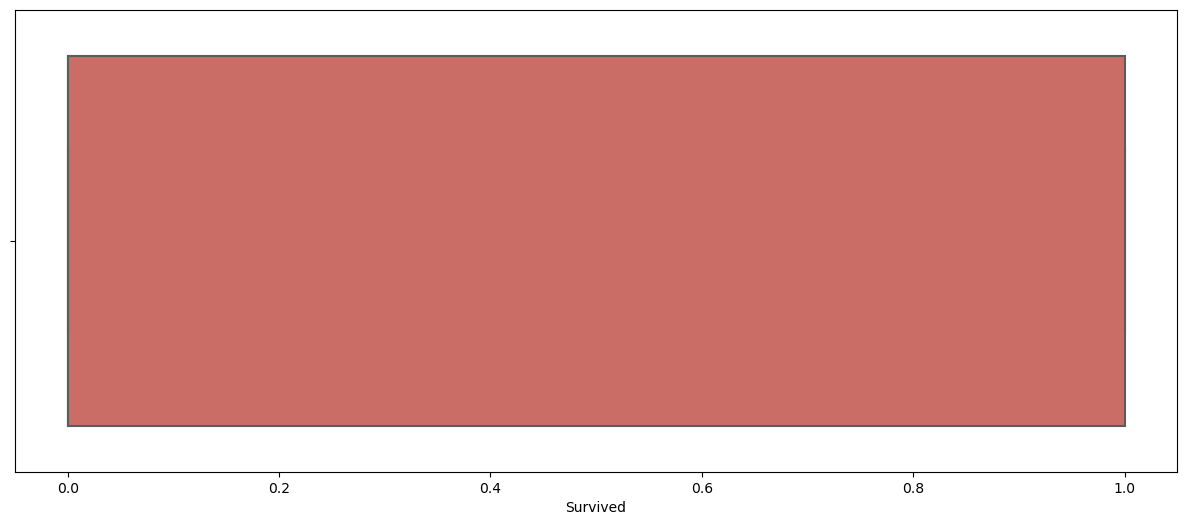

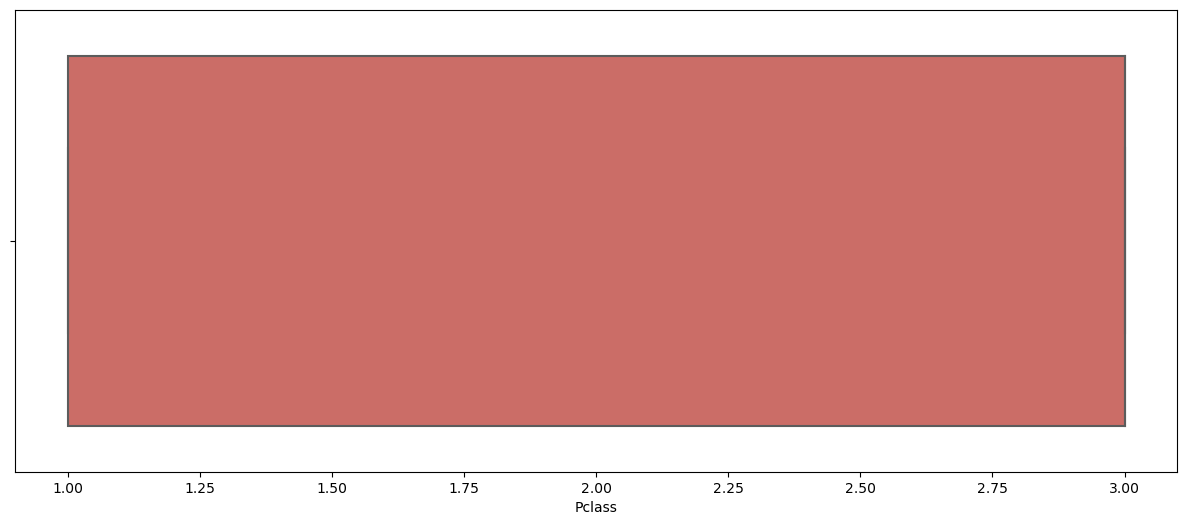

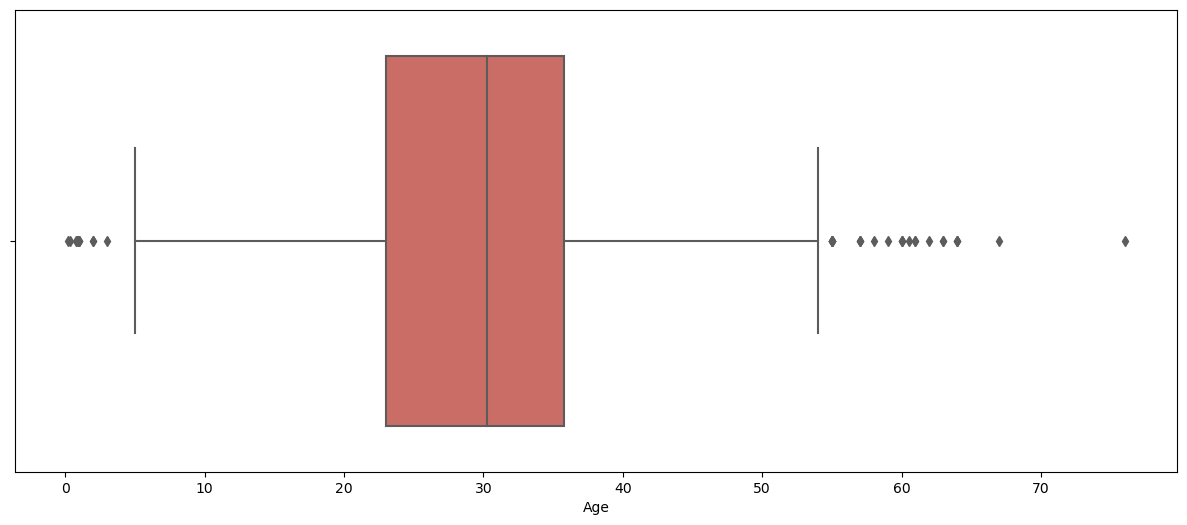

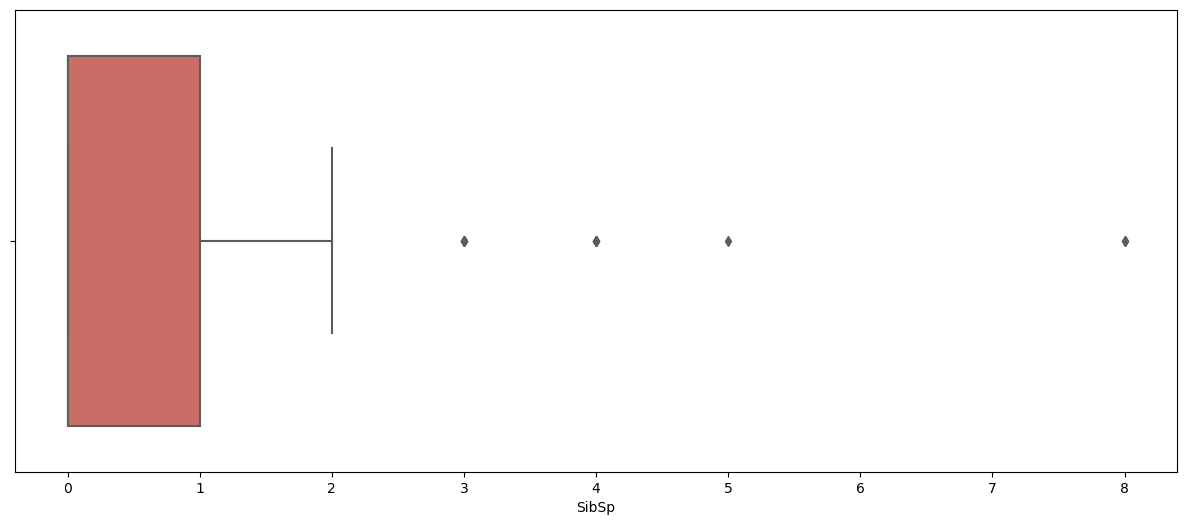

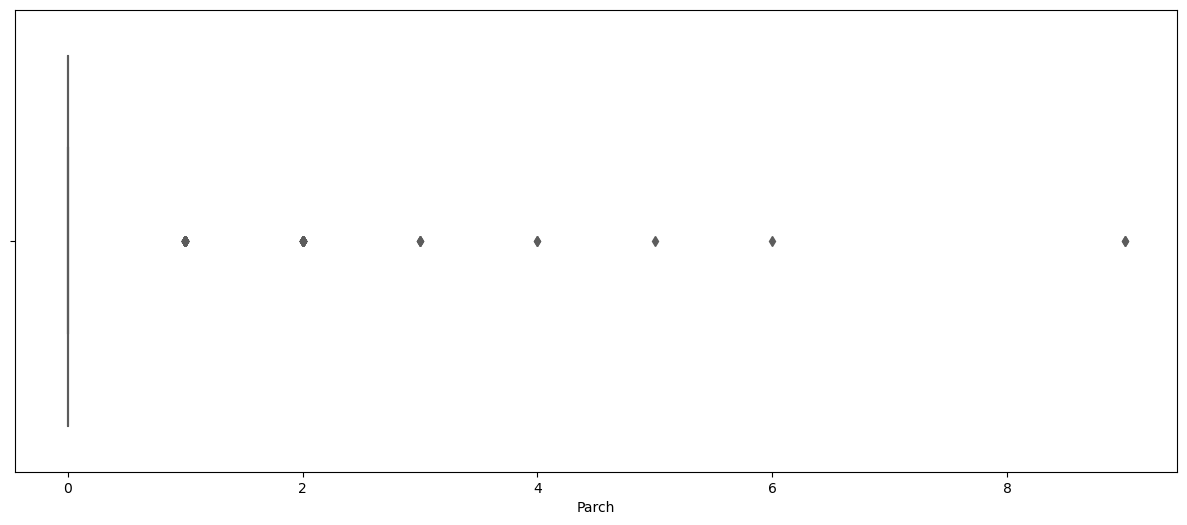

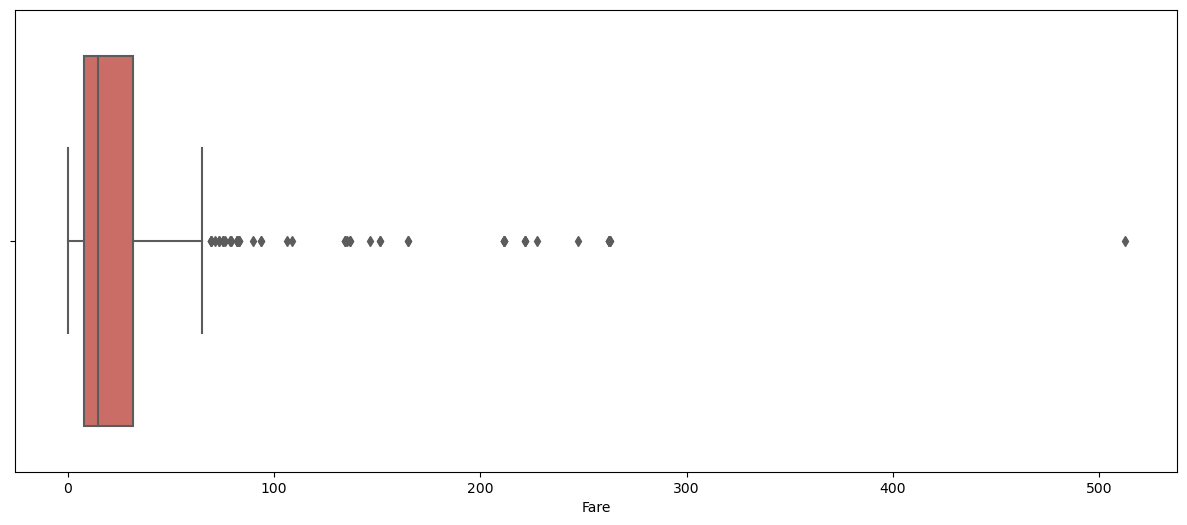

In [23]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=df[i],data=df,palette='hls')
    plt.xticks(rotation=0)
    plt.show()

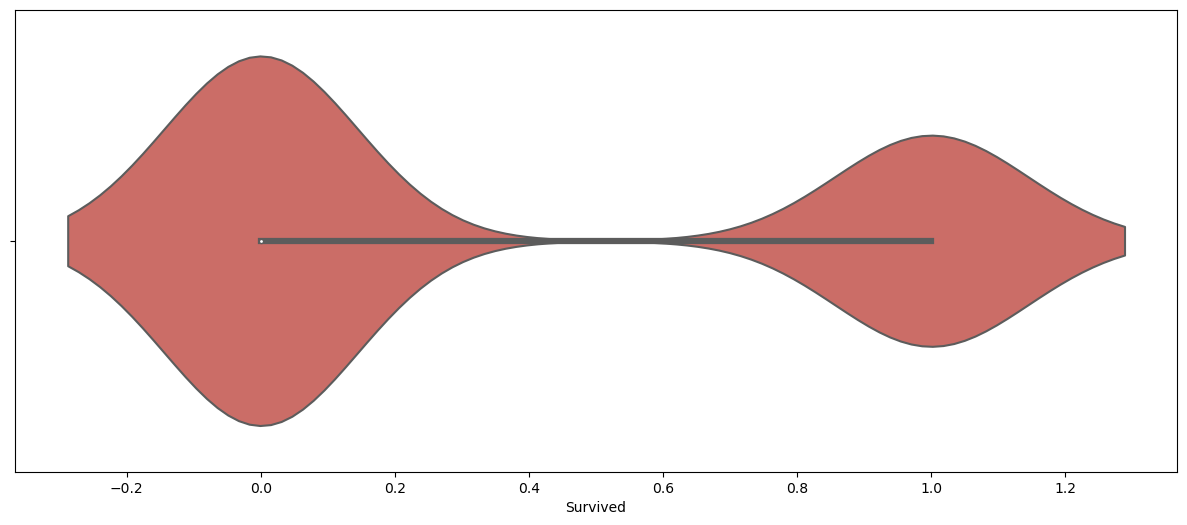

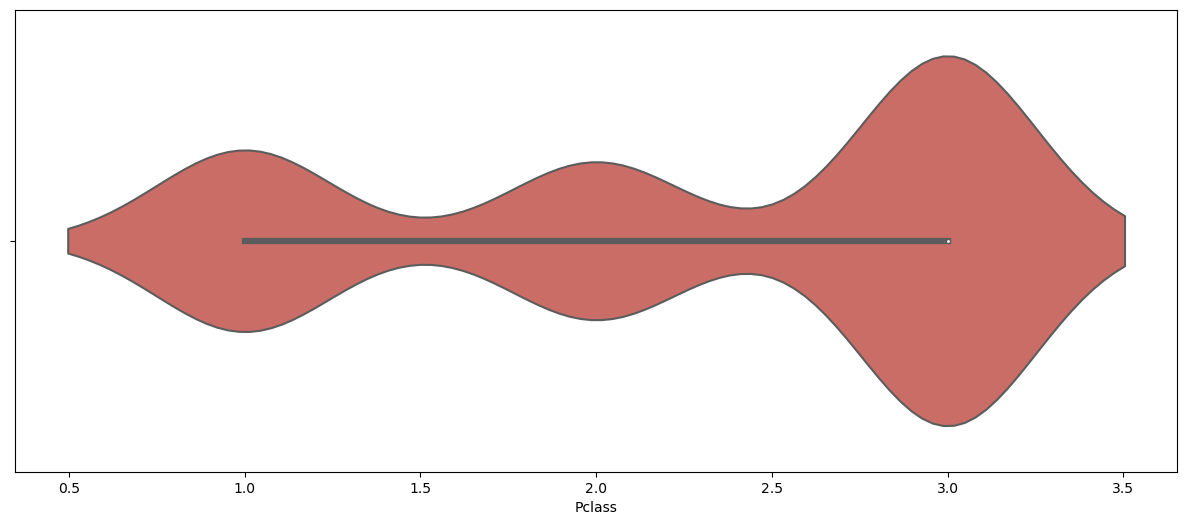

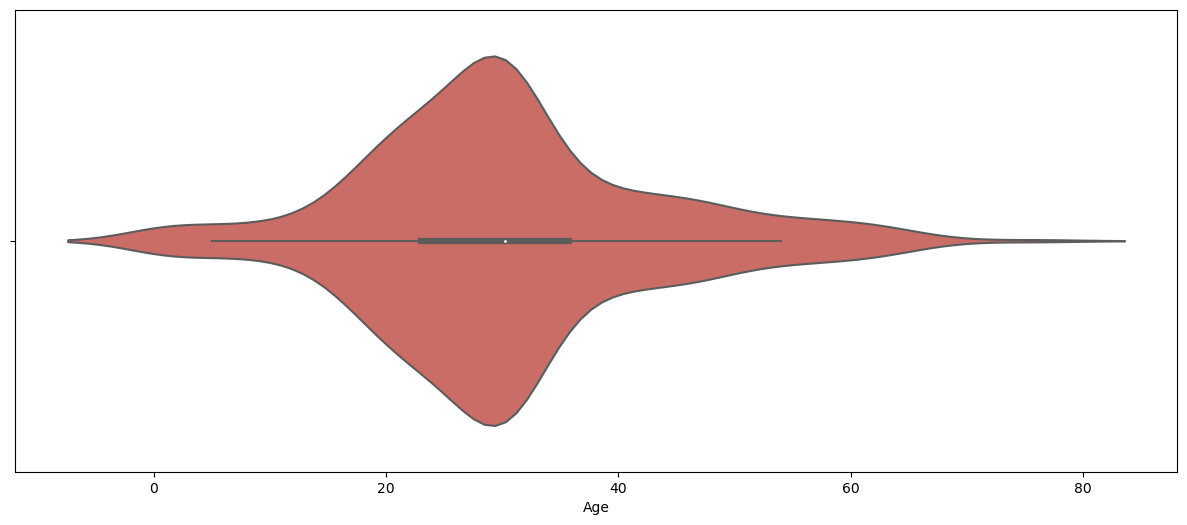

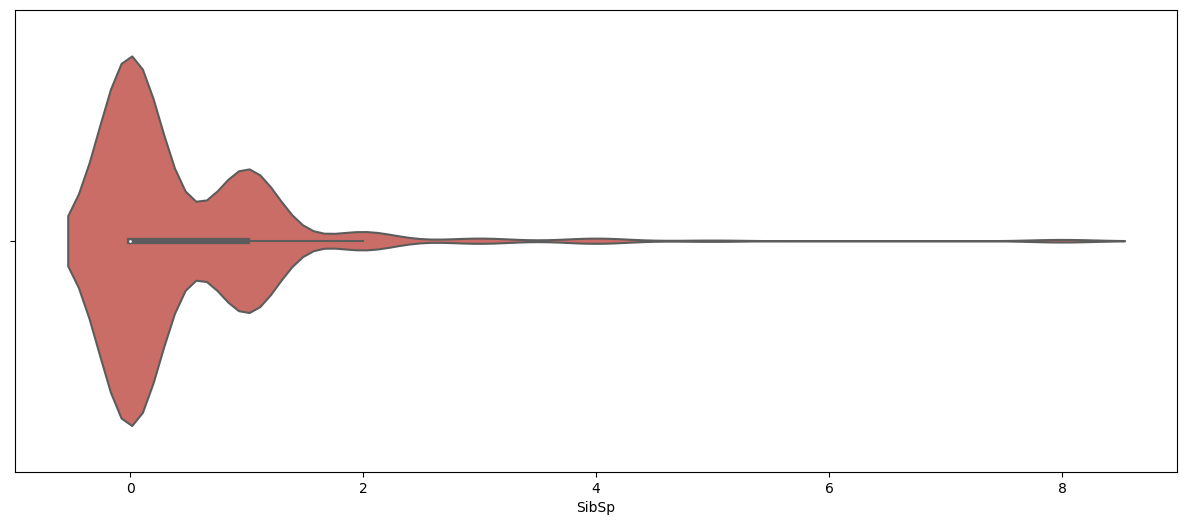

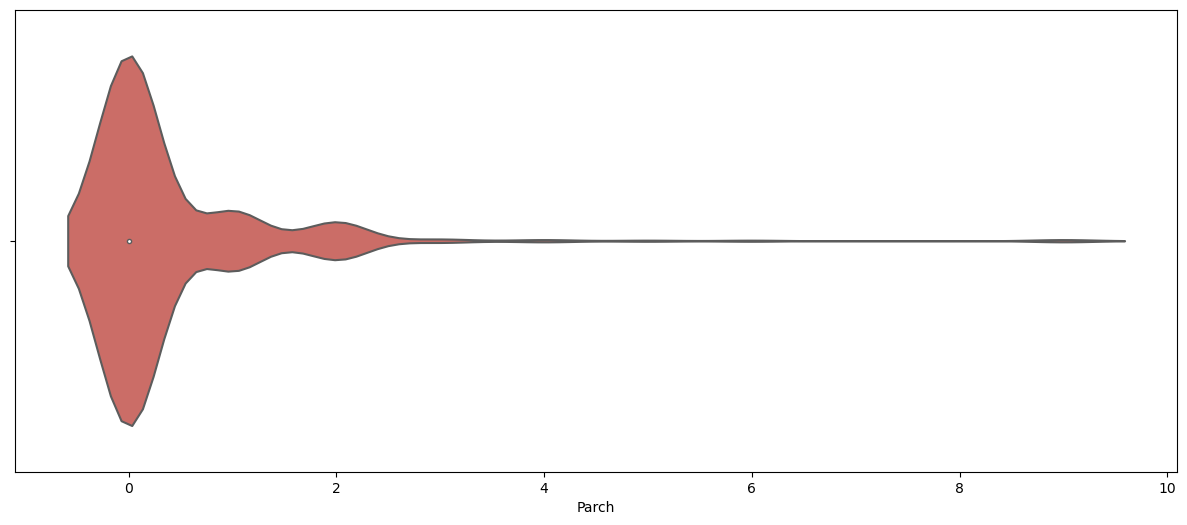

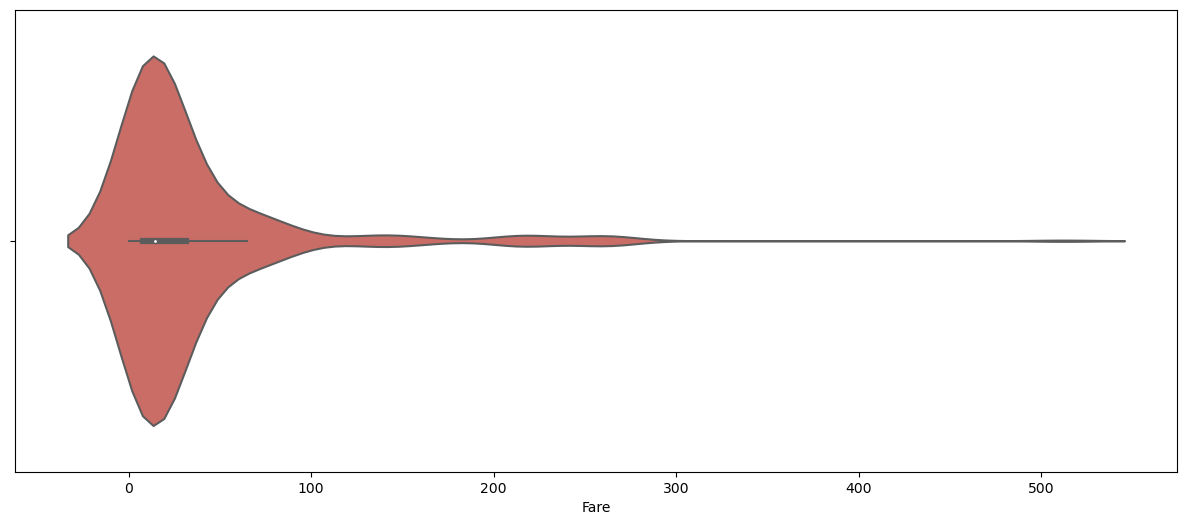

In [24]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(x=df[i],data=df,palette='hls')
    plt.xticks(rotation=0)
    plt.show()

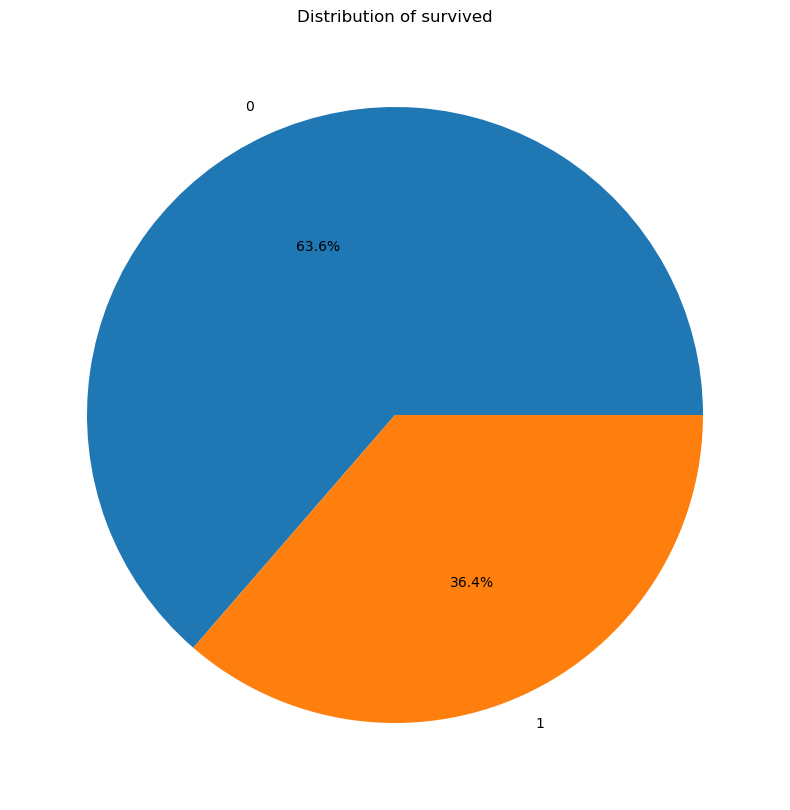

In [25]:
plt.figure(figsize=(20,10))
df['Survived'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of survived')
plt.ylabel('')
plt.show()

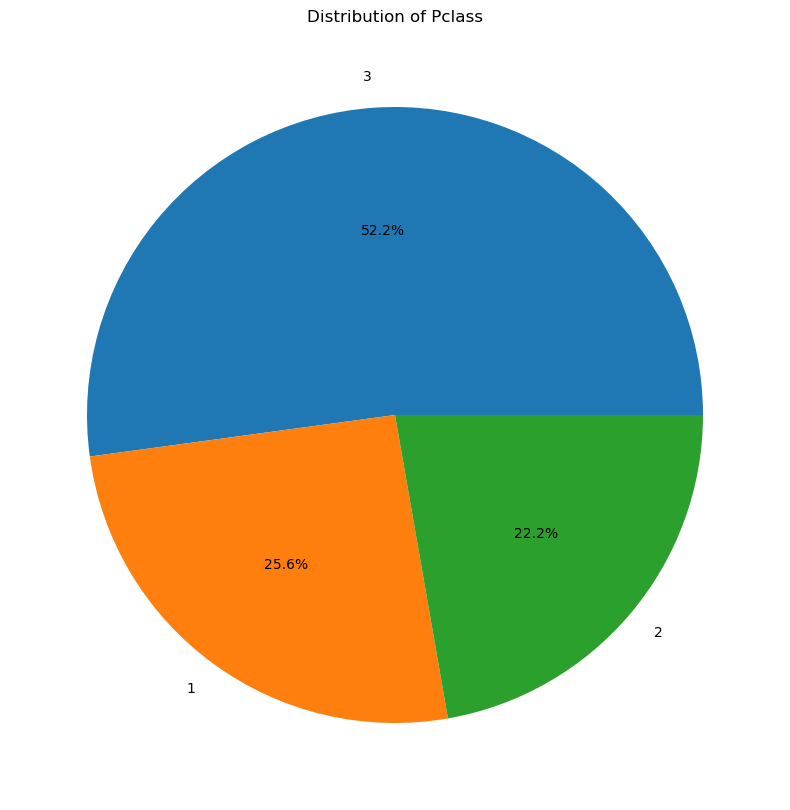

In [26]:
plt.figure(figsize=(20,10))
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Pclass')
plt.ylabel('')
plt.show()

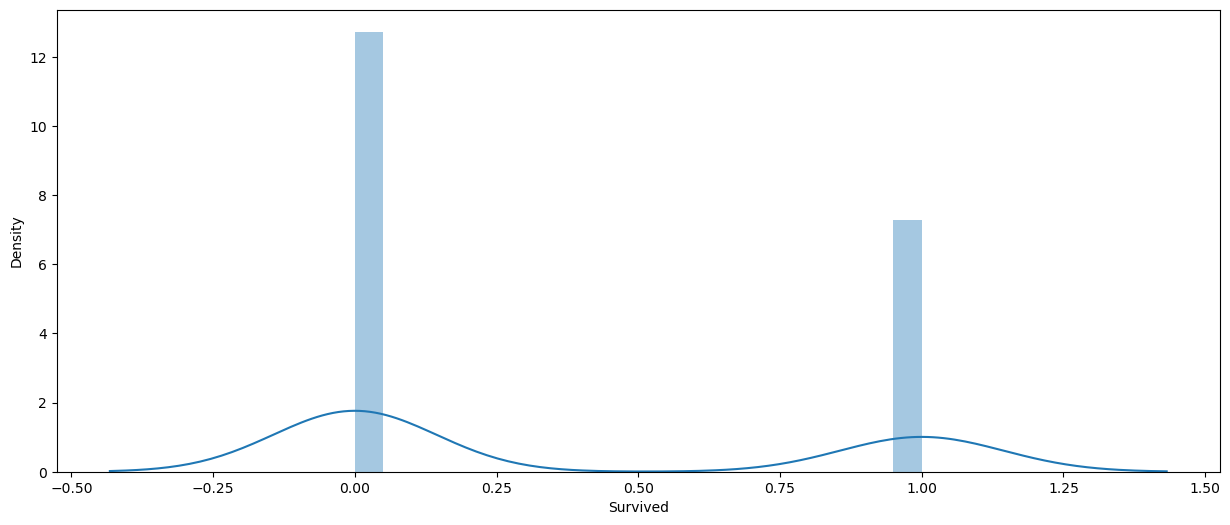

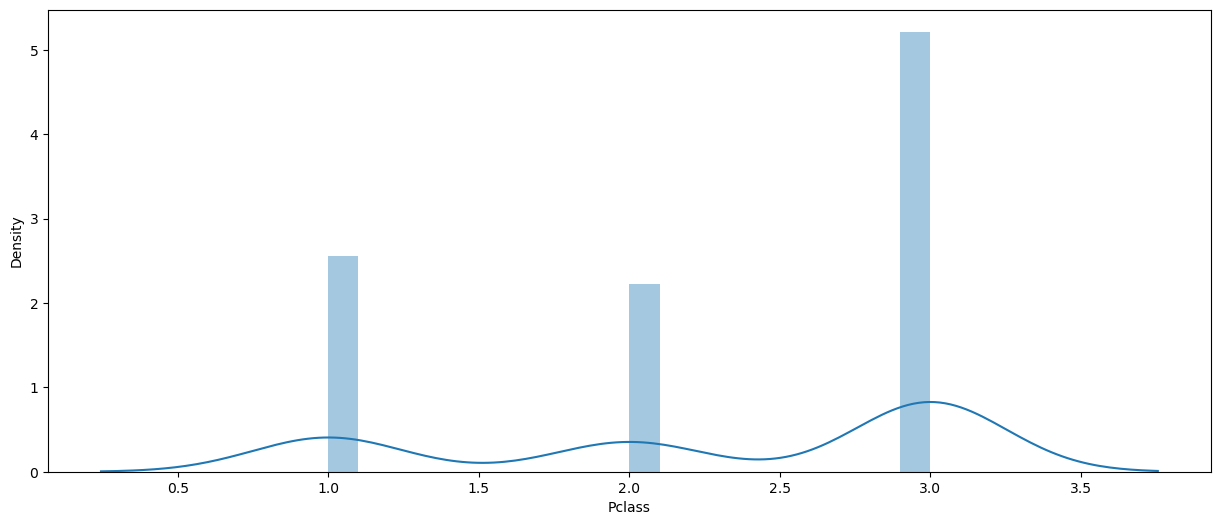

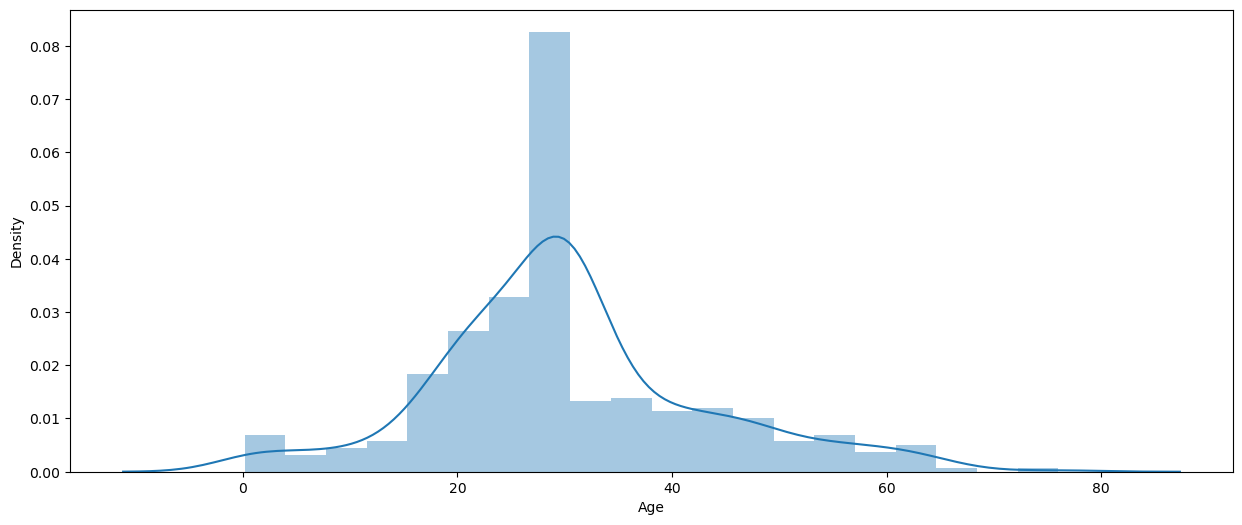

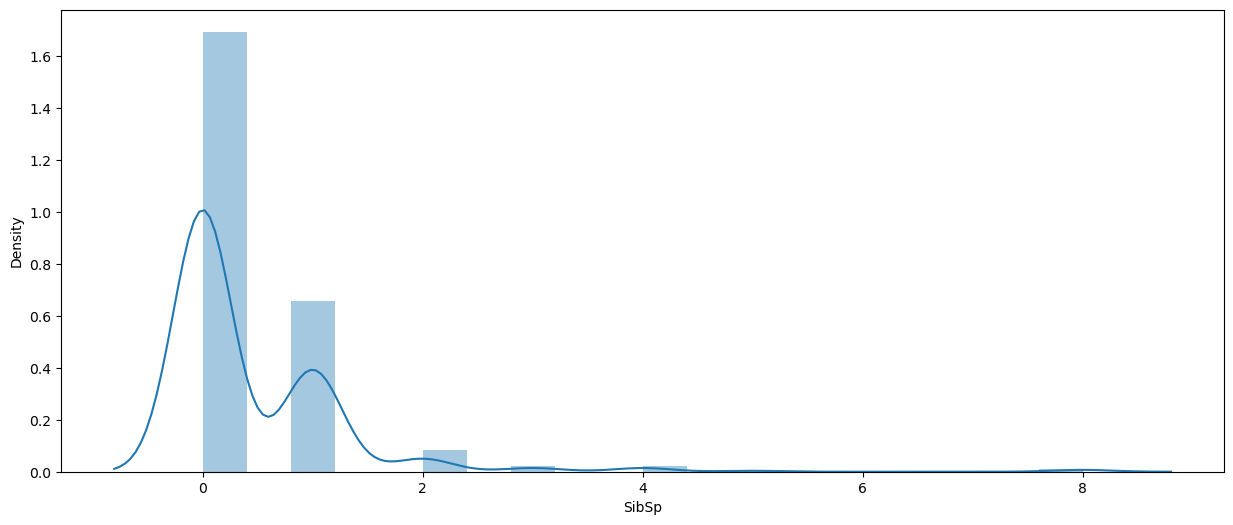

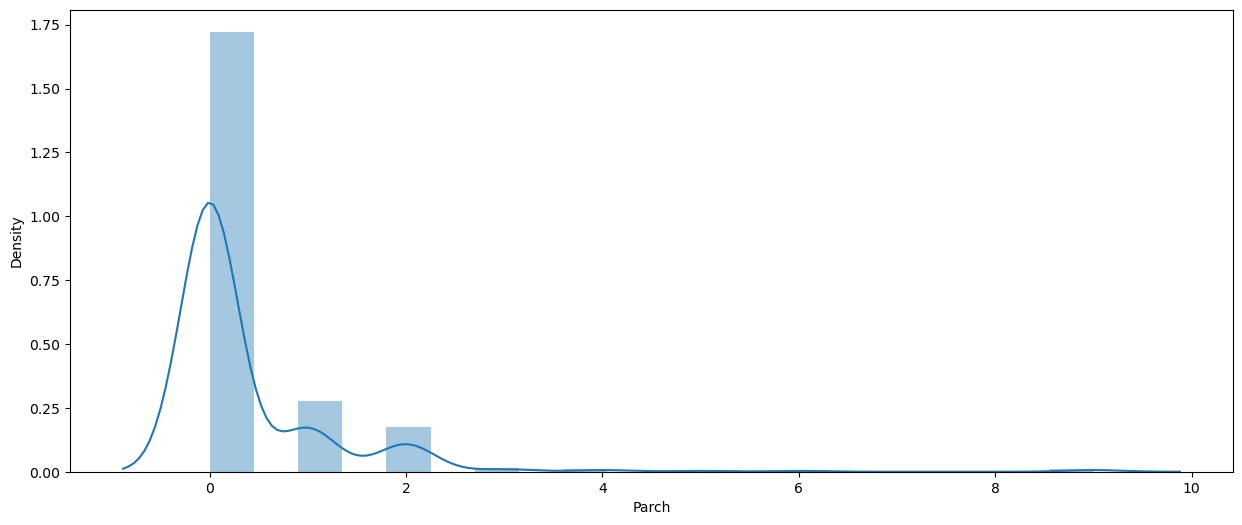

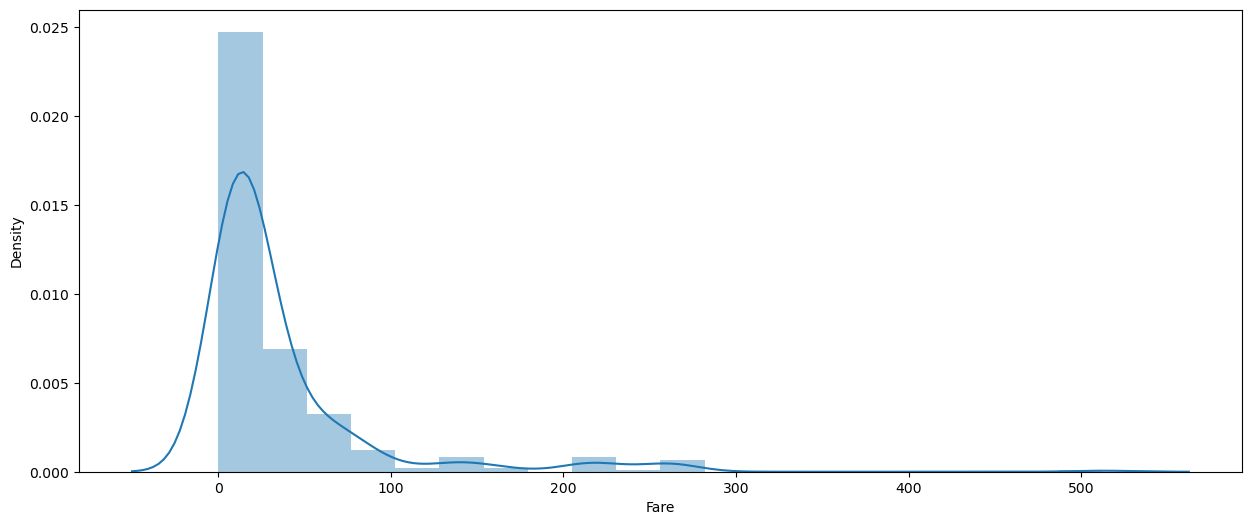

In [27]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i],kde=True,bins=20)
    plt.xticks(rotation=0)
    plt.show()

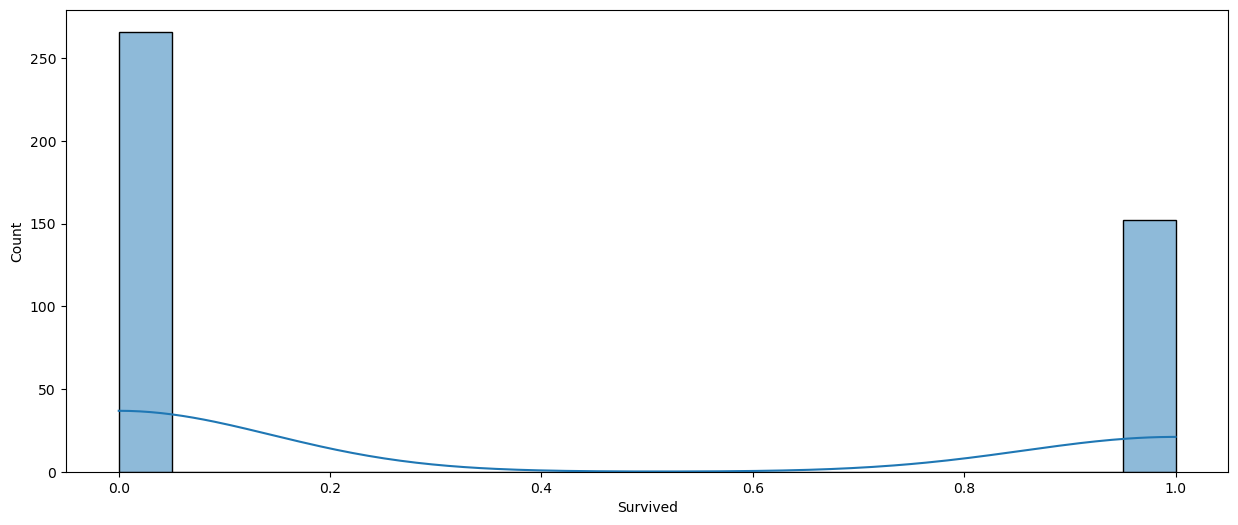

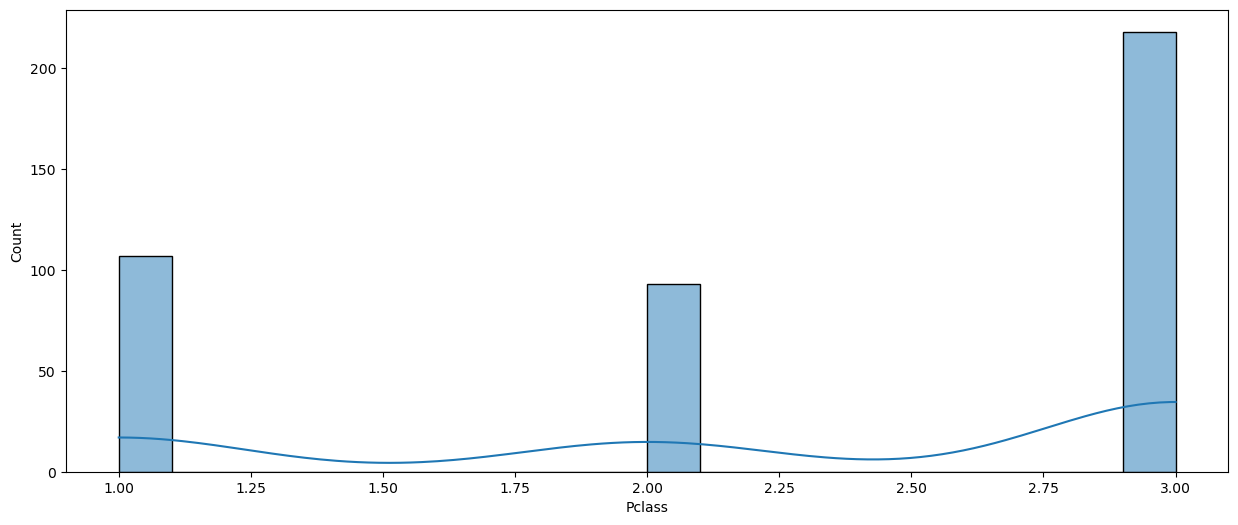

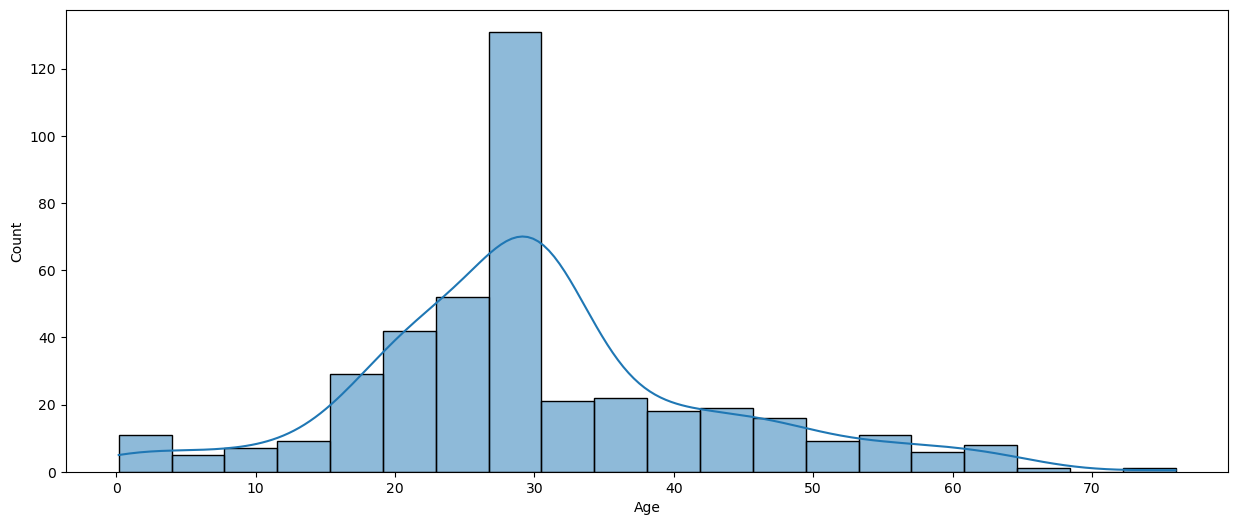

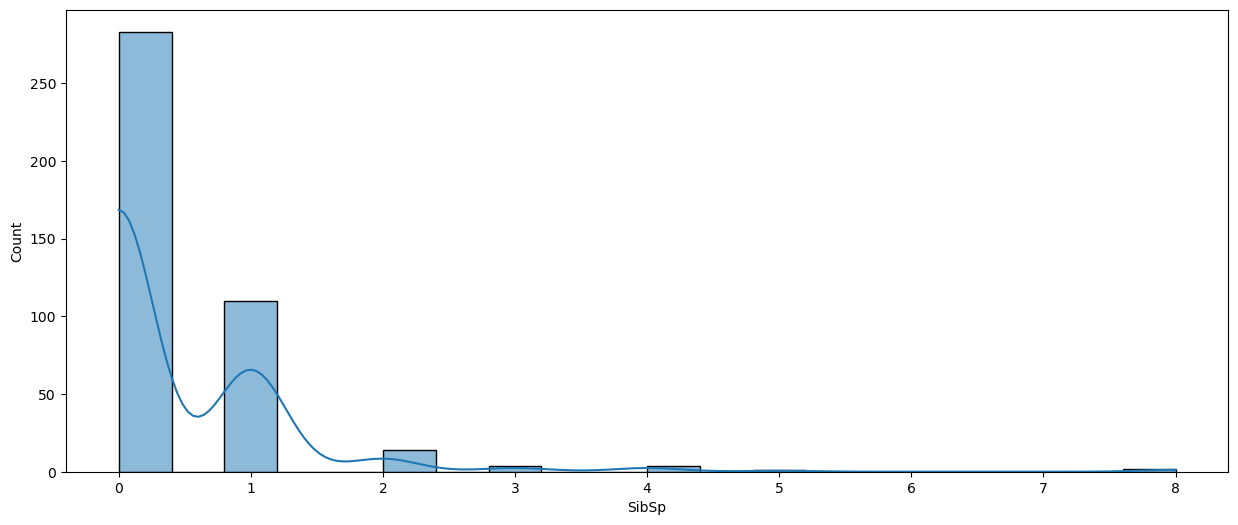

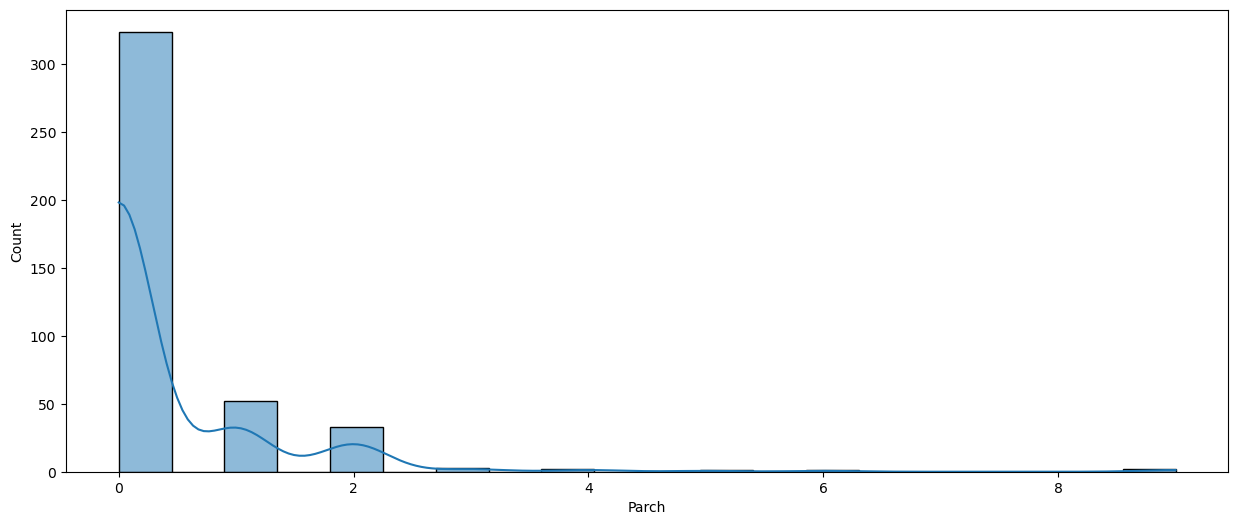

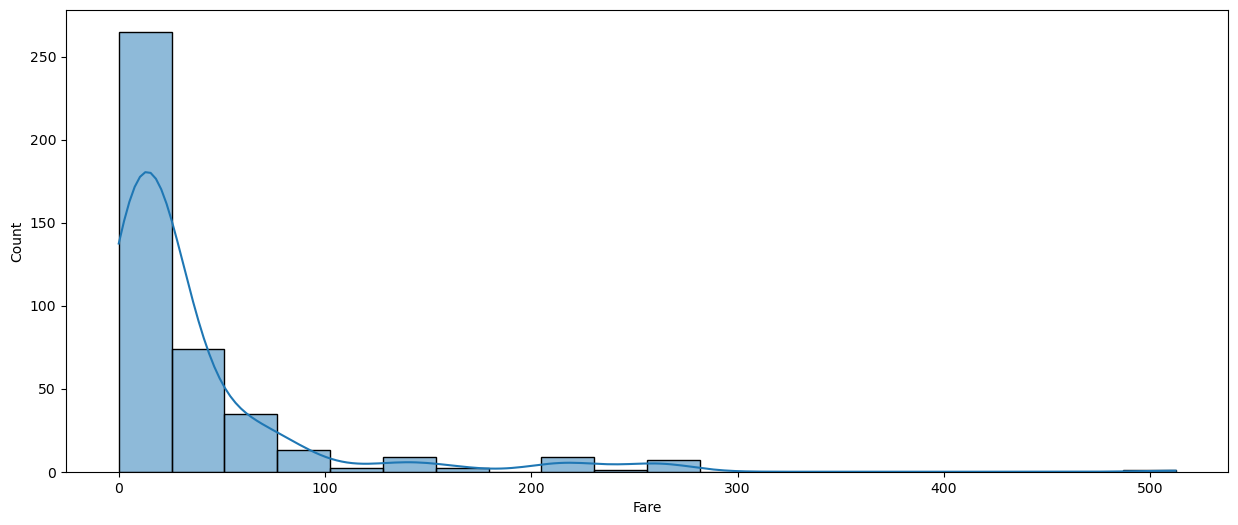

In [28]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i],kde=True,bins=20,palette='hls')
    plt.xticks(rotation=0)
    plt.show()

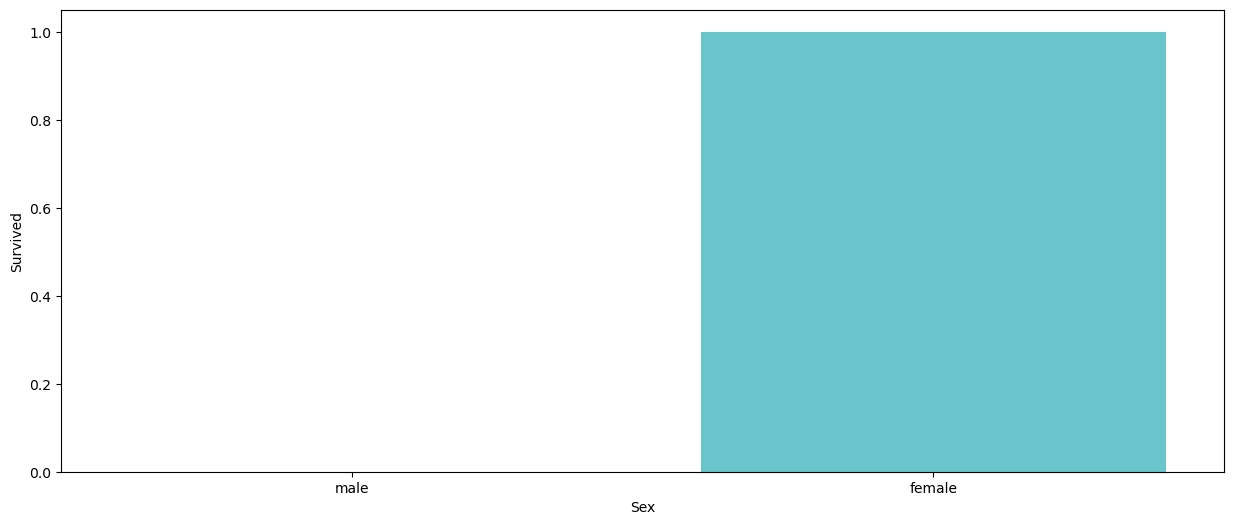

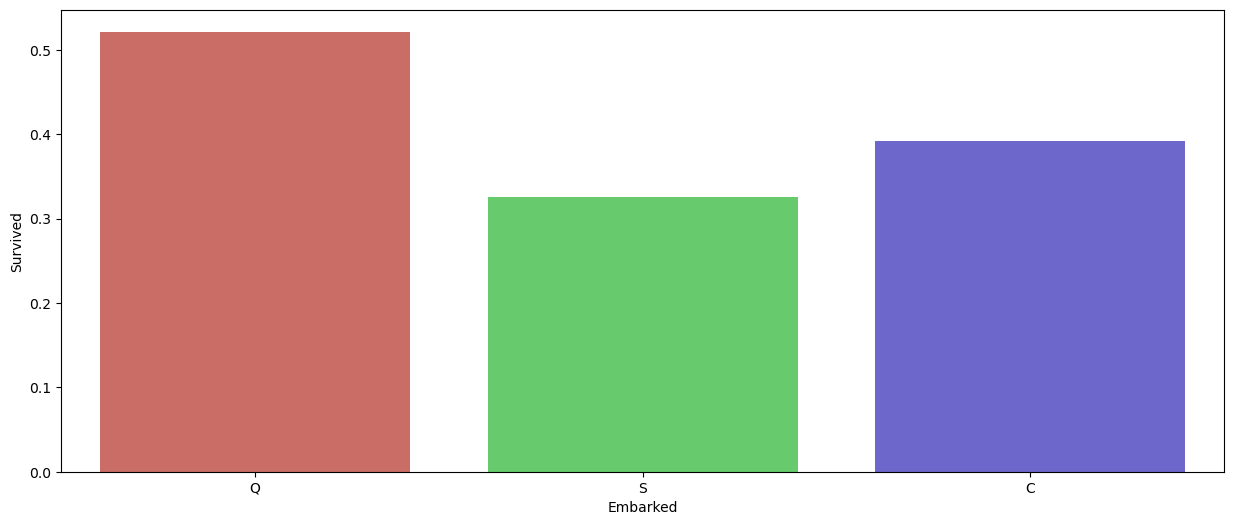

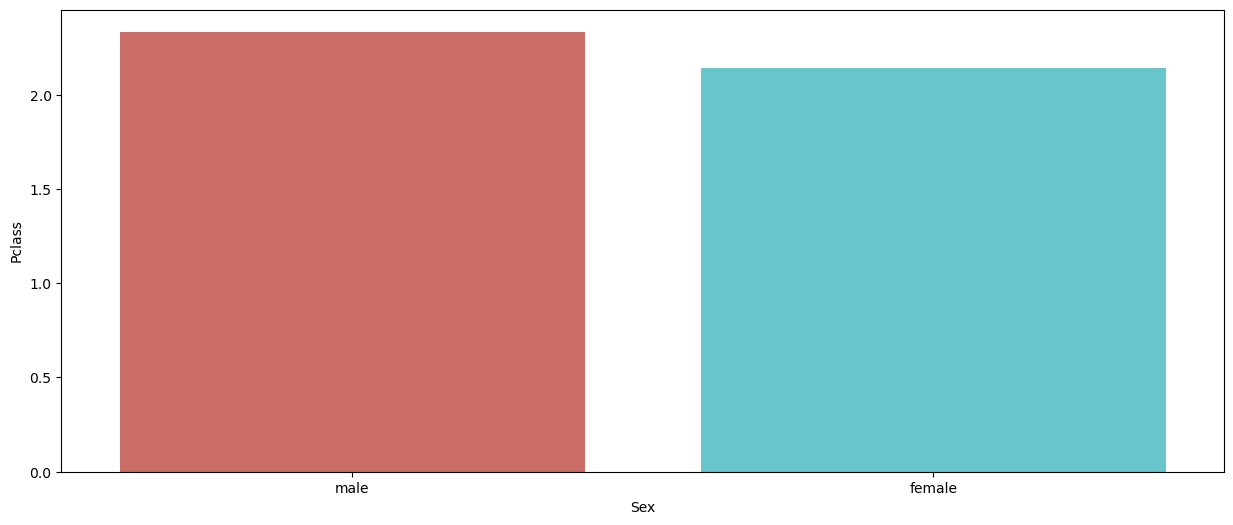

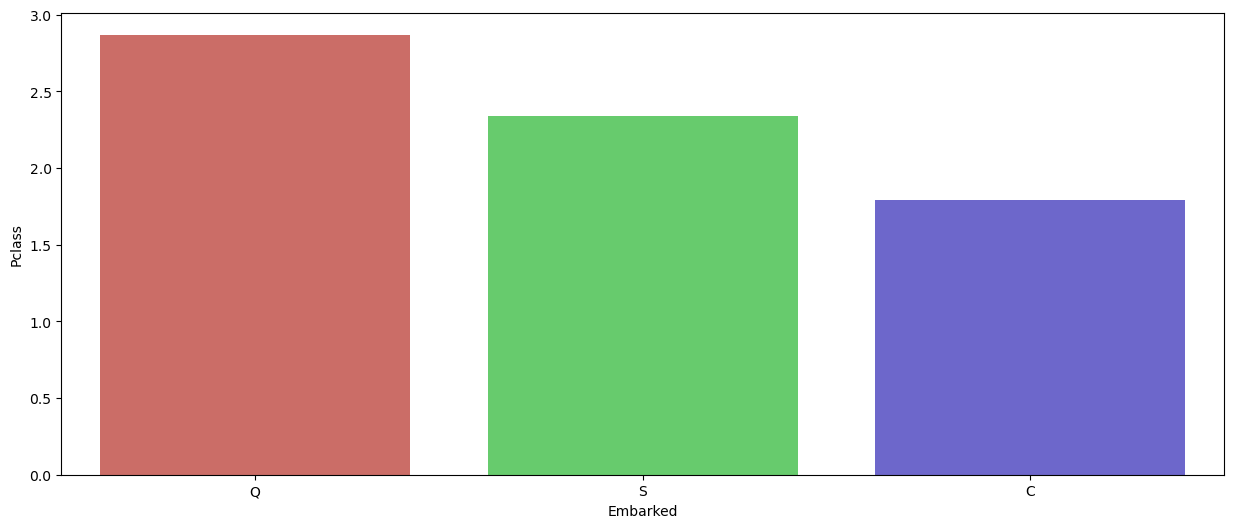

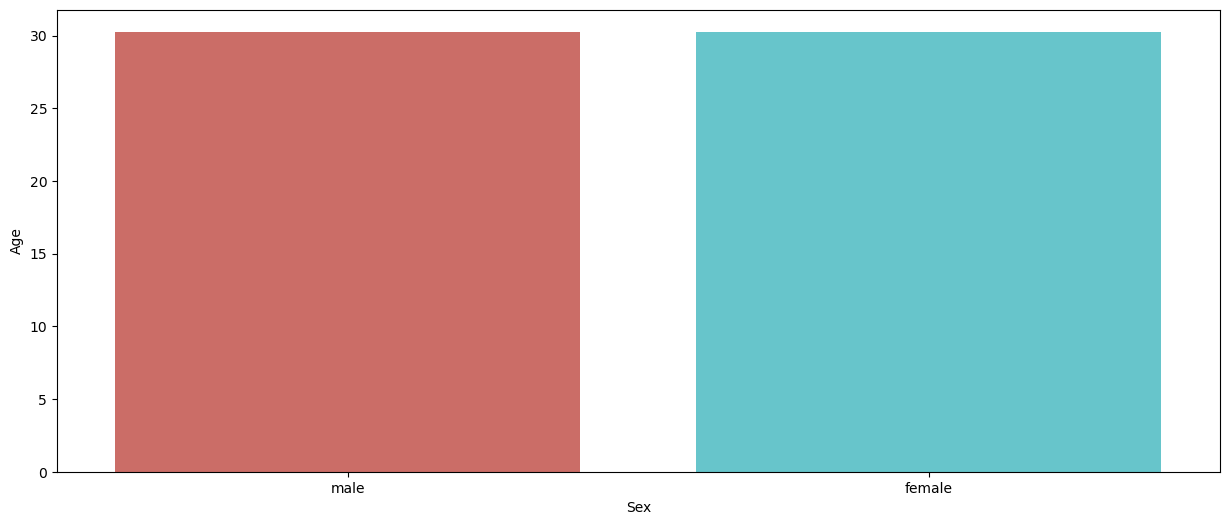

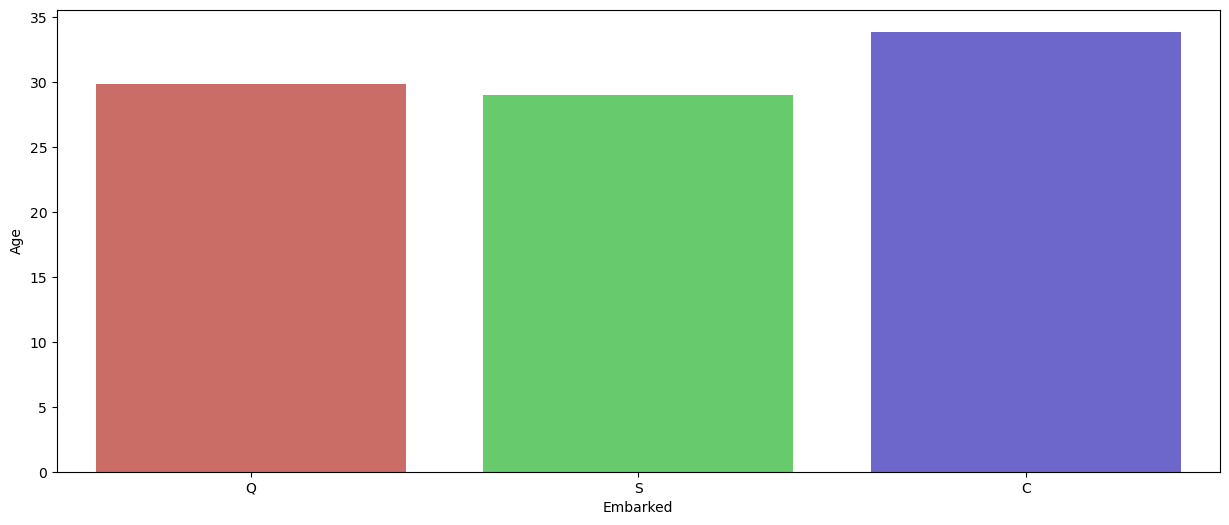

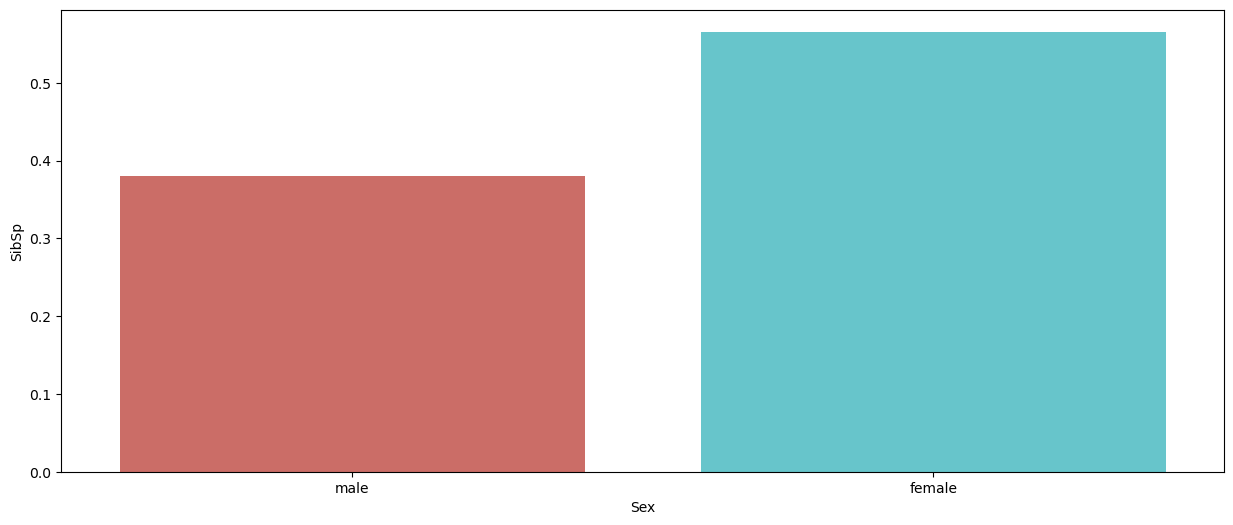

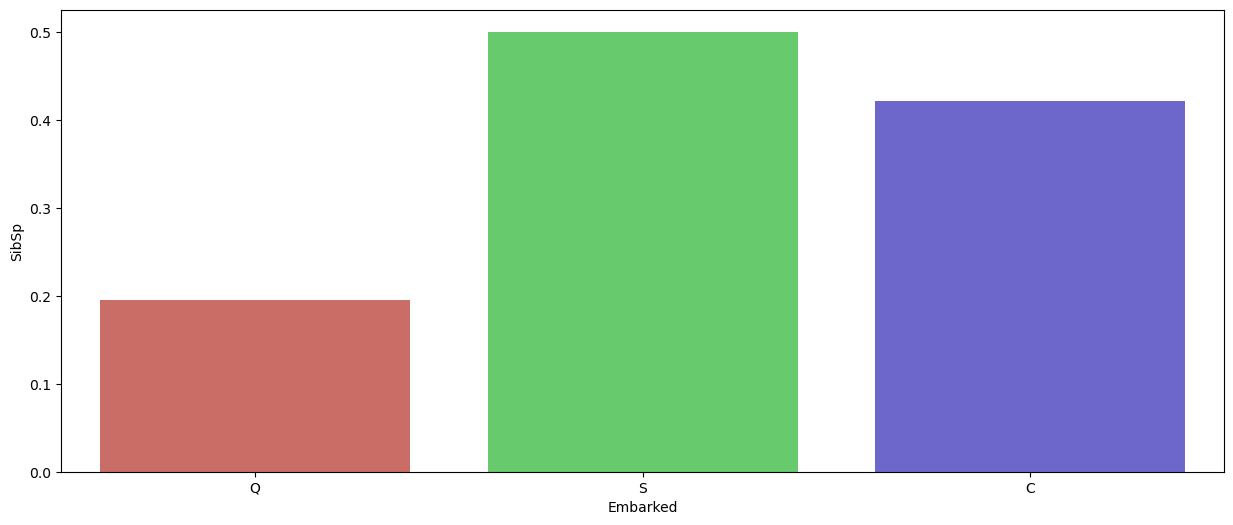

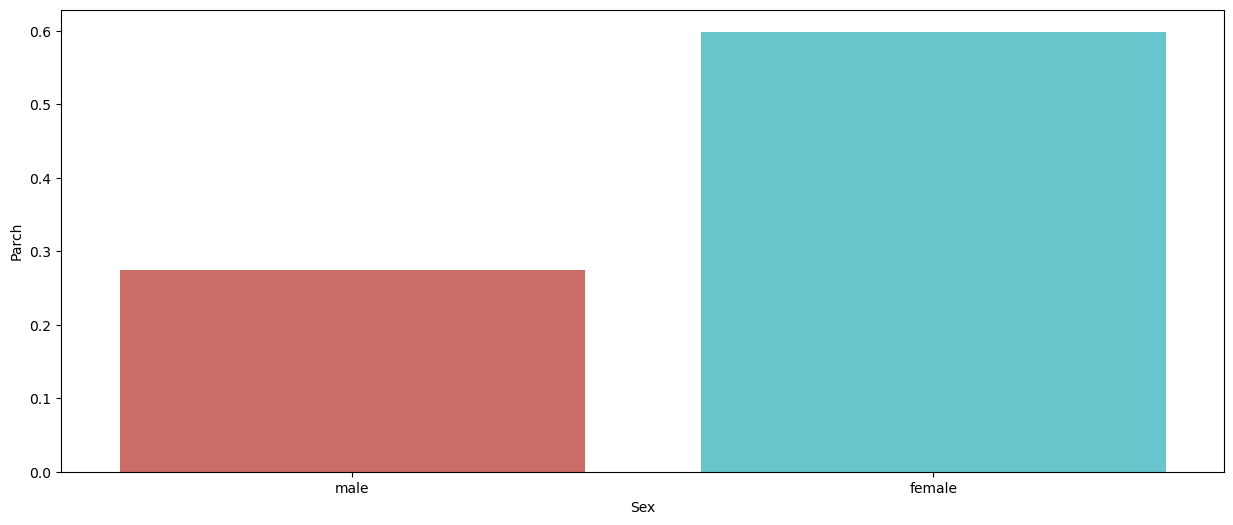

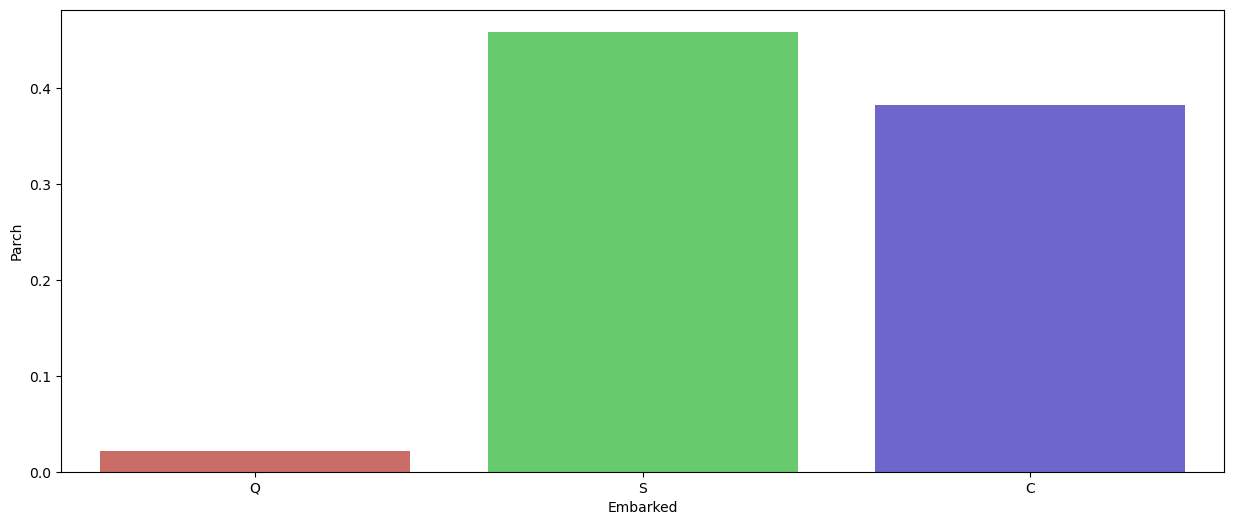

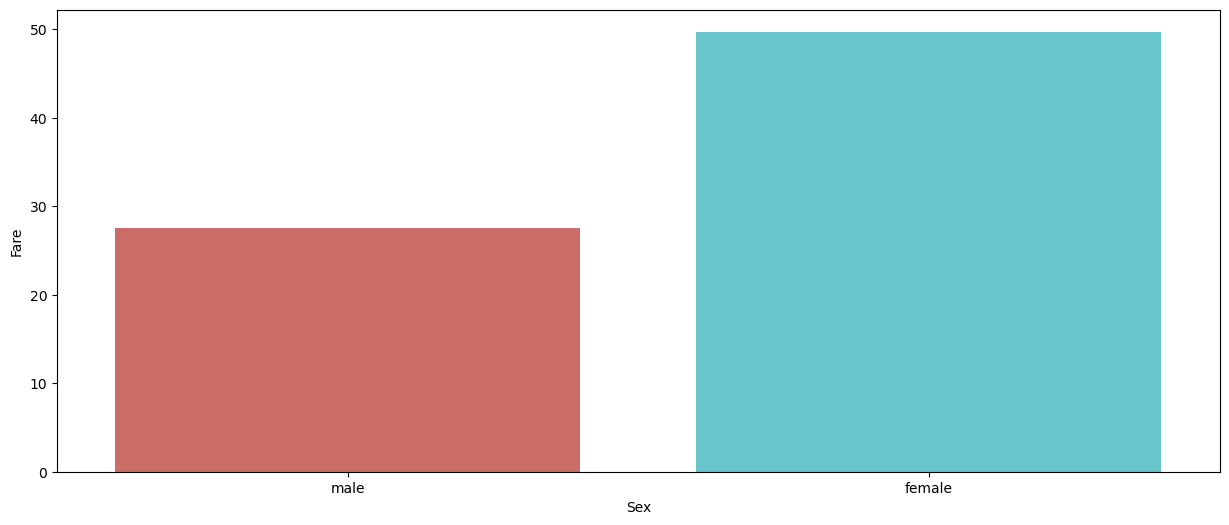

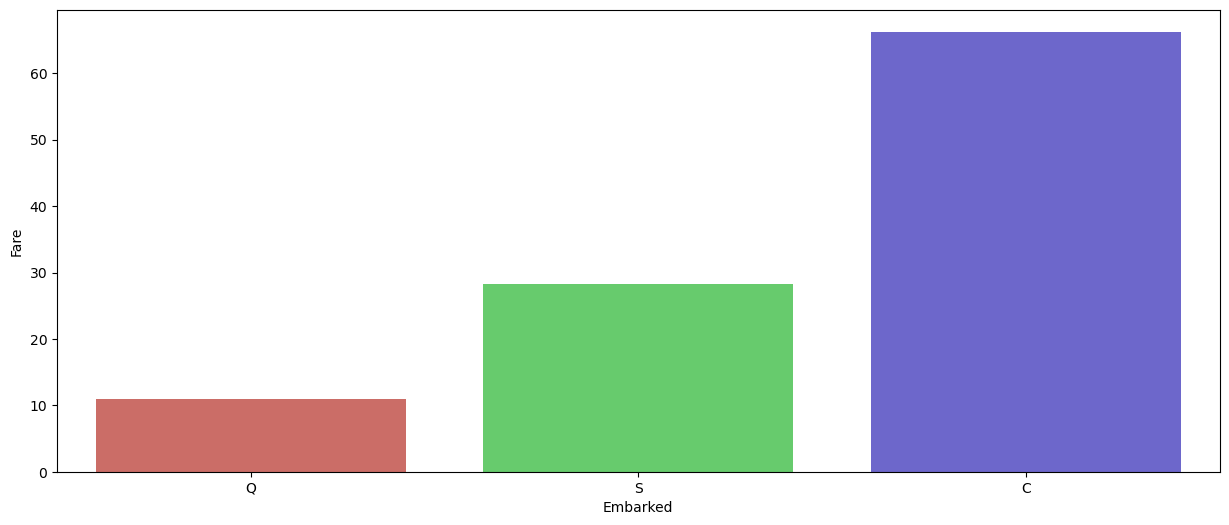

In [29]:
for i in numerical_columns:
    for j in object_columns:
        plt.figure(figsize=(15,6))
        sns.barplot(x=df[j],y=df[i],data=df,ci=None,palette='hls')
        plt.show()

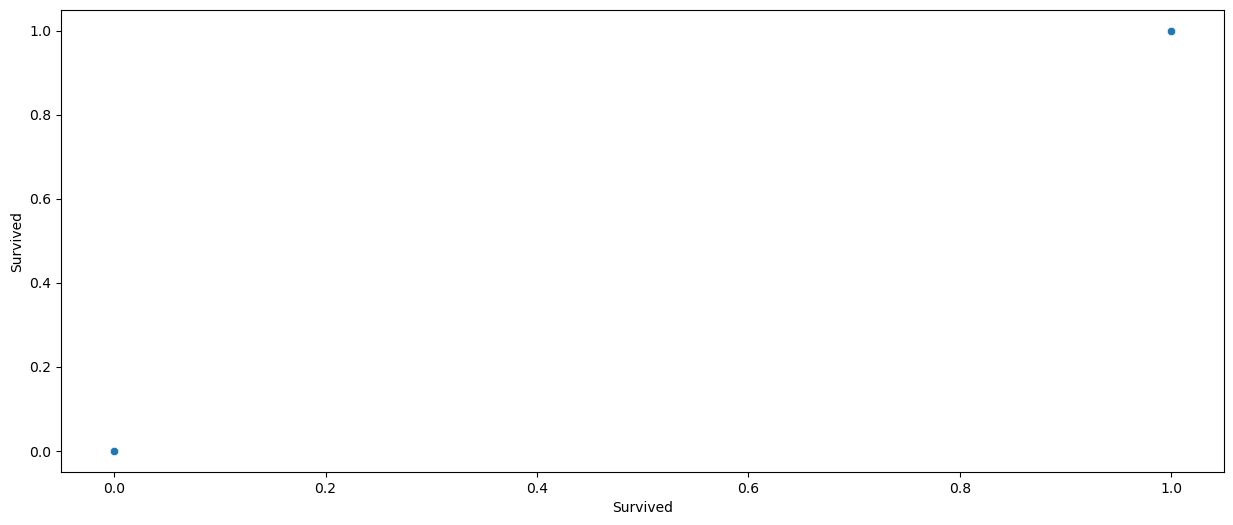

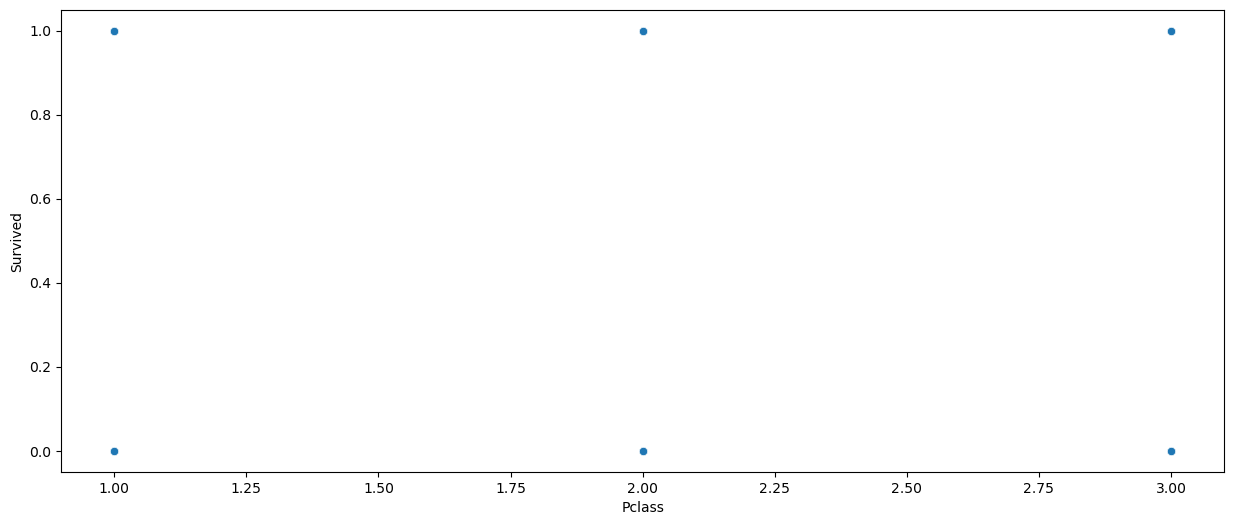

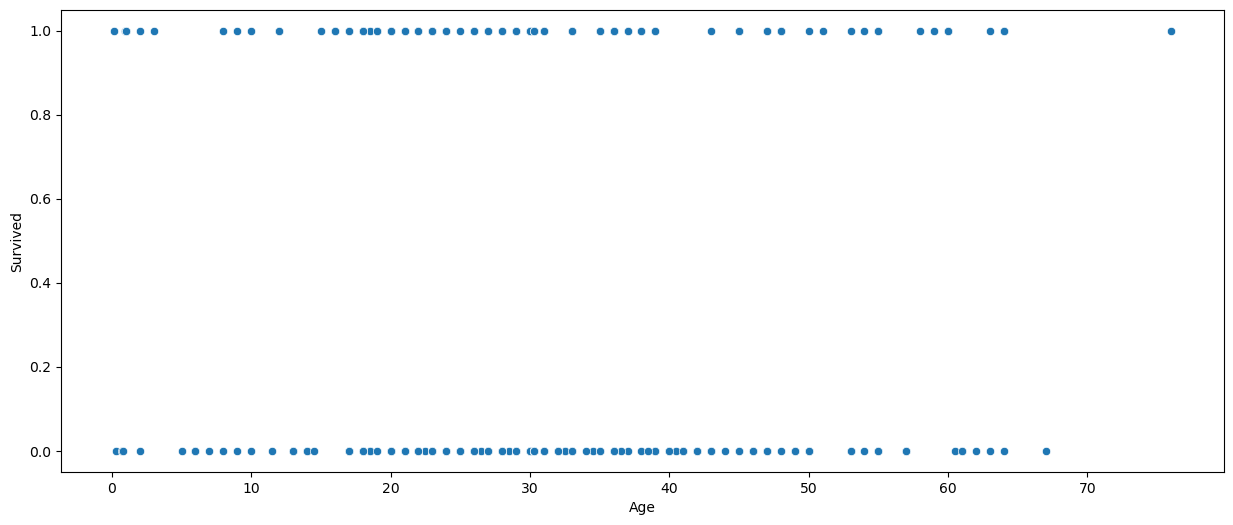

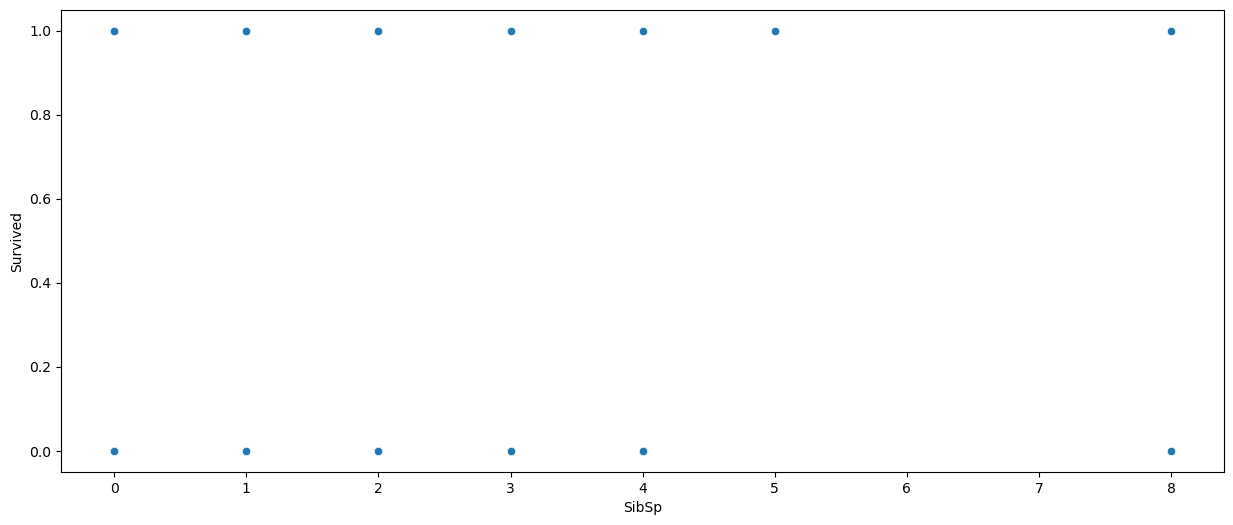

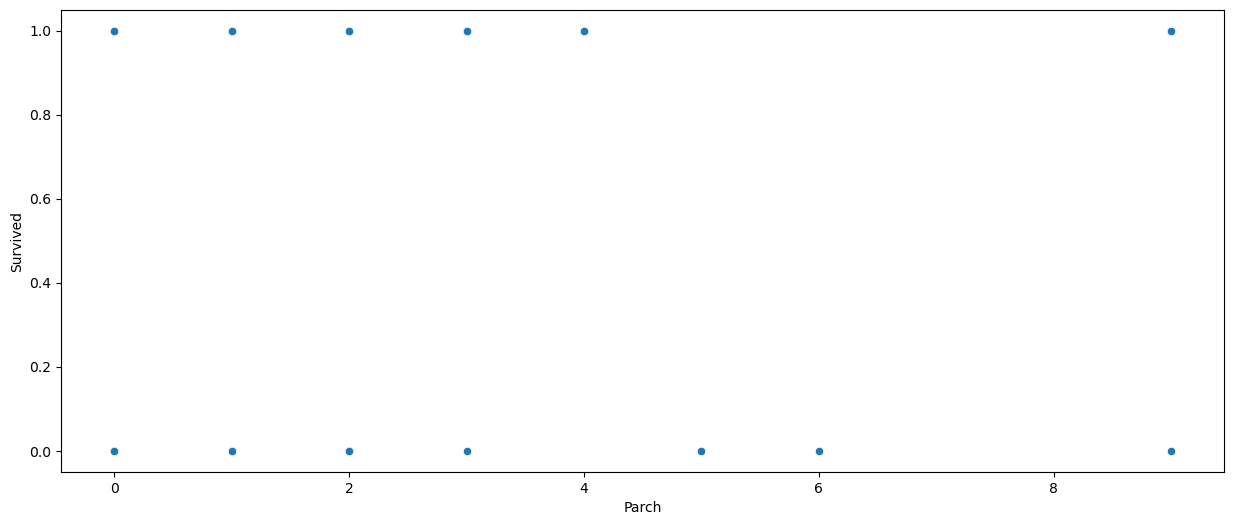

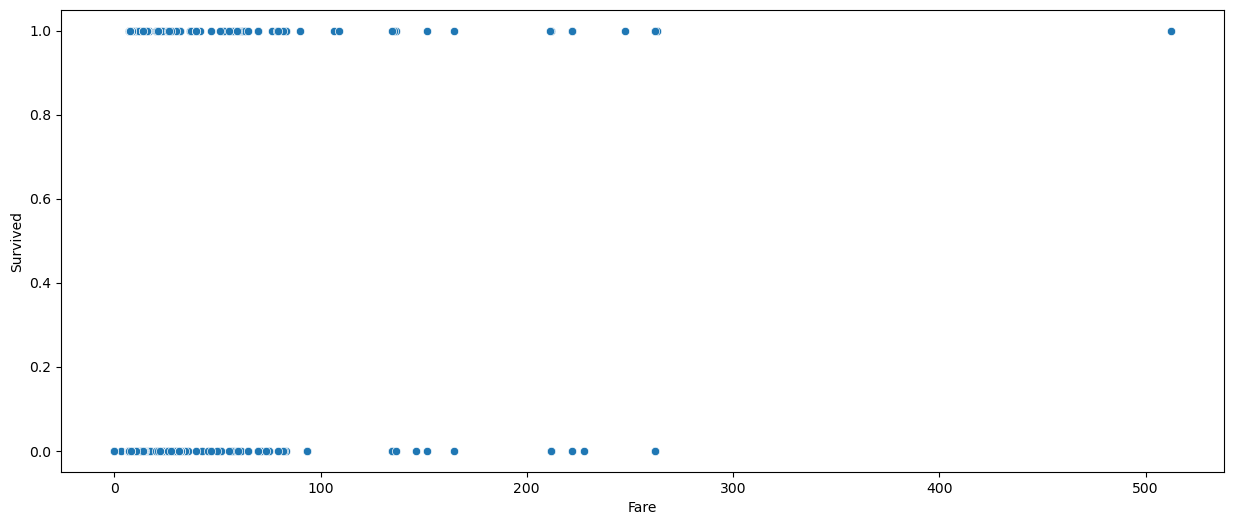

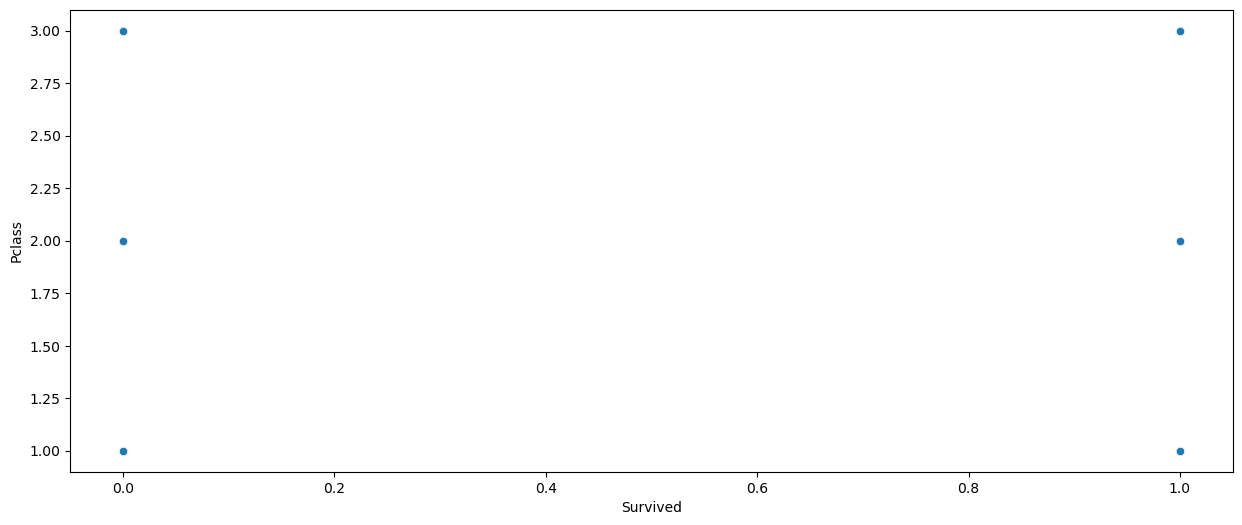

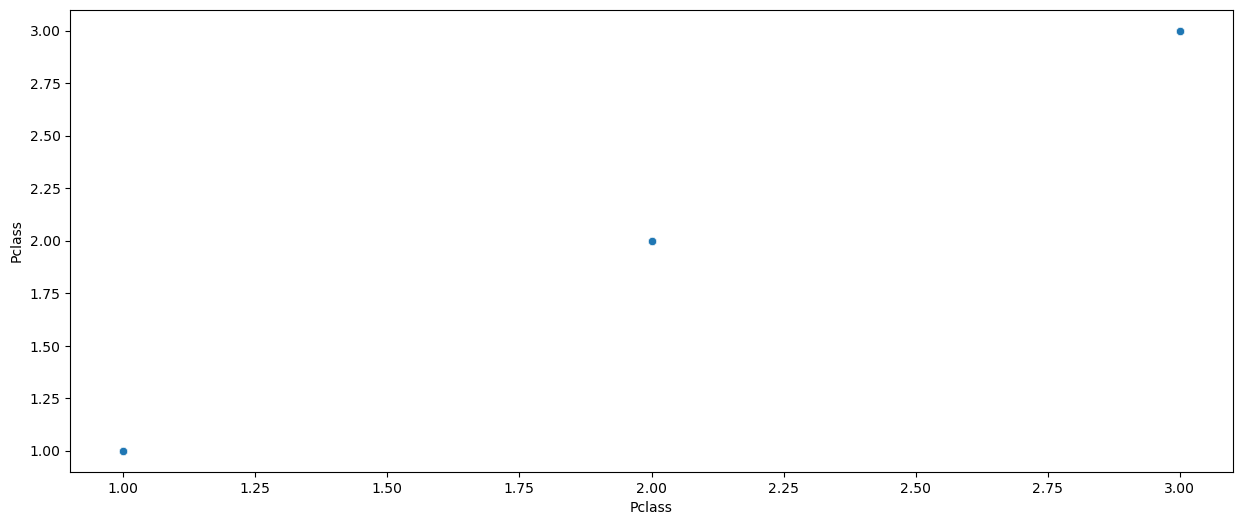

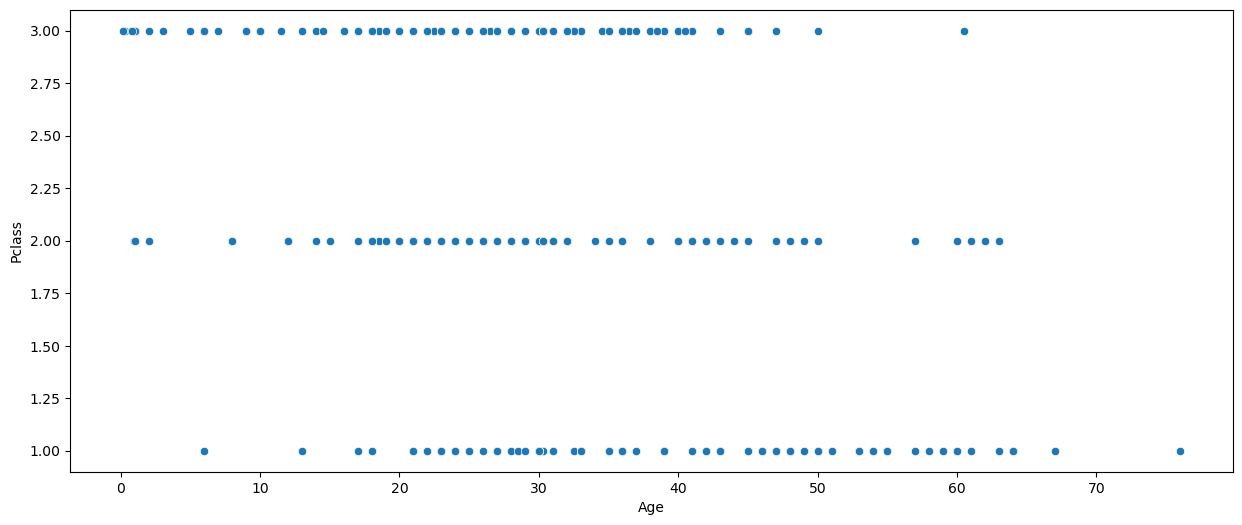

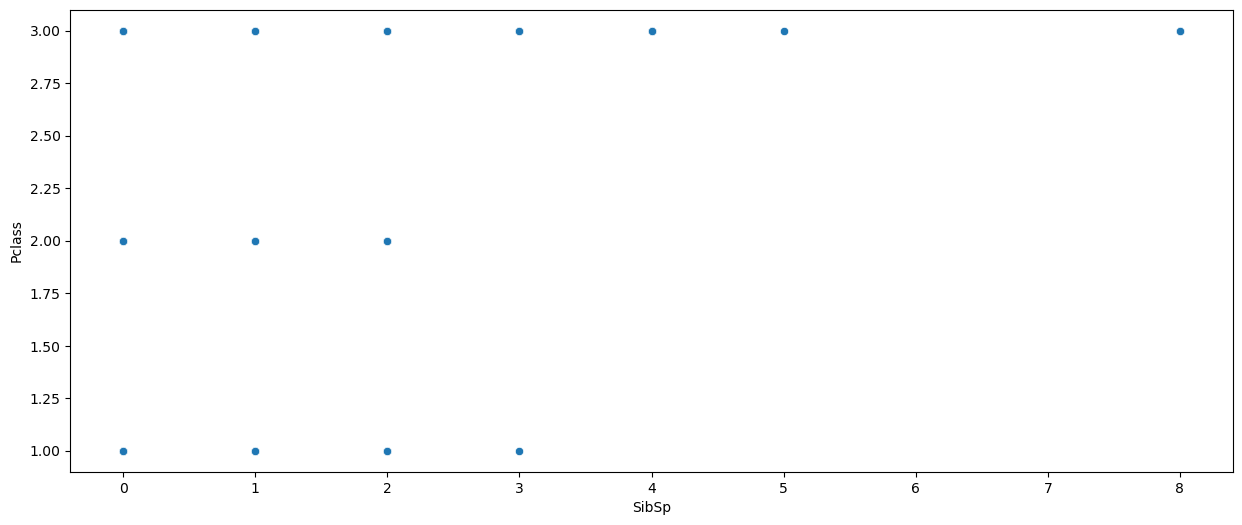

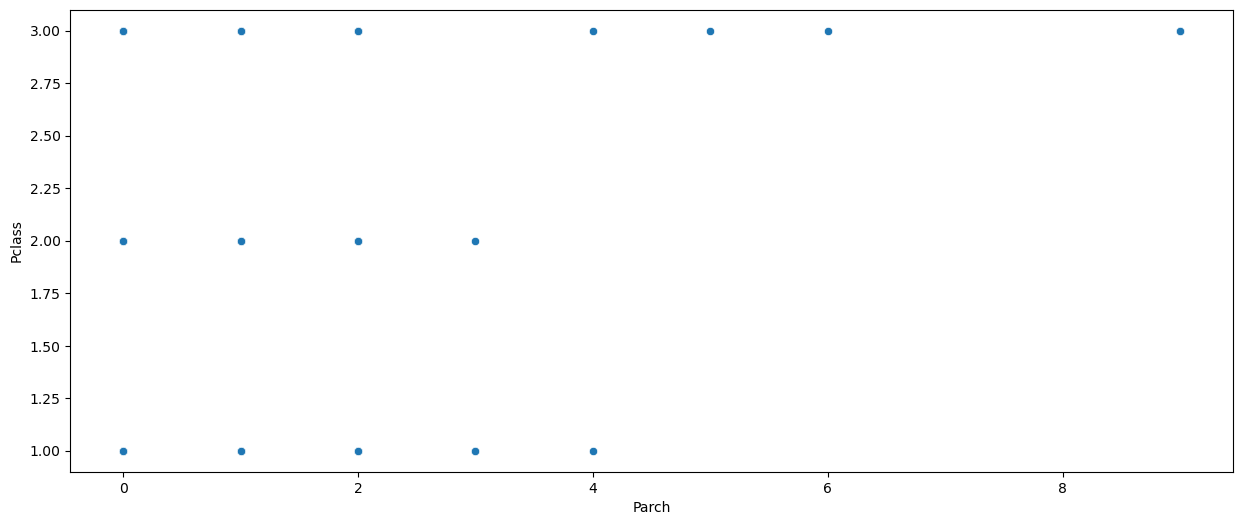

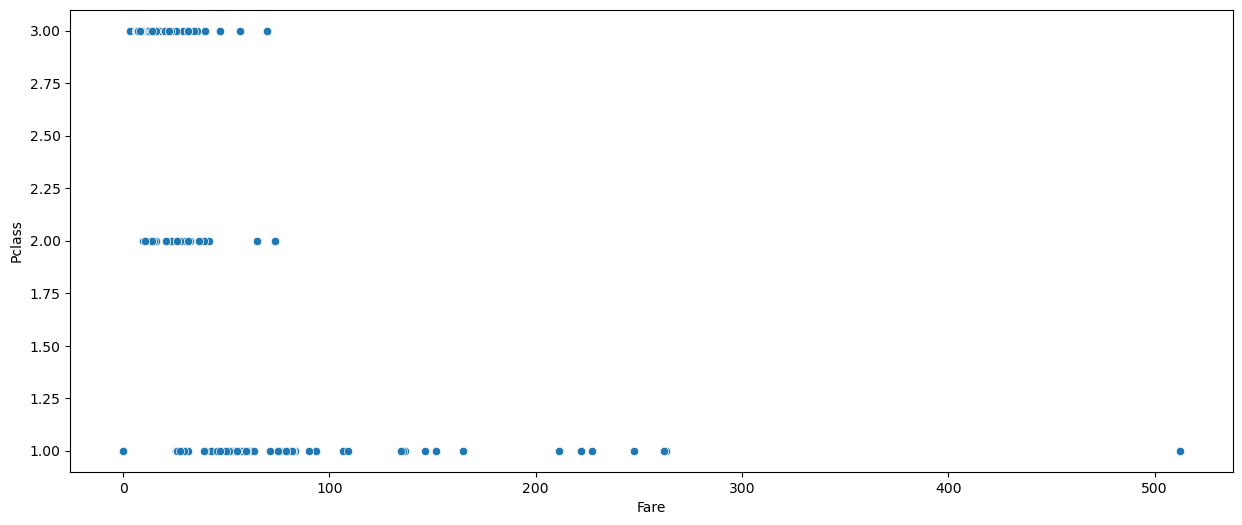

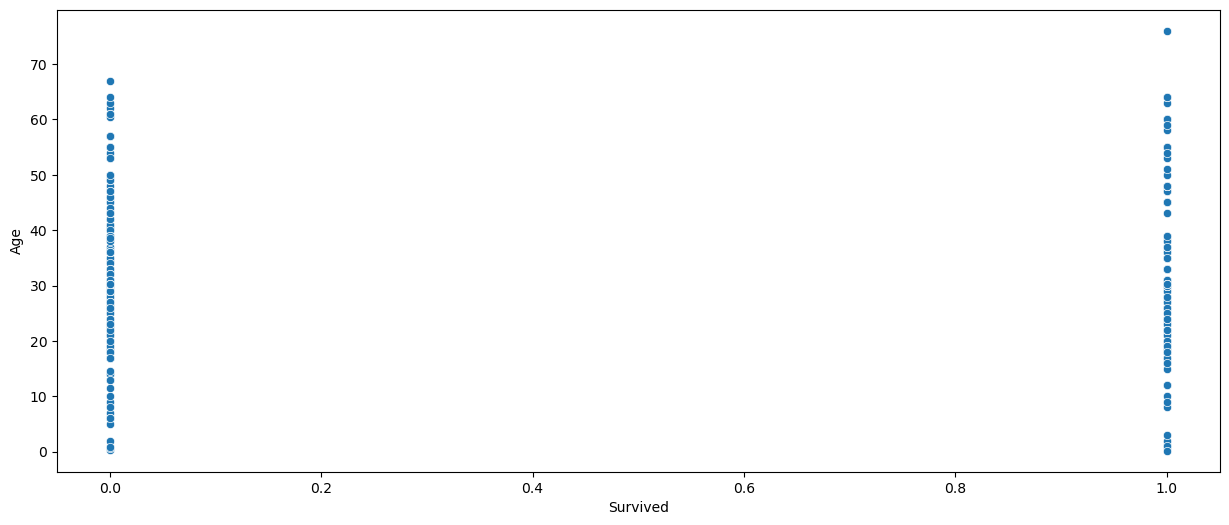

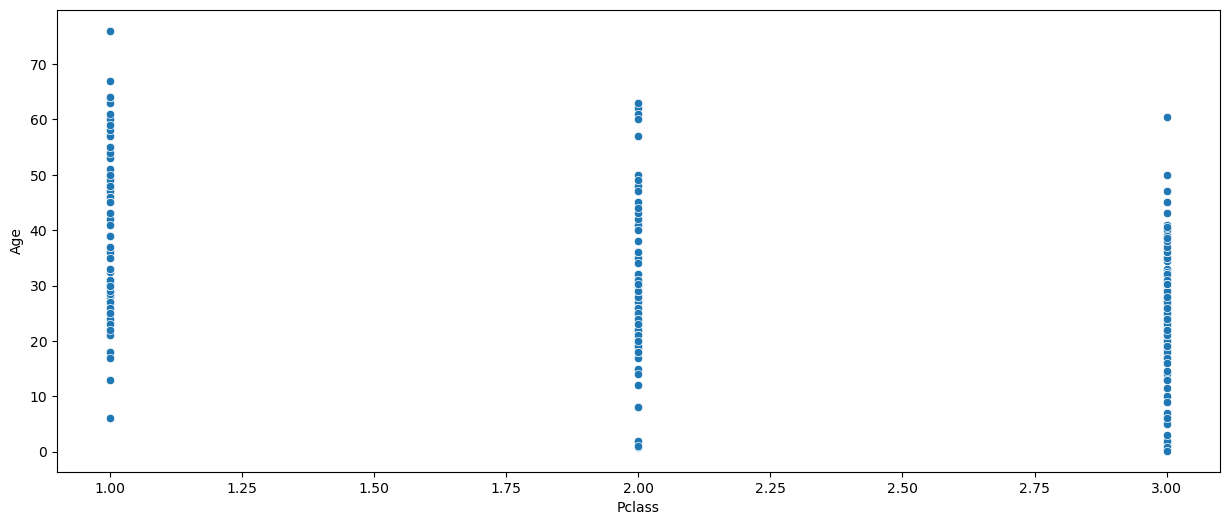

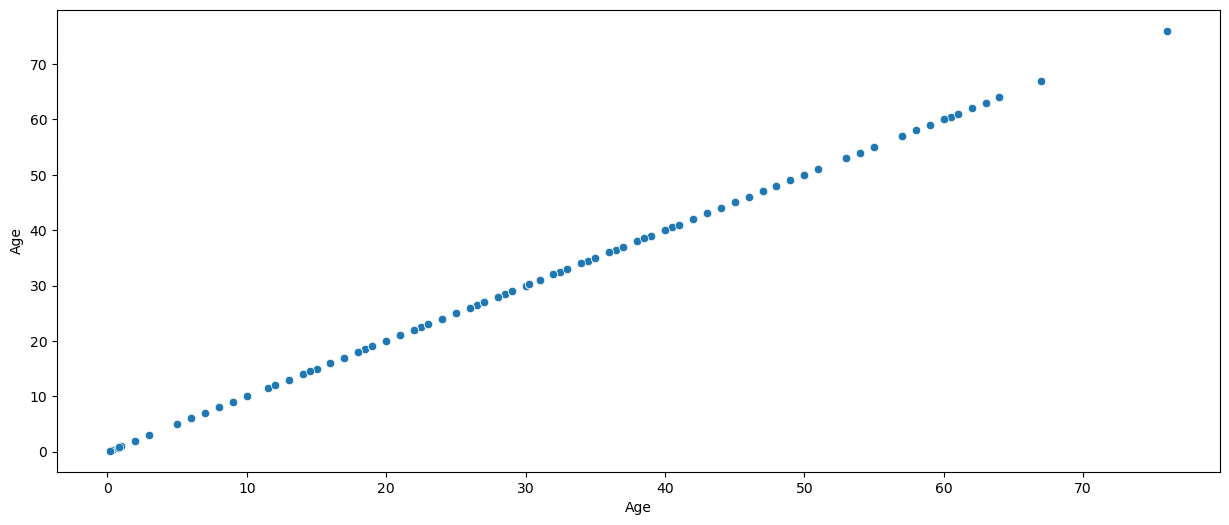

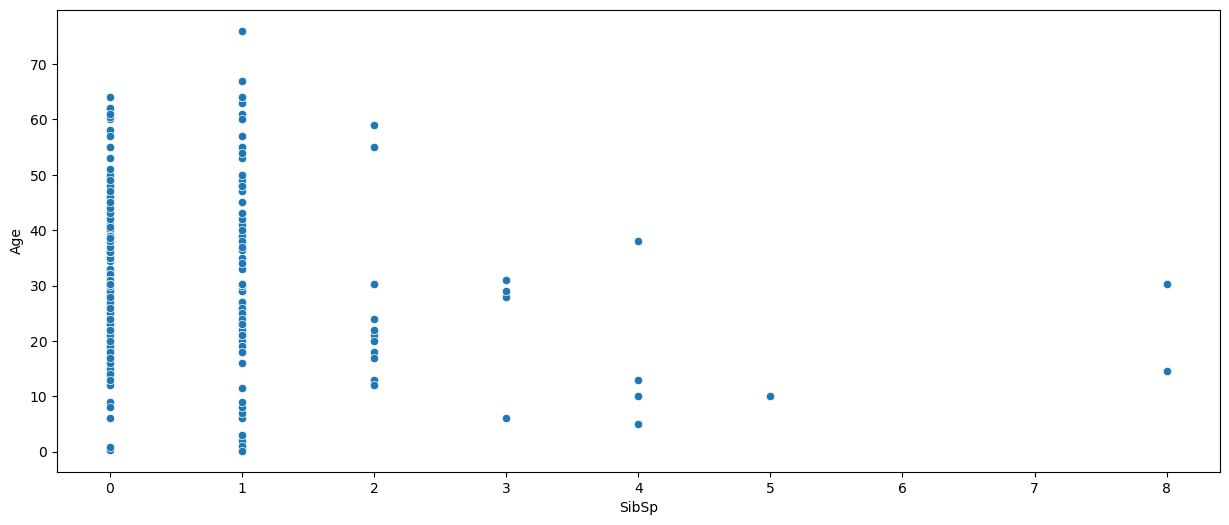

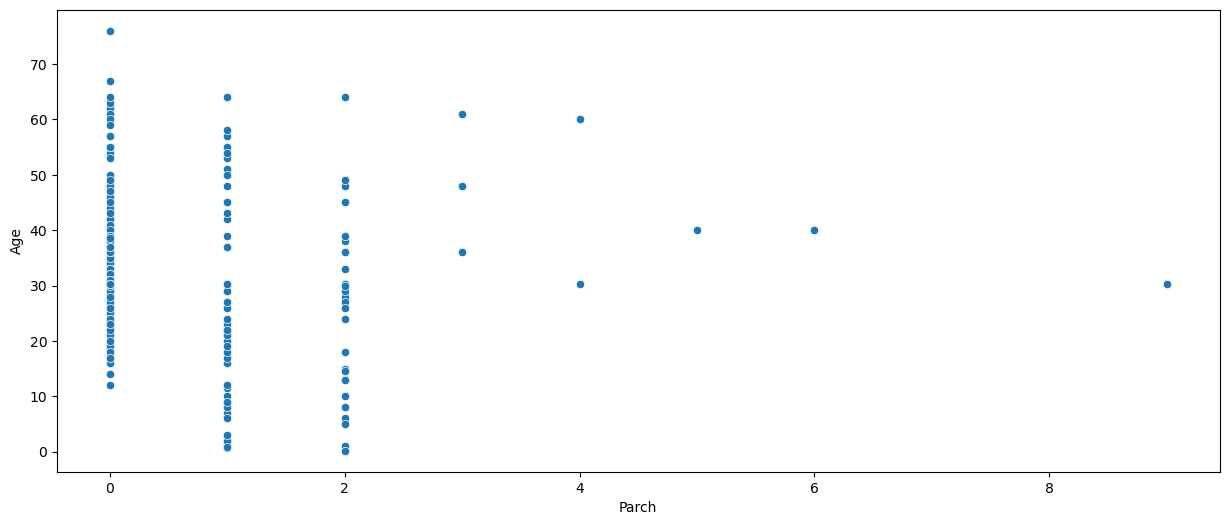

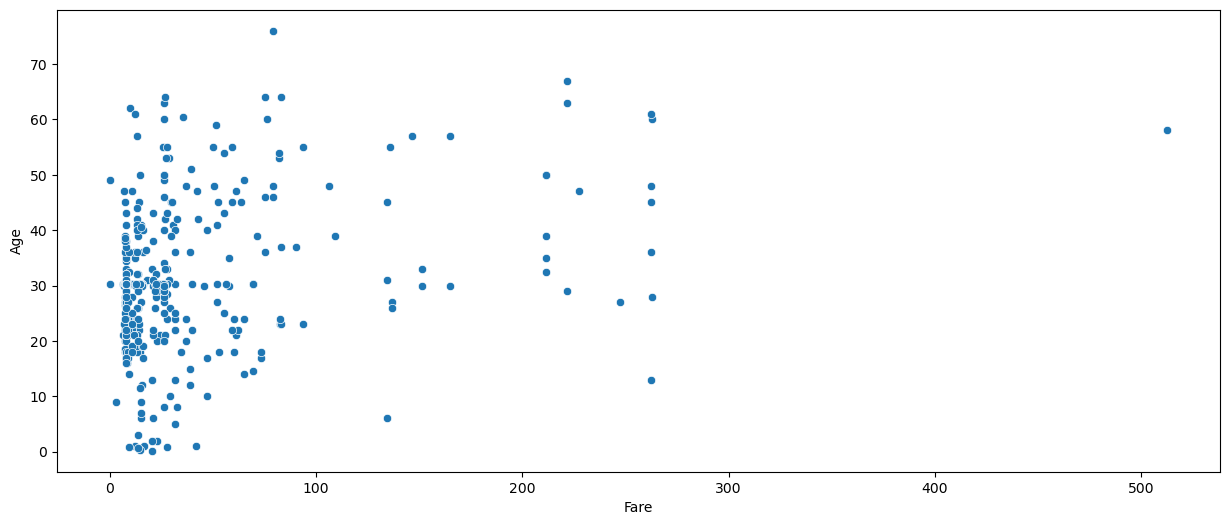

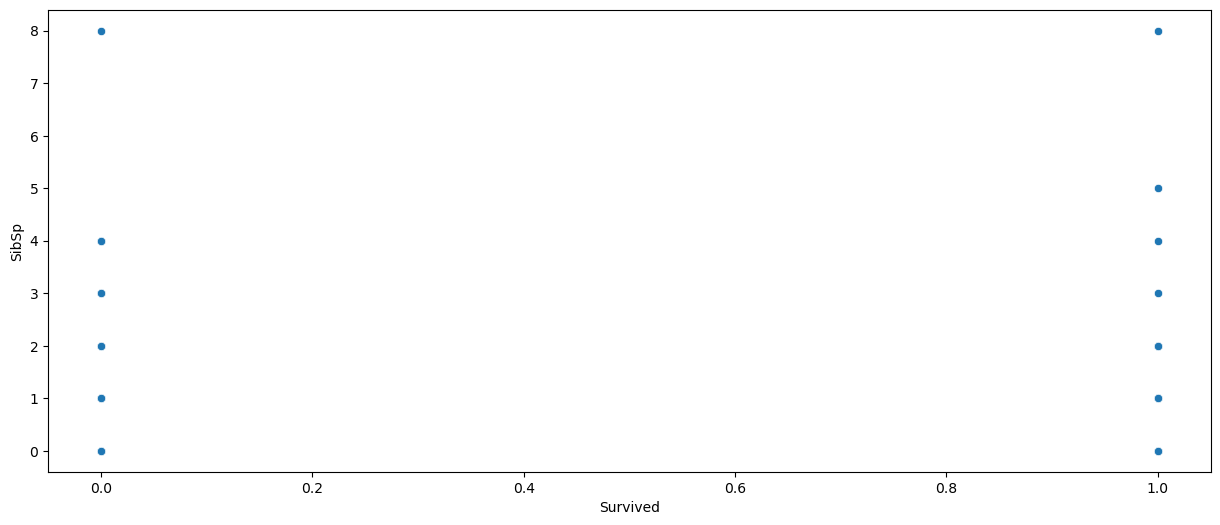

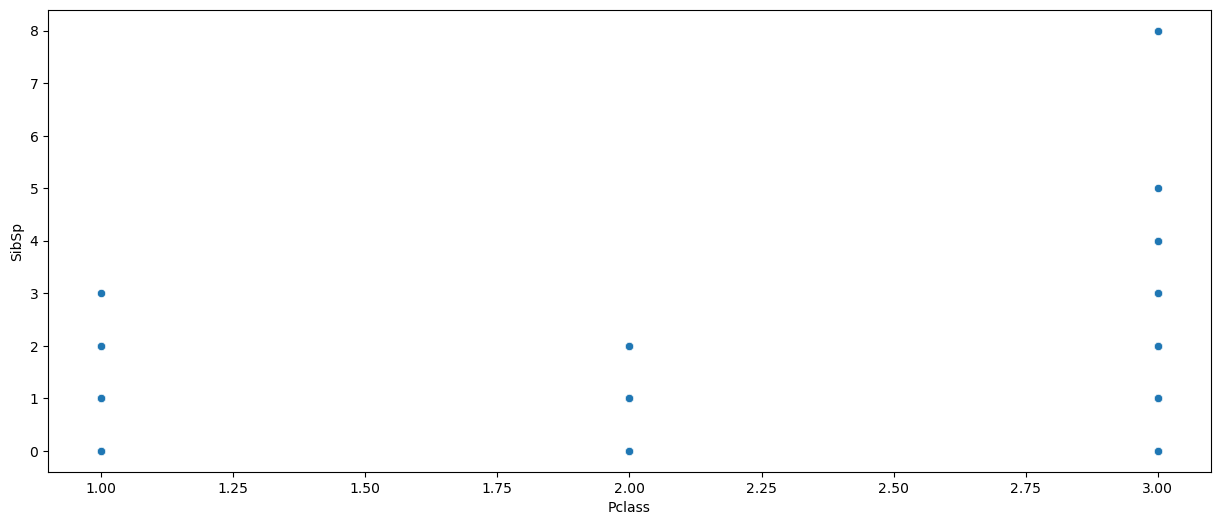

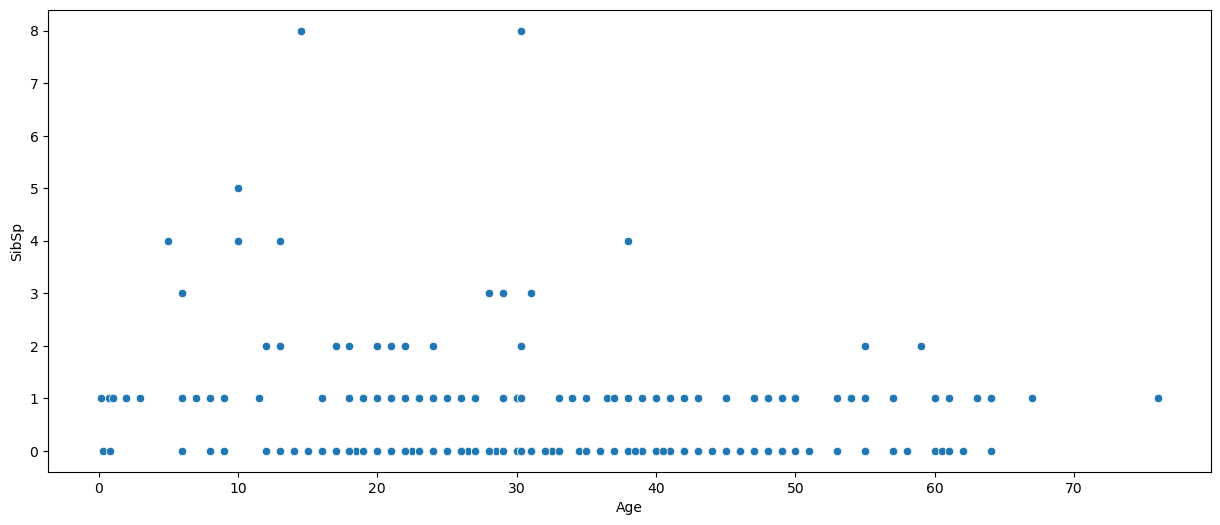

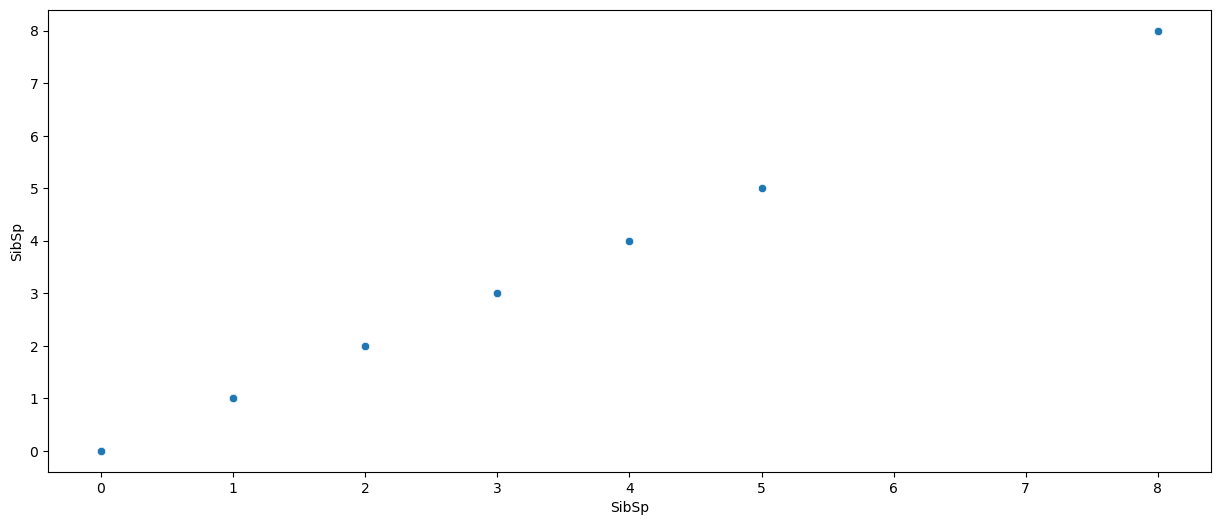

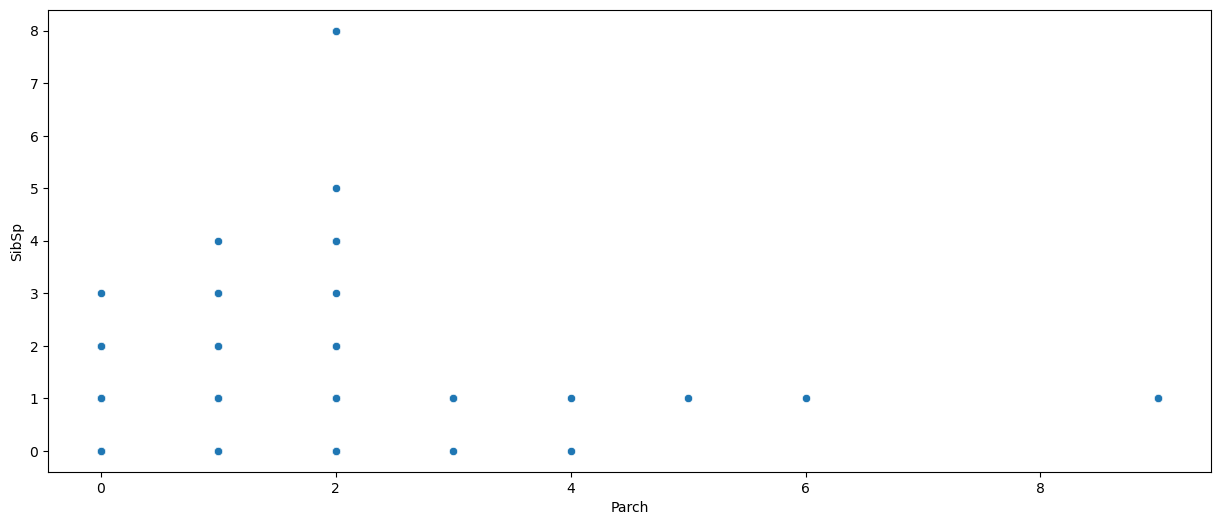

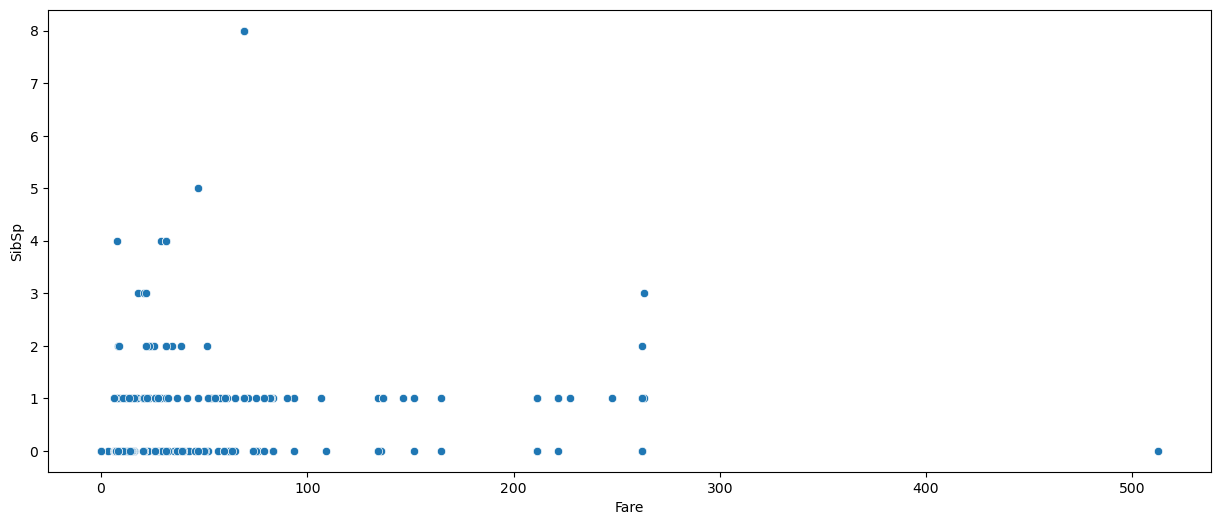

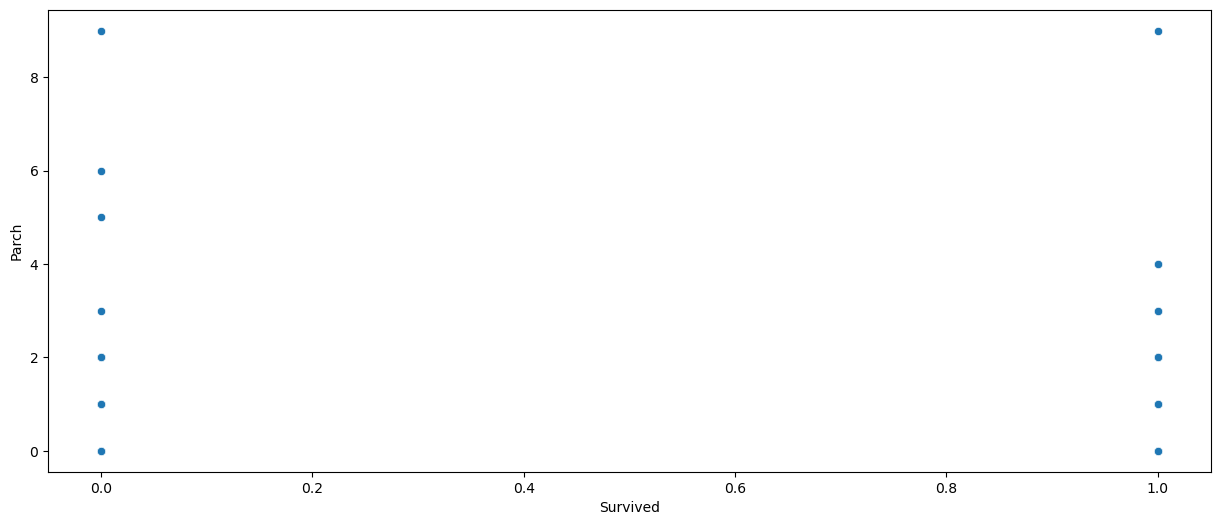

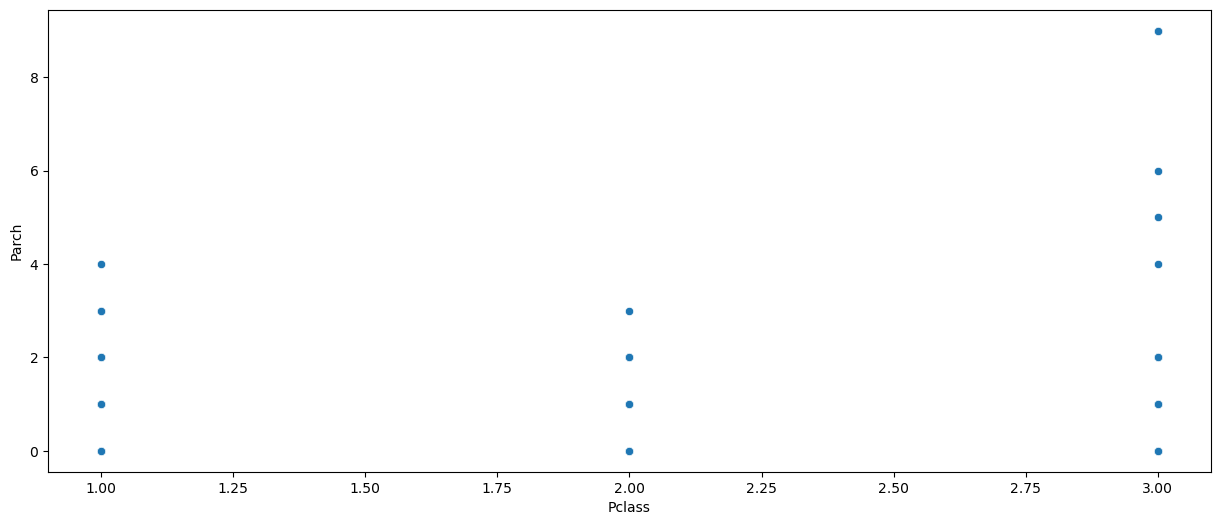

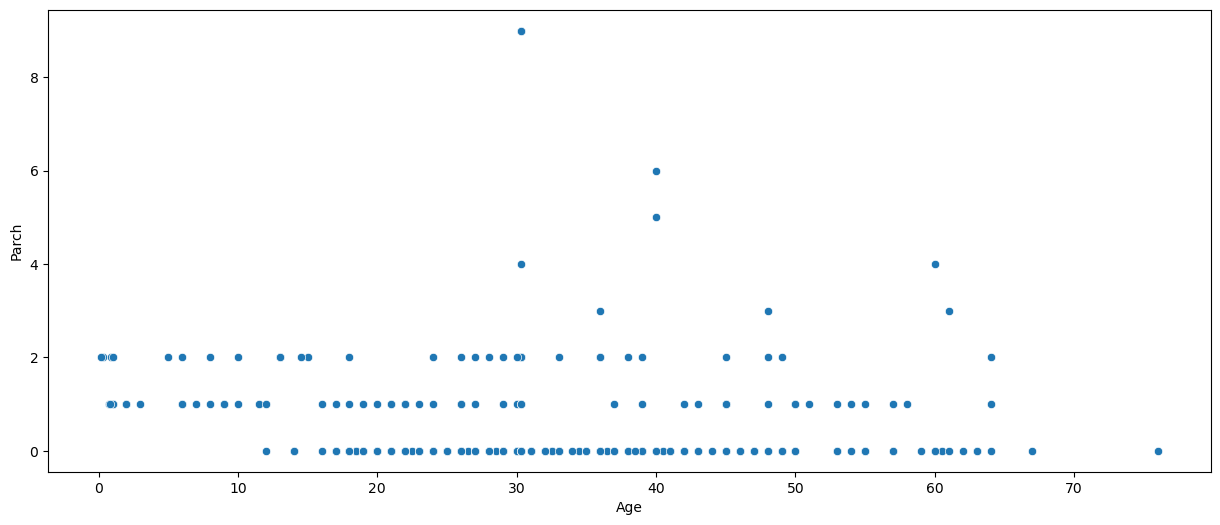

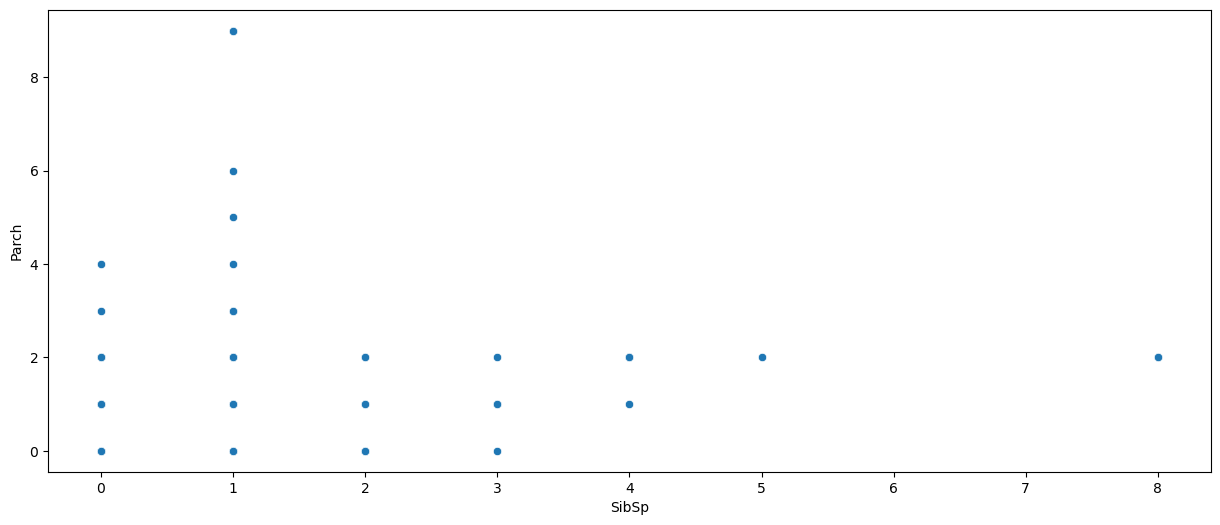

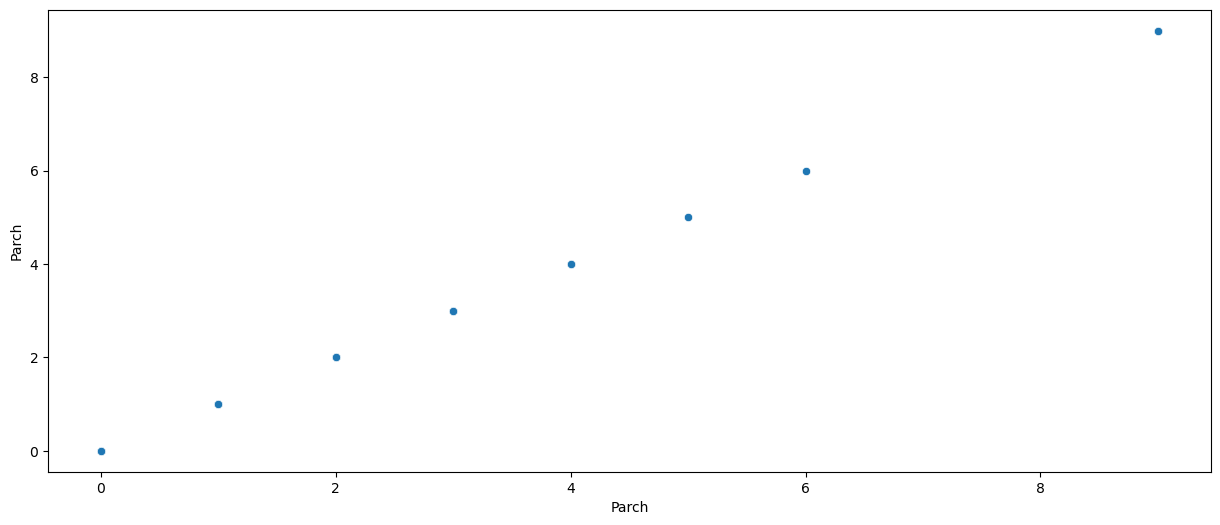

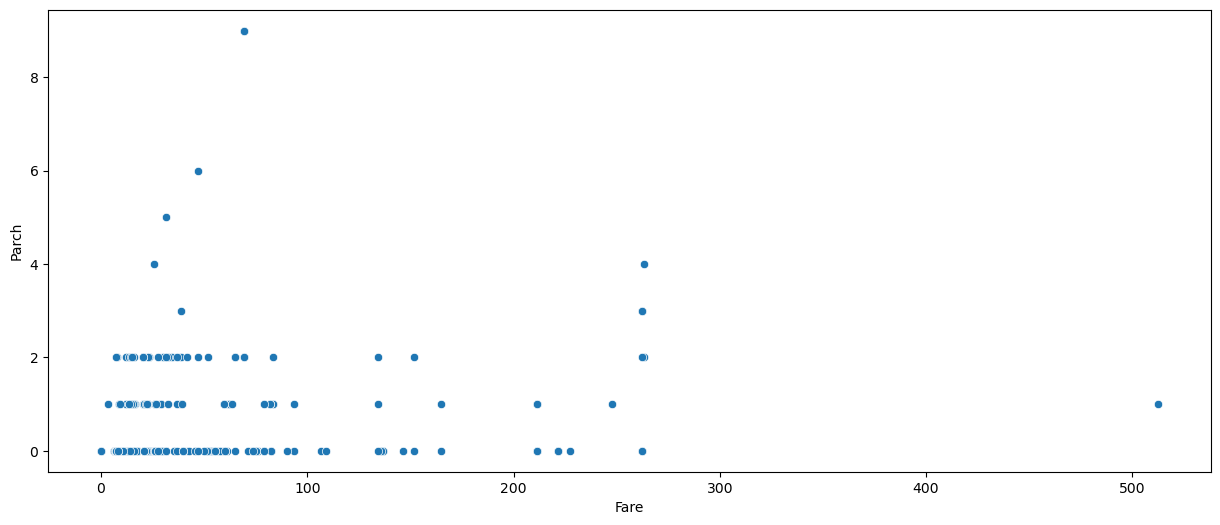

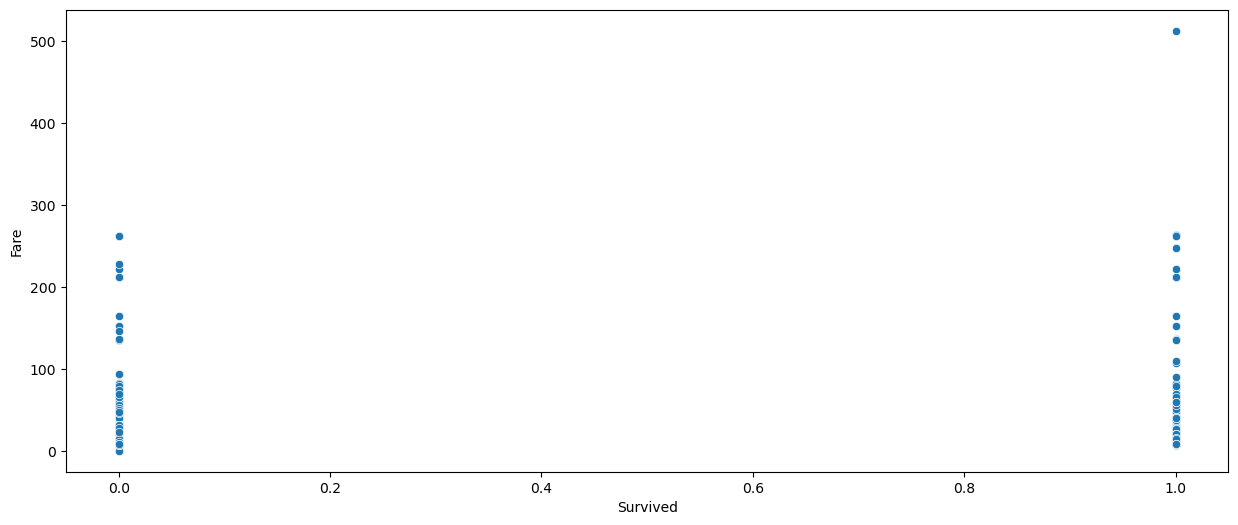

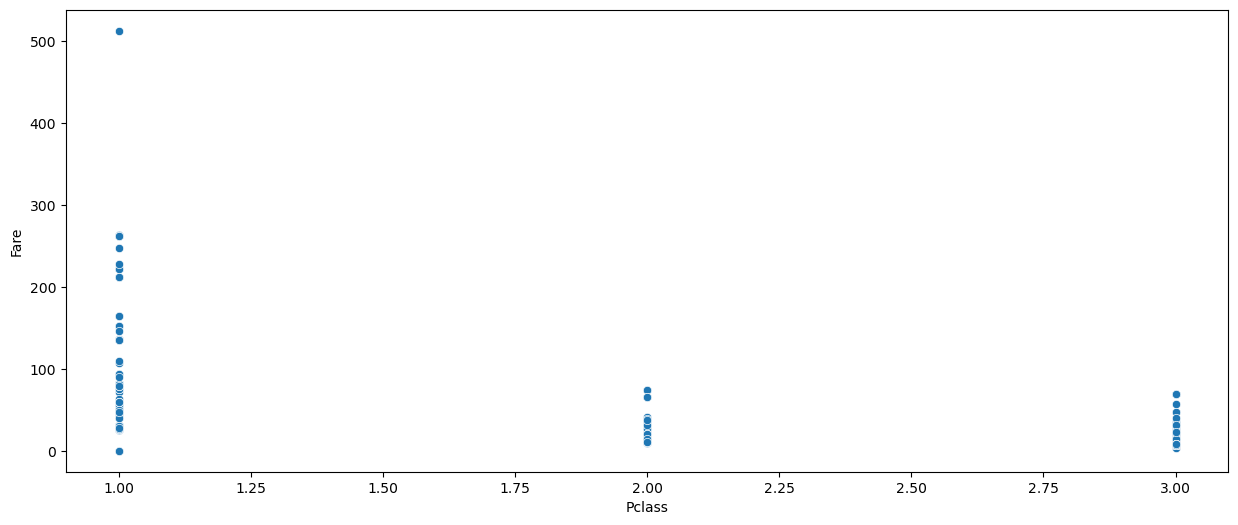

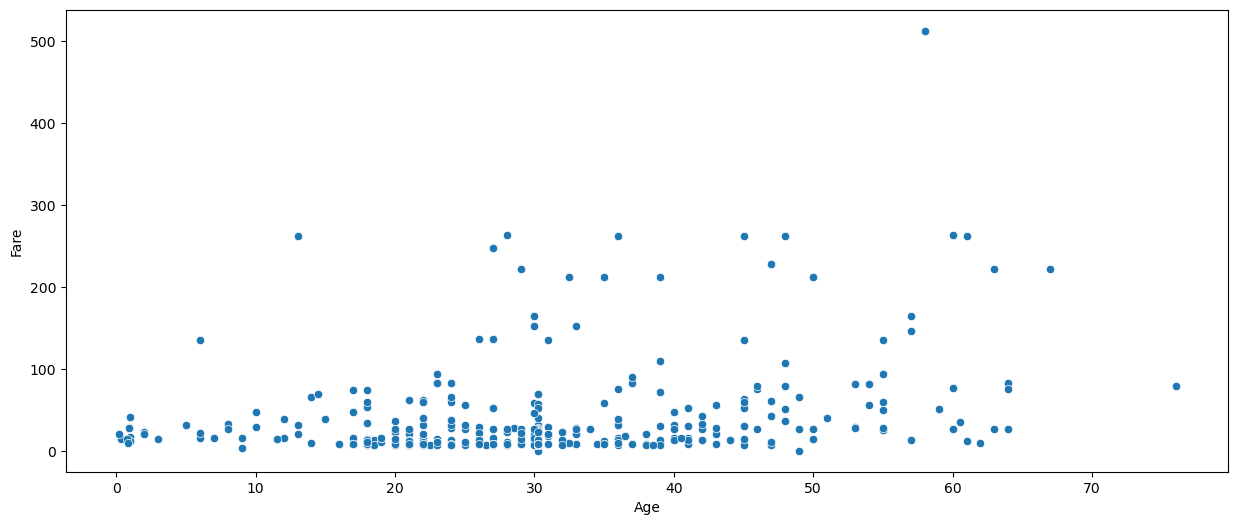

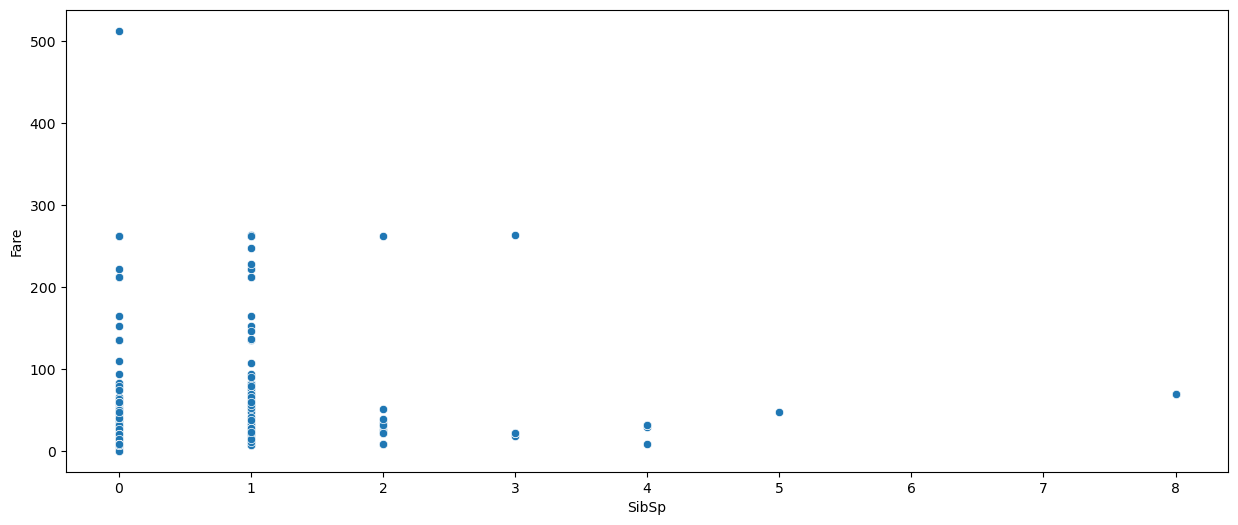

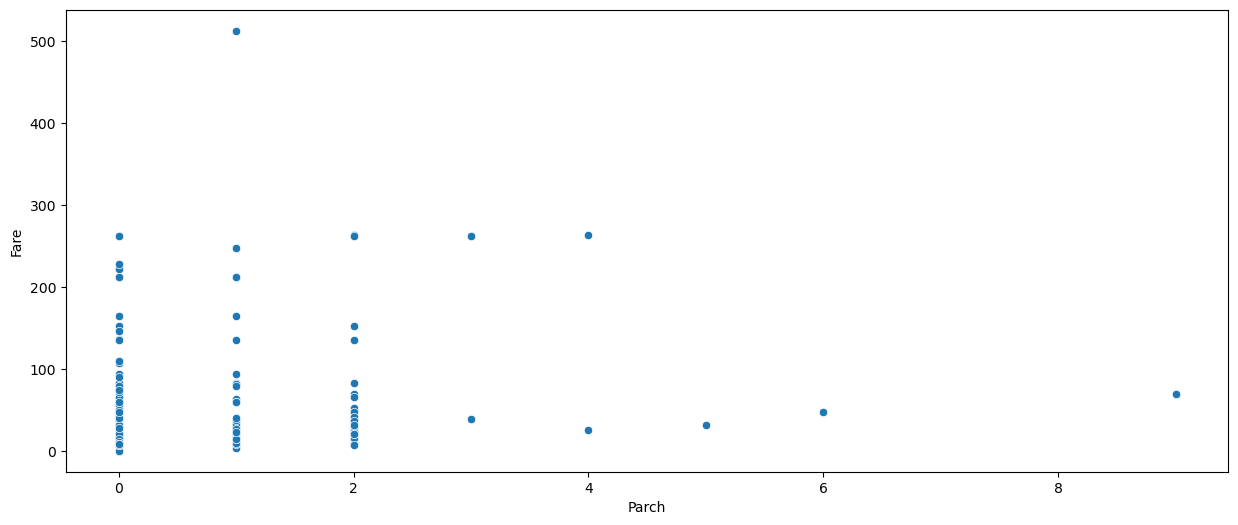

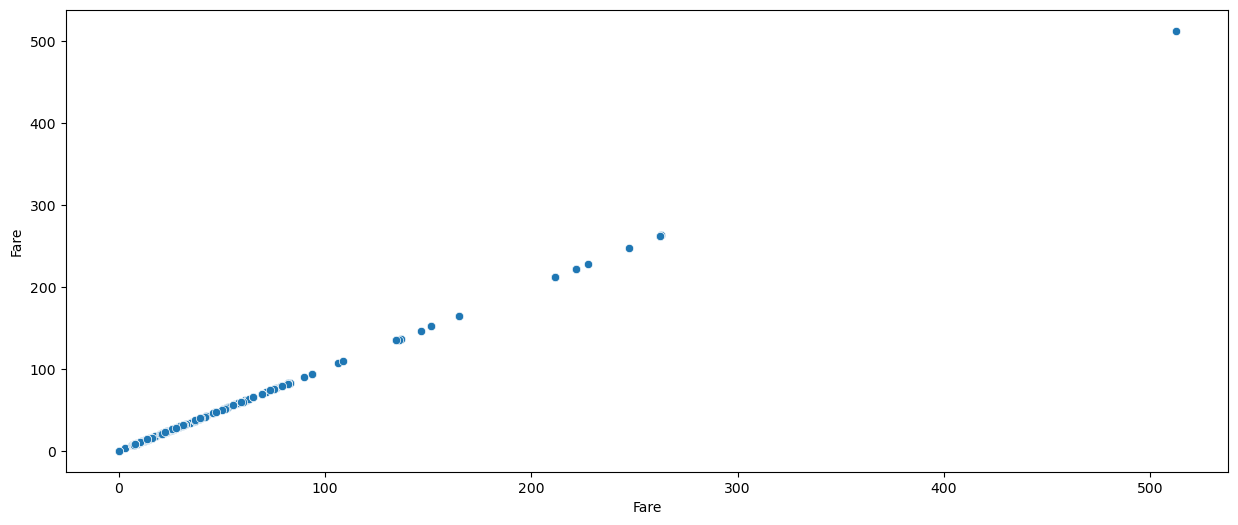

In [30]:
for i in numerical_columns:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.scatterplot(x=df[j],y=df[i],data=df,palette='hls')
        plt.show()

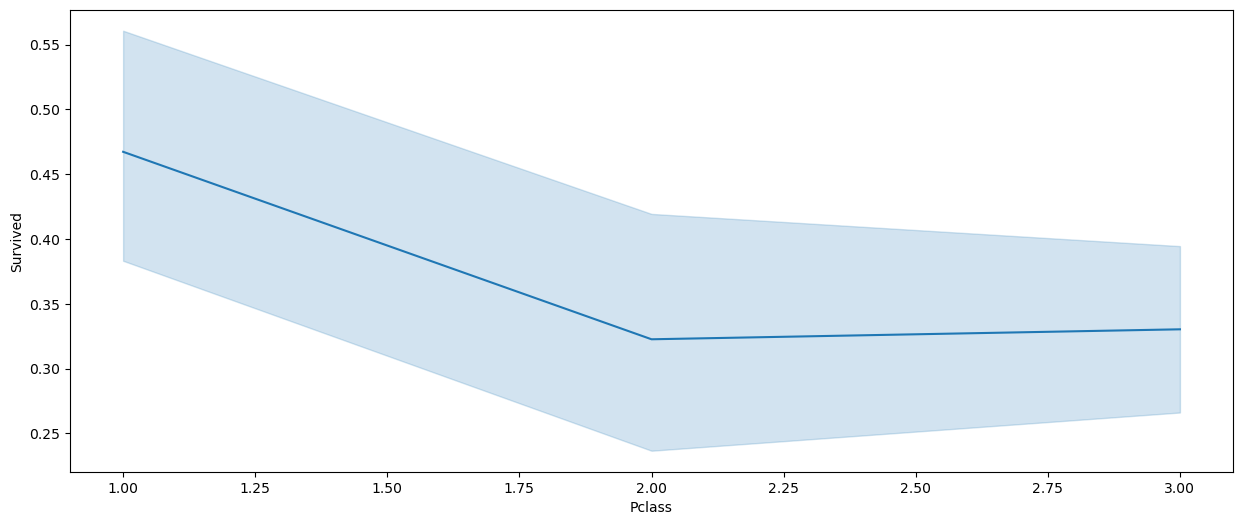

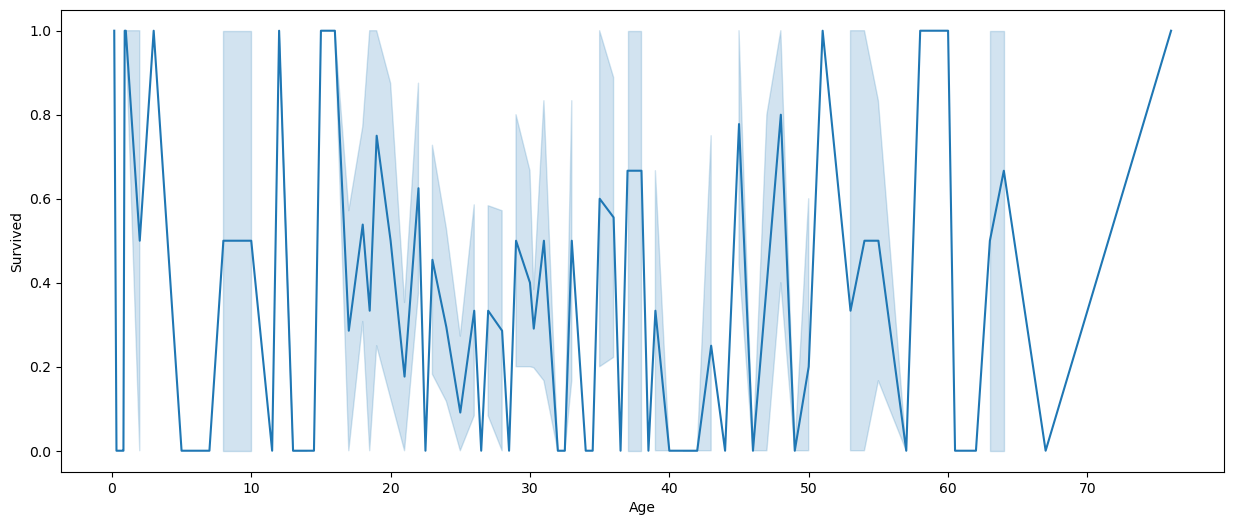

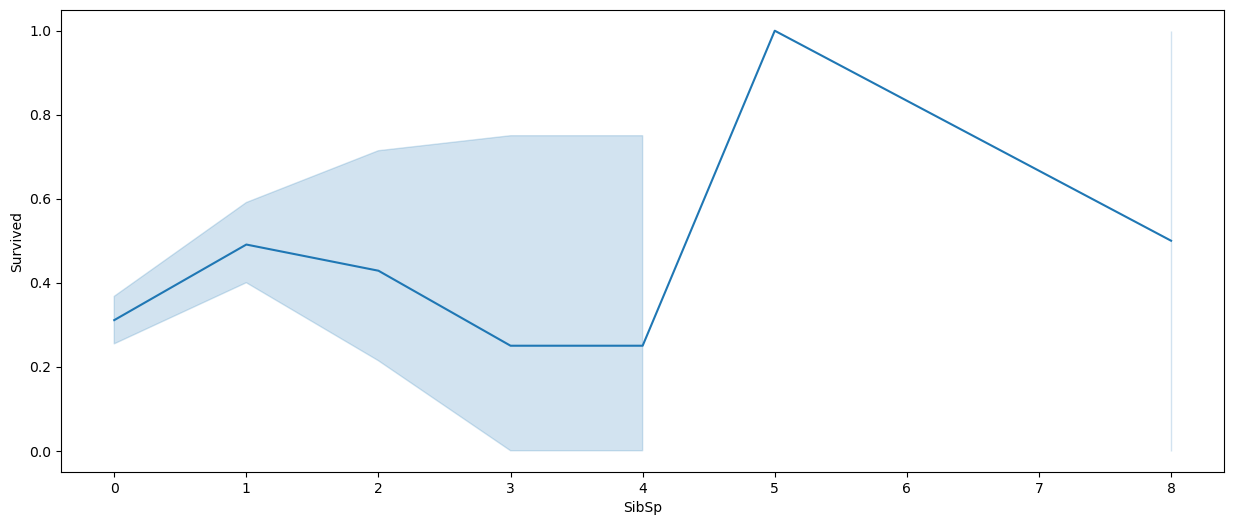

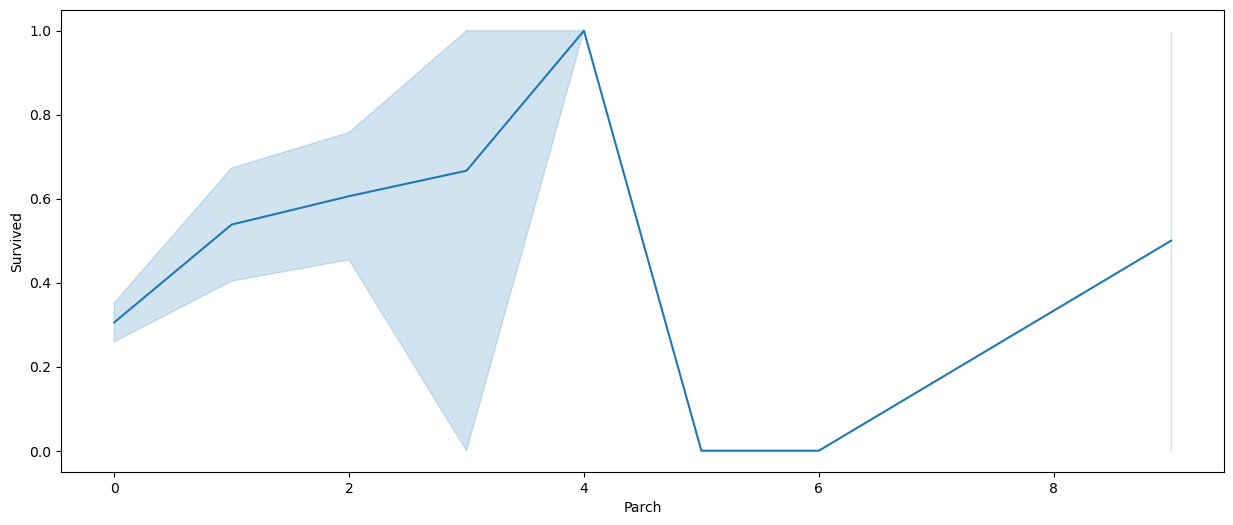

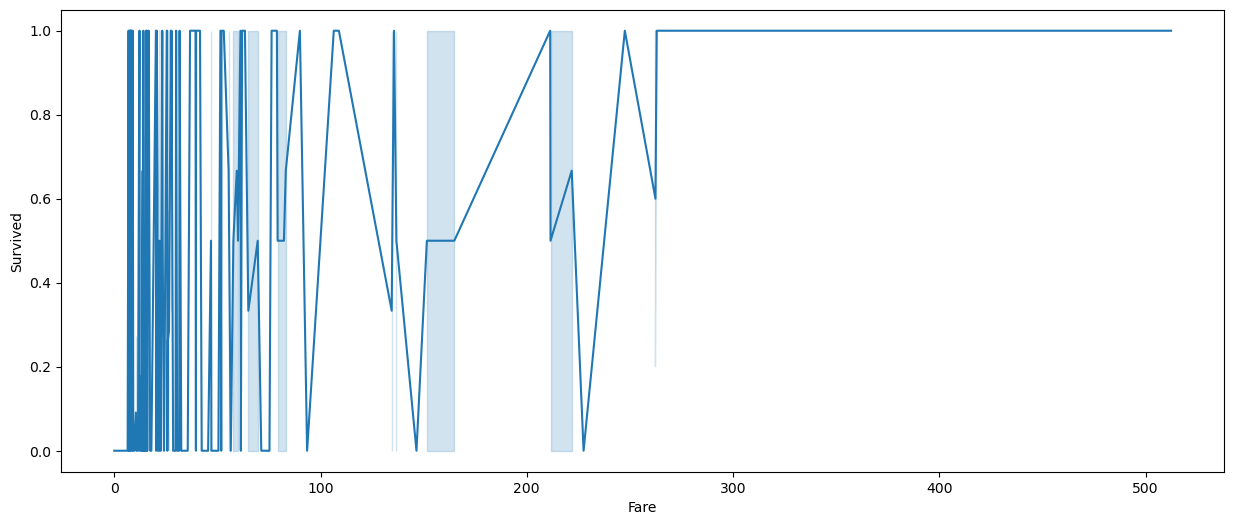

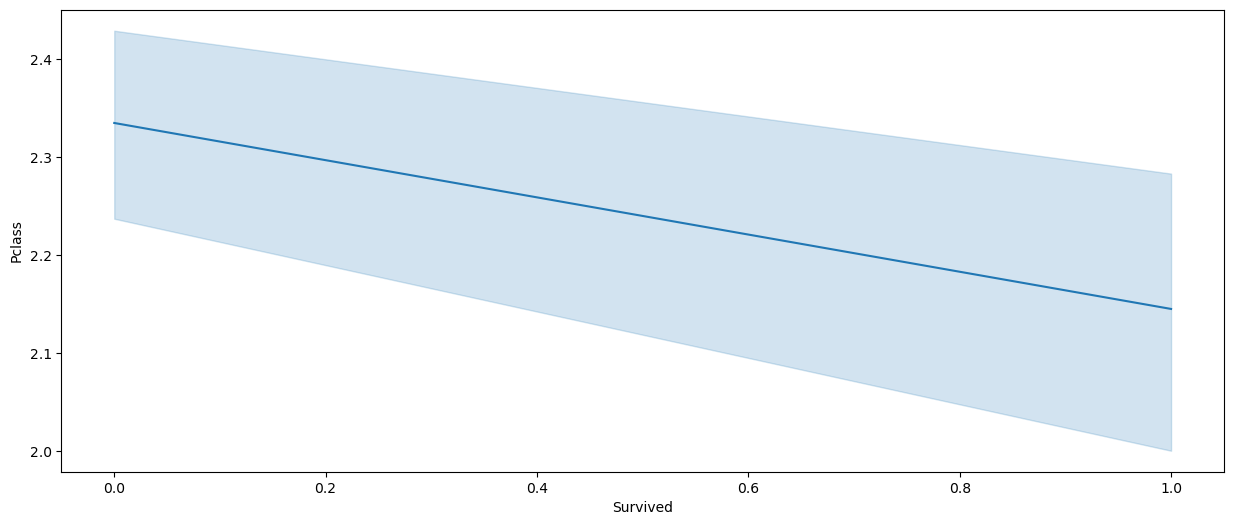

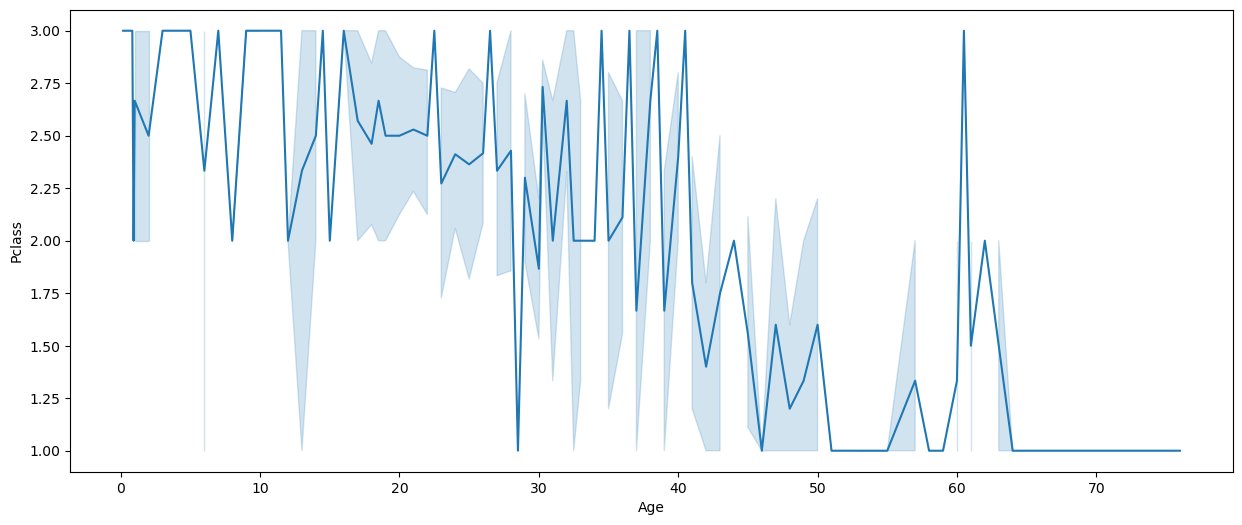

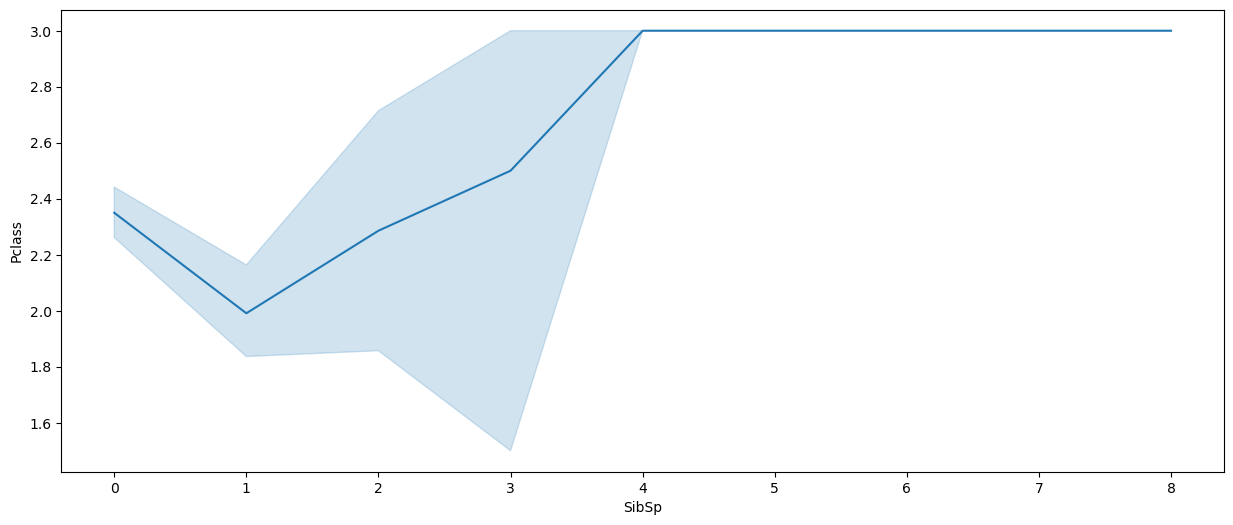

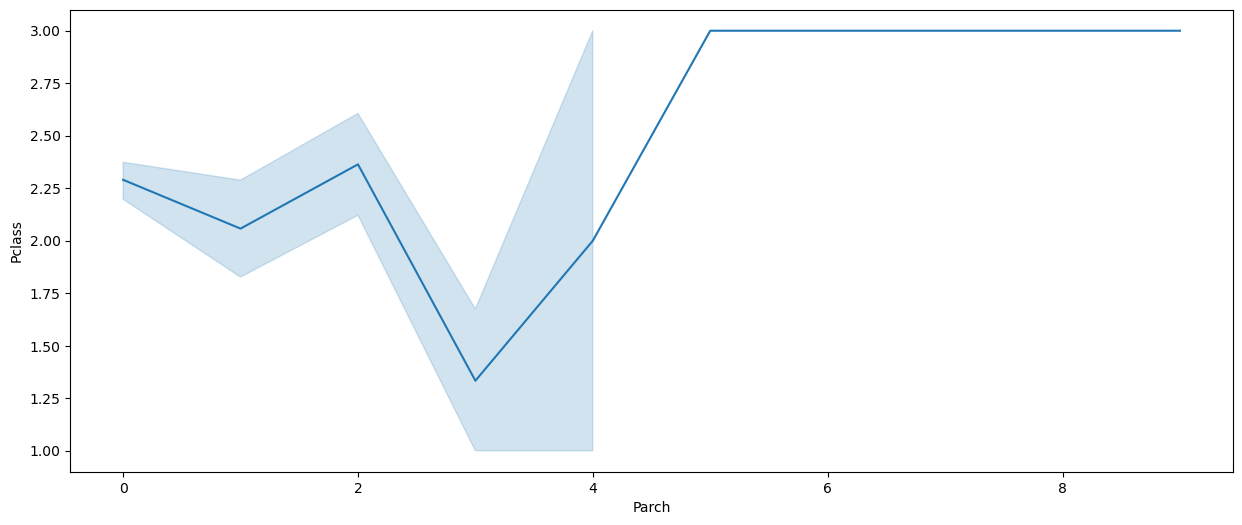

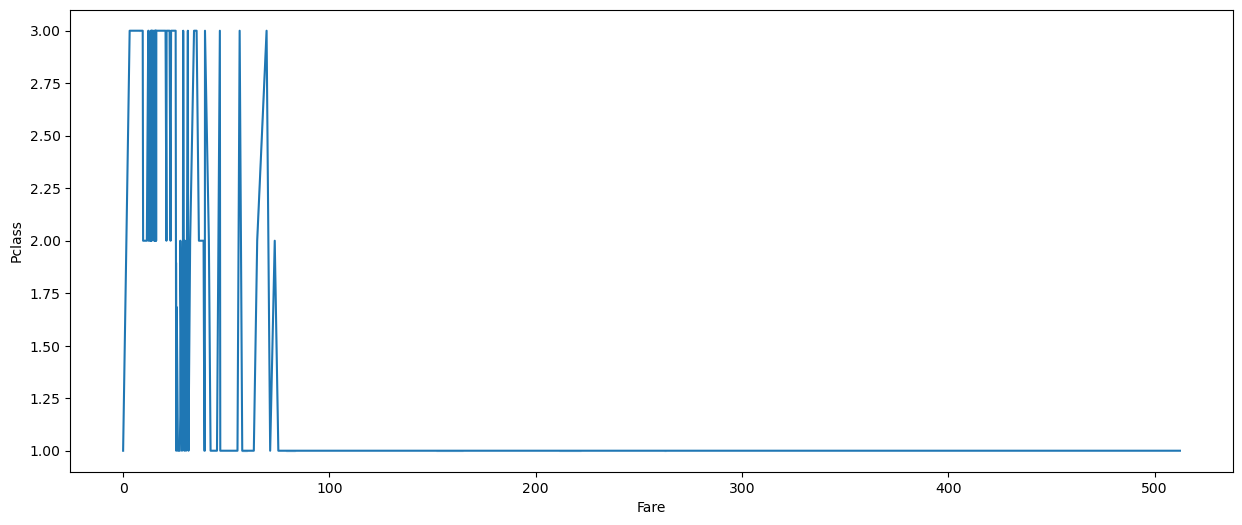

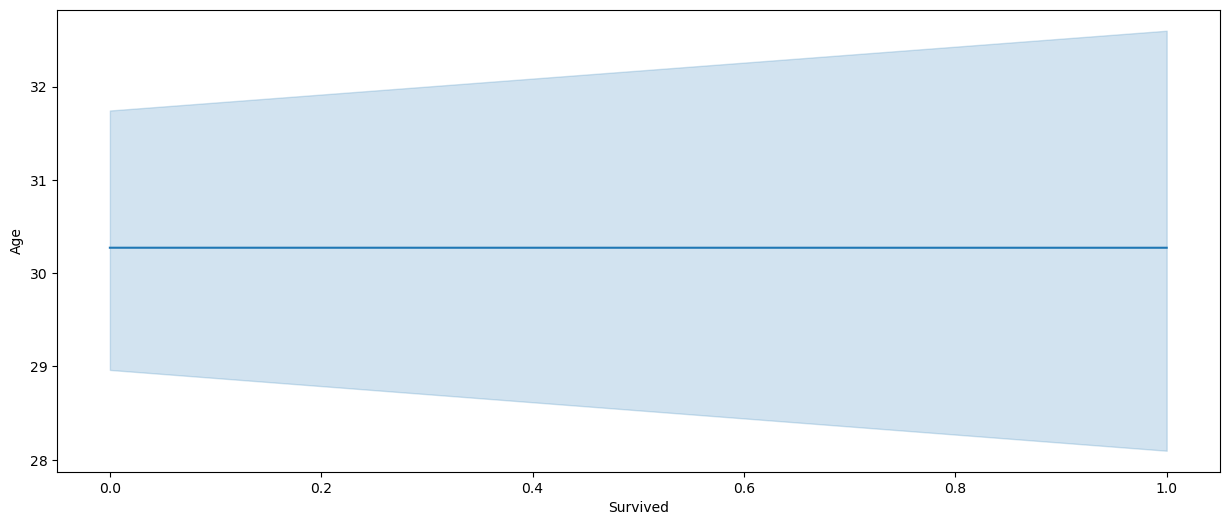

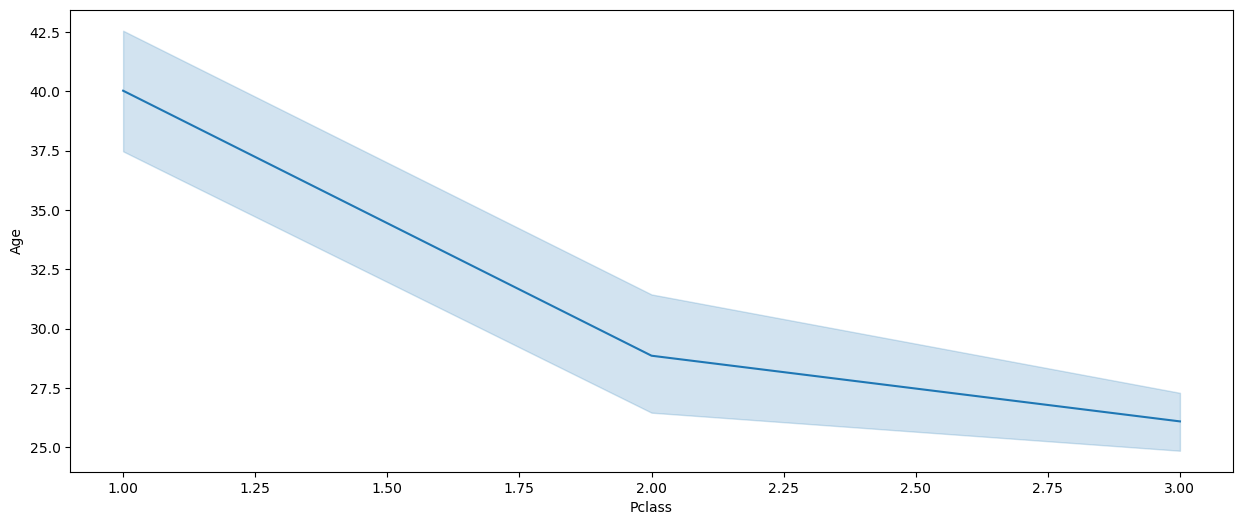

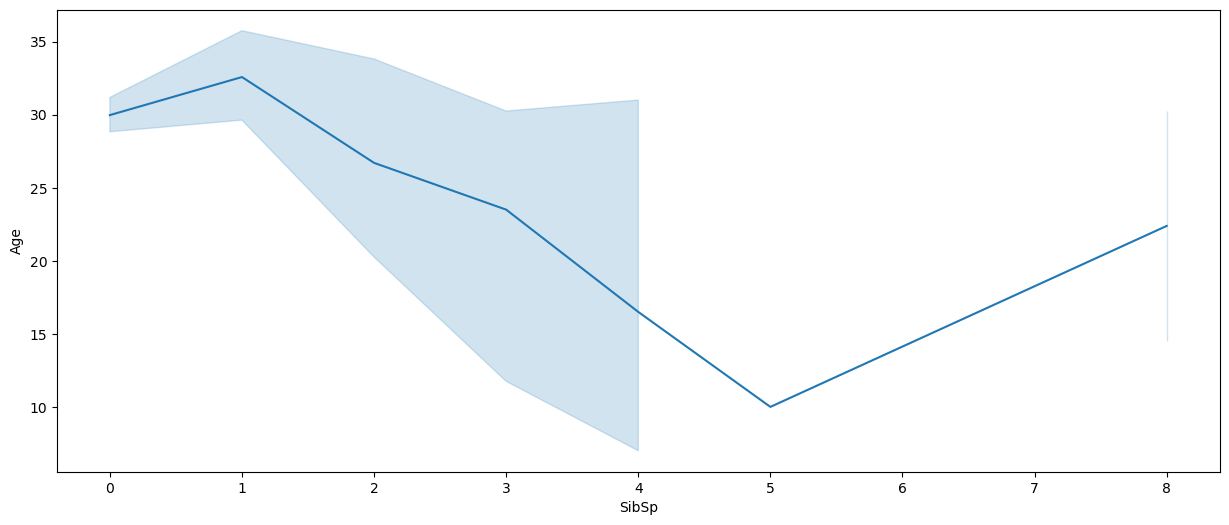

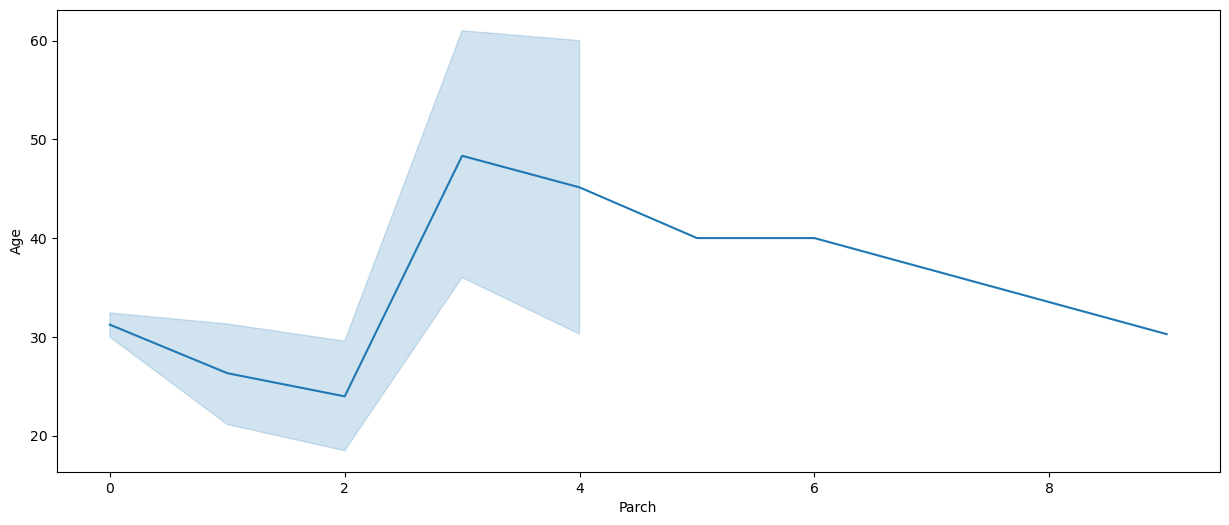

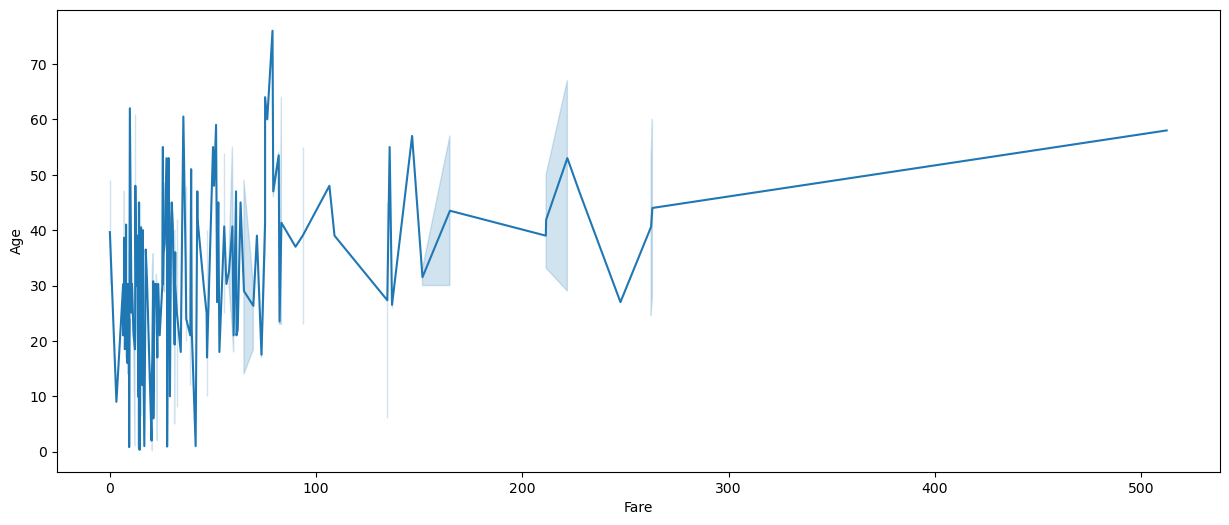

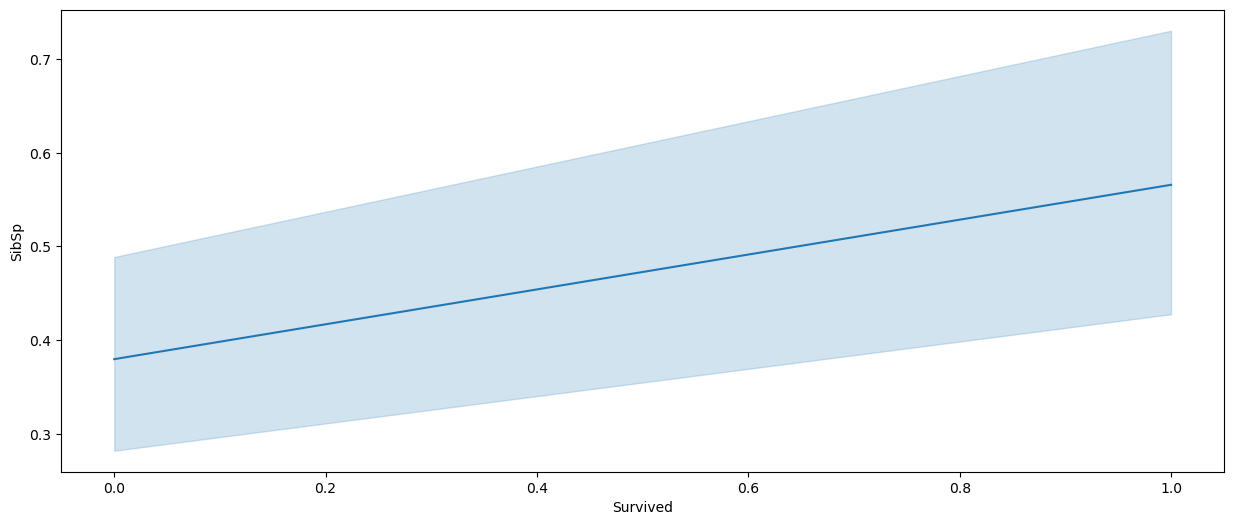

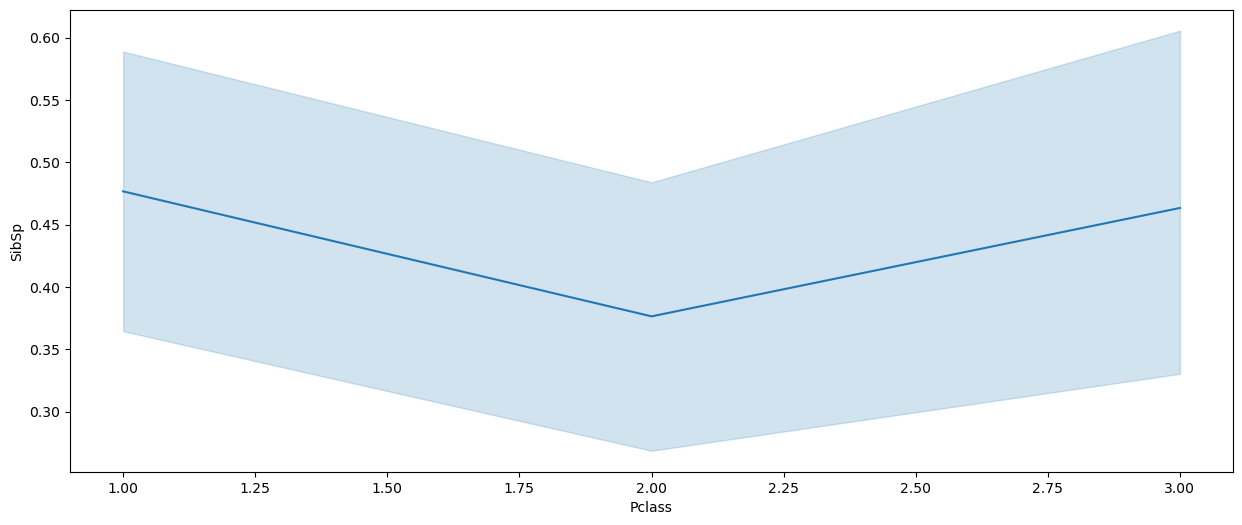

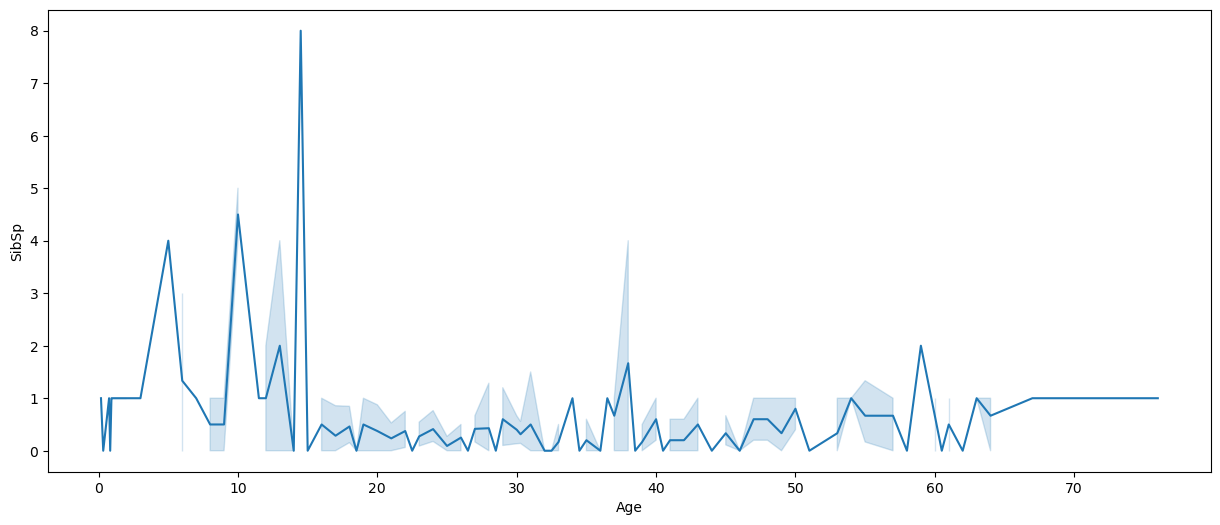

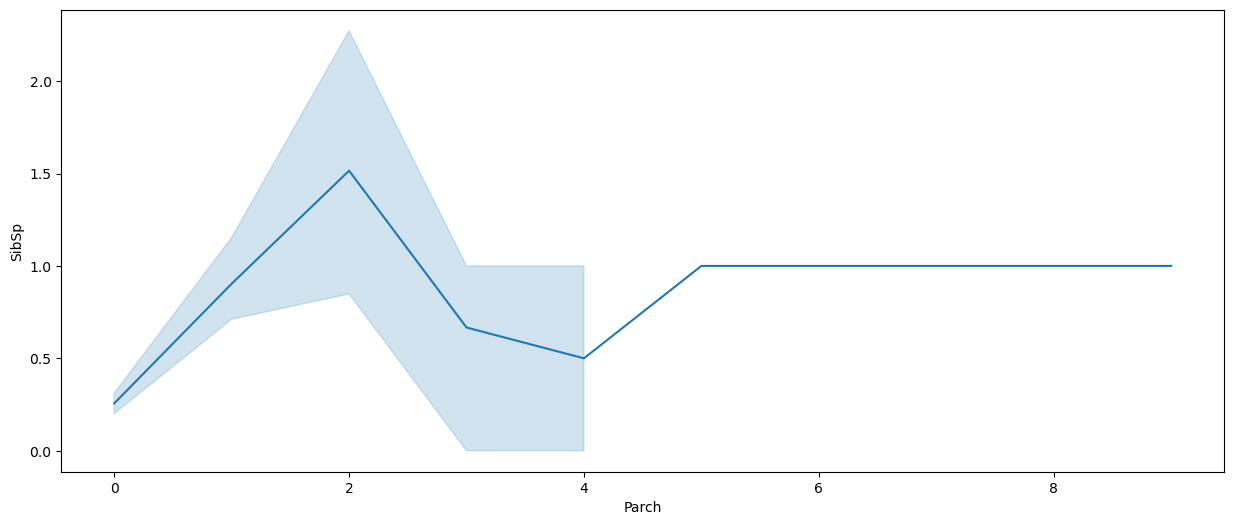

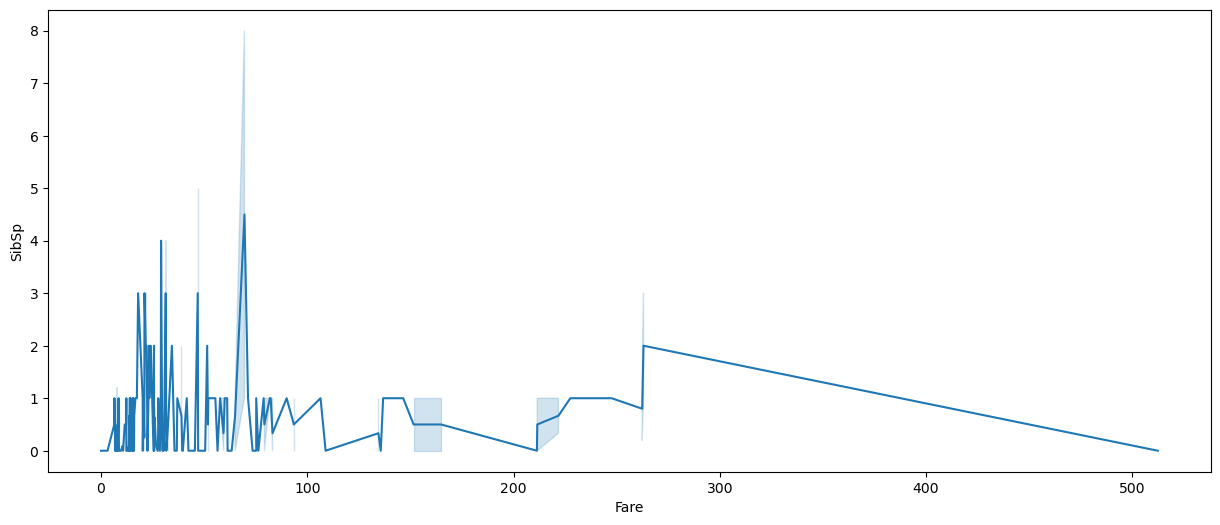

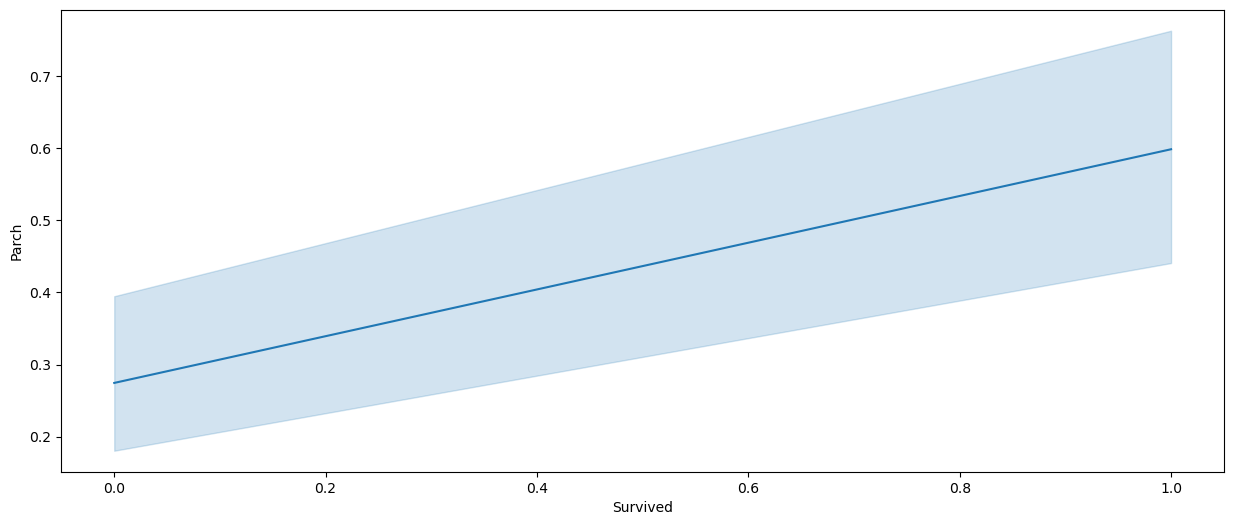

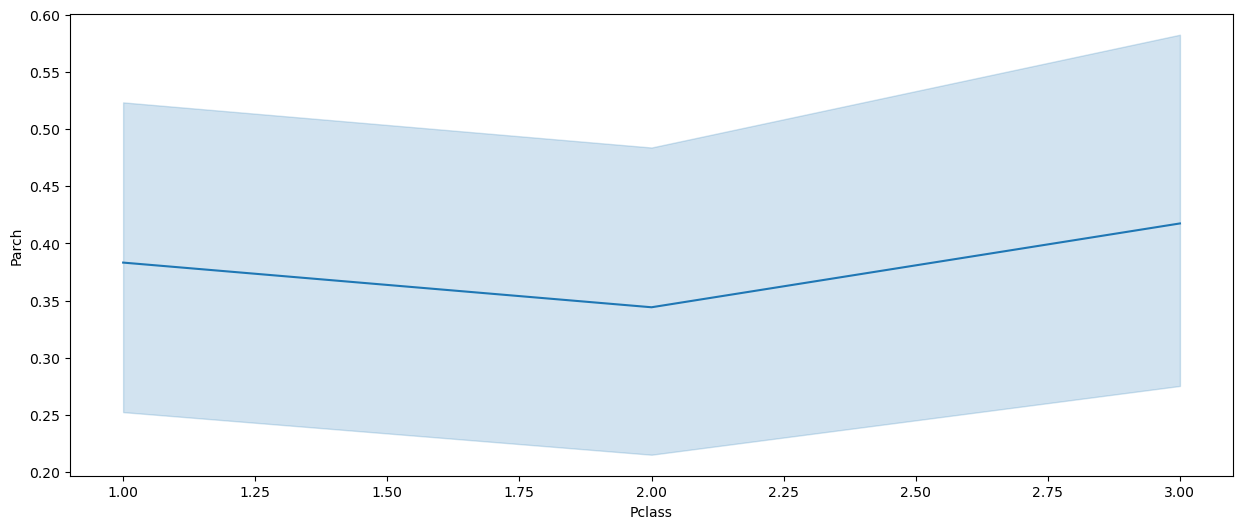

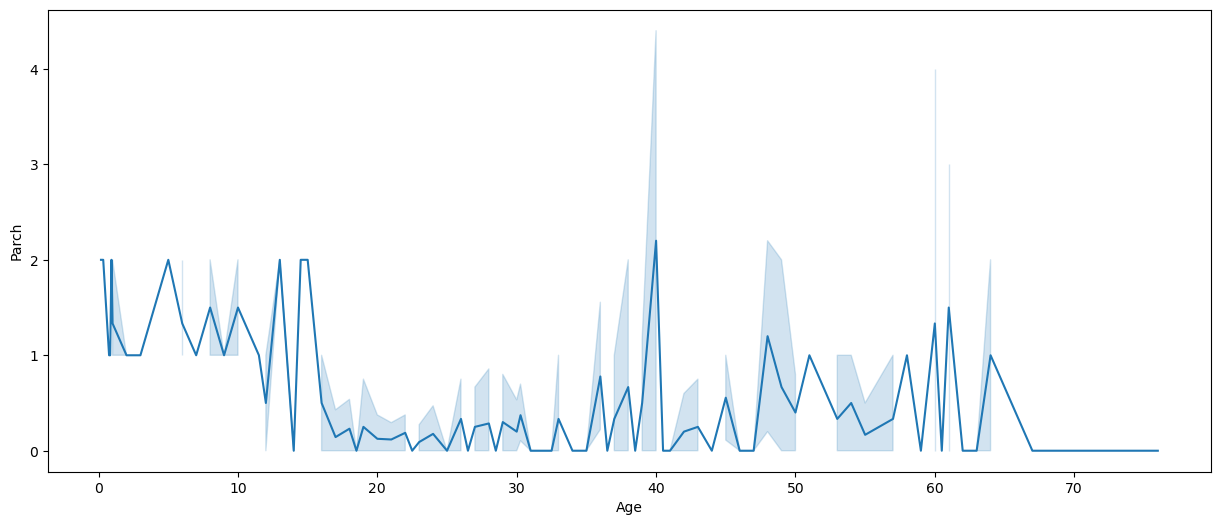

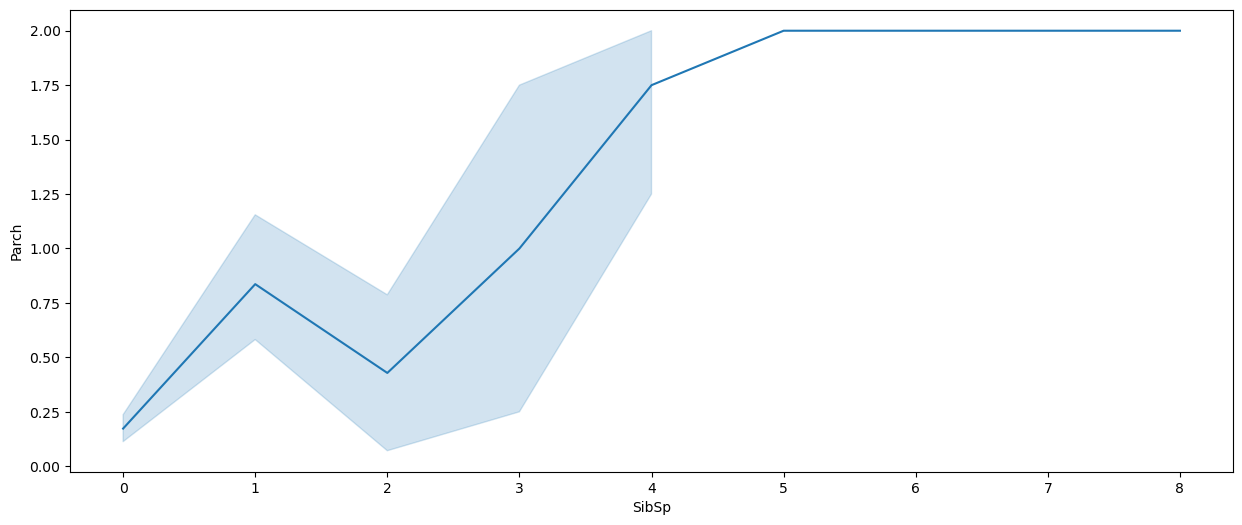

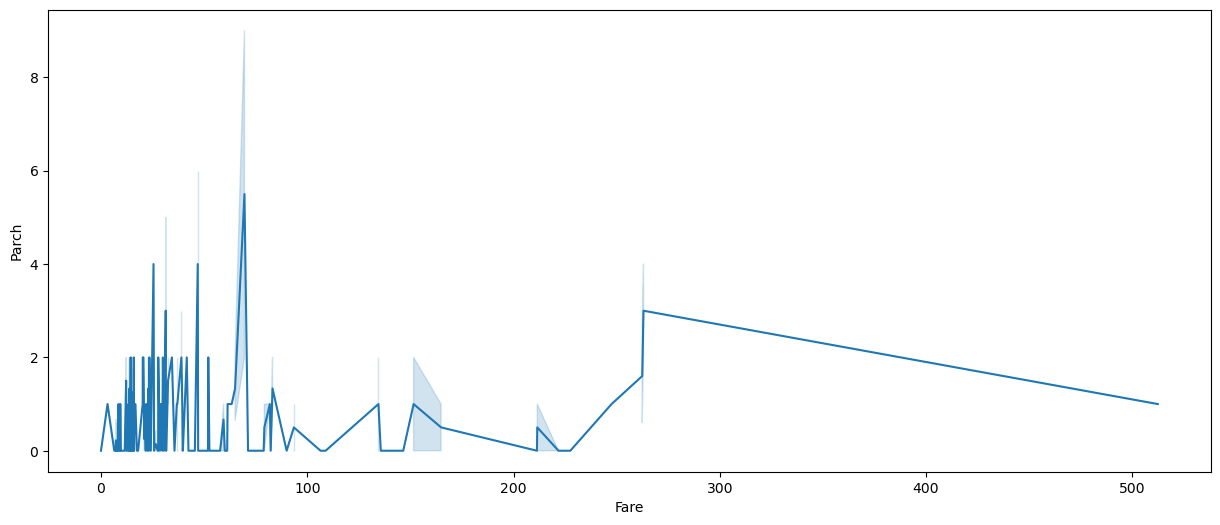

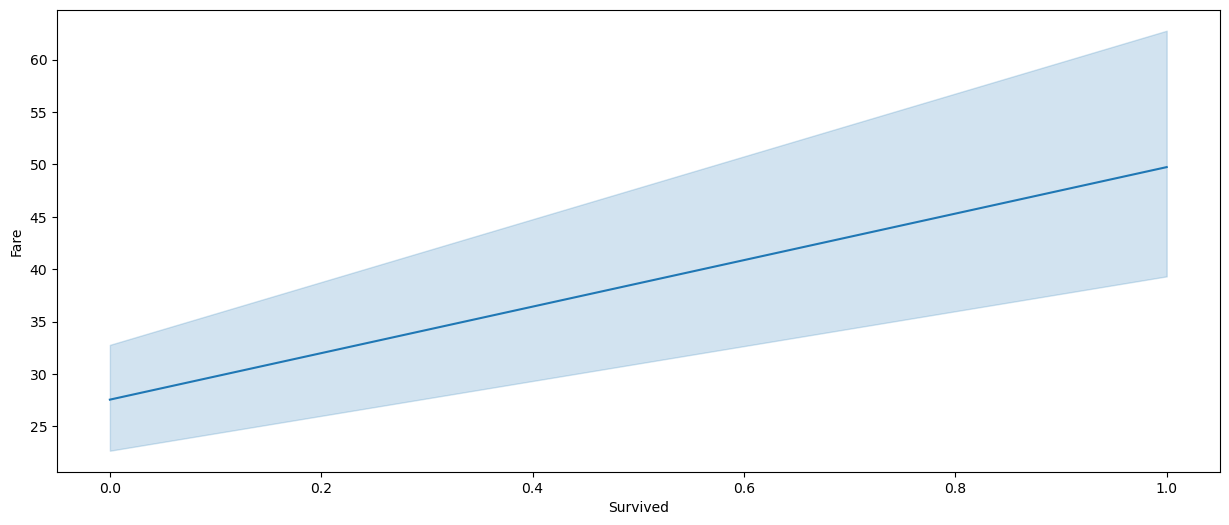

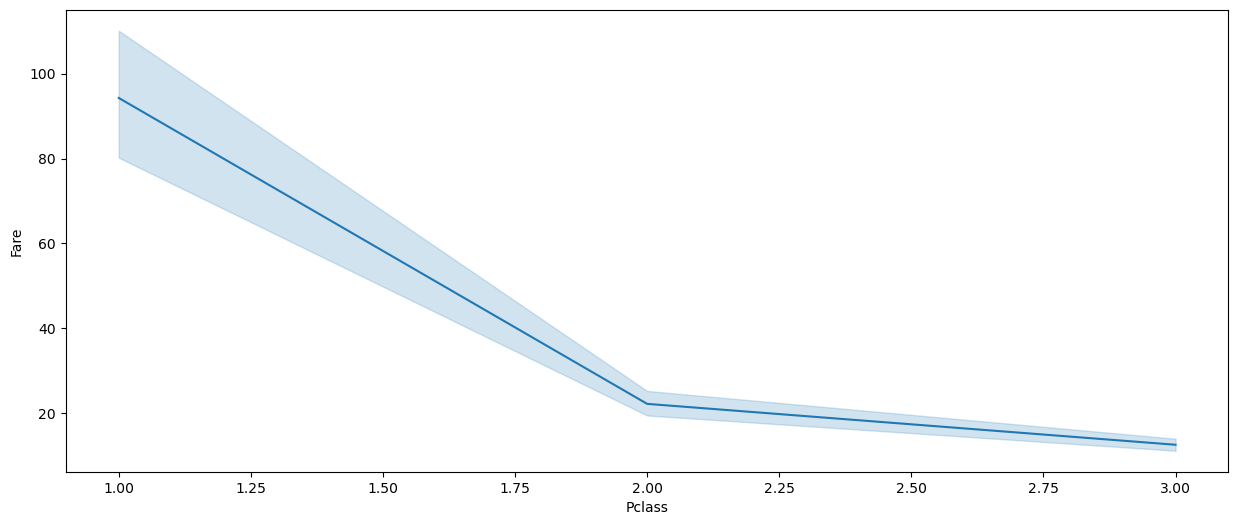

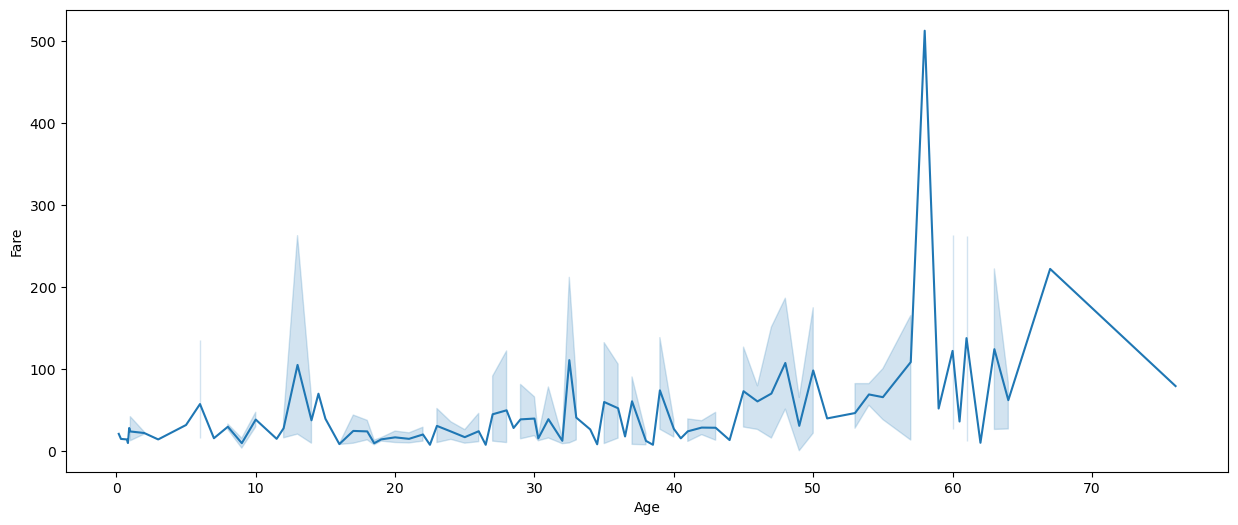

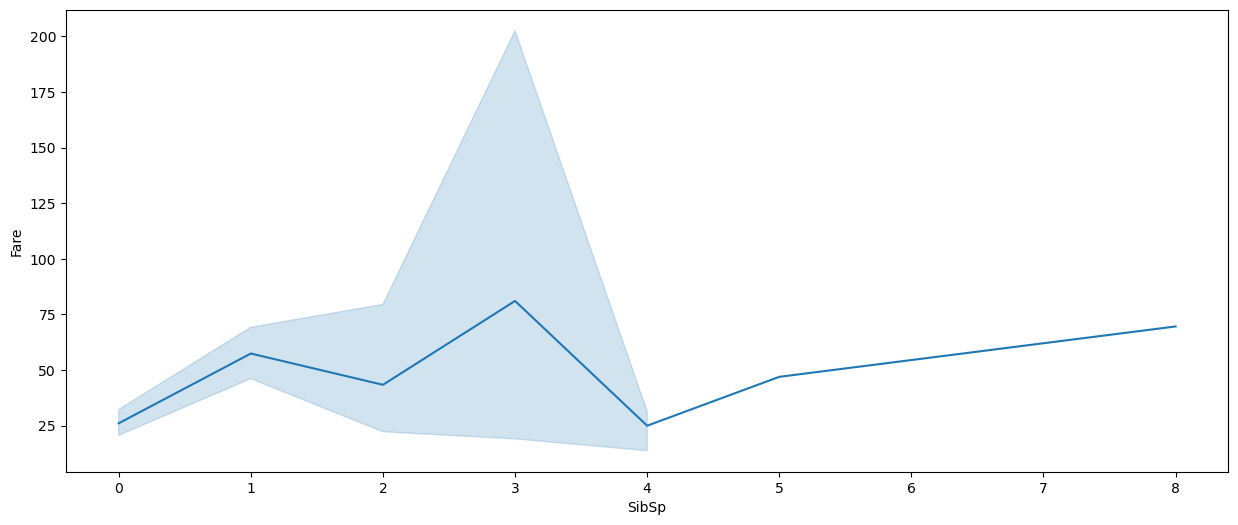

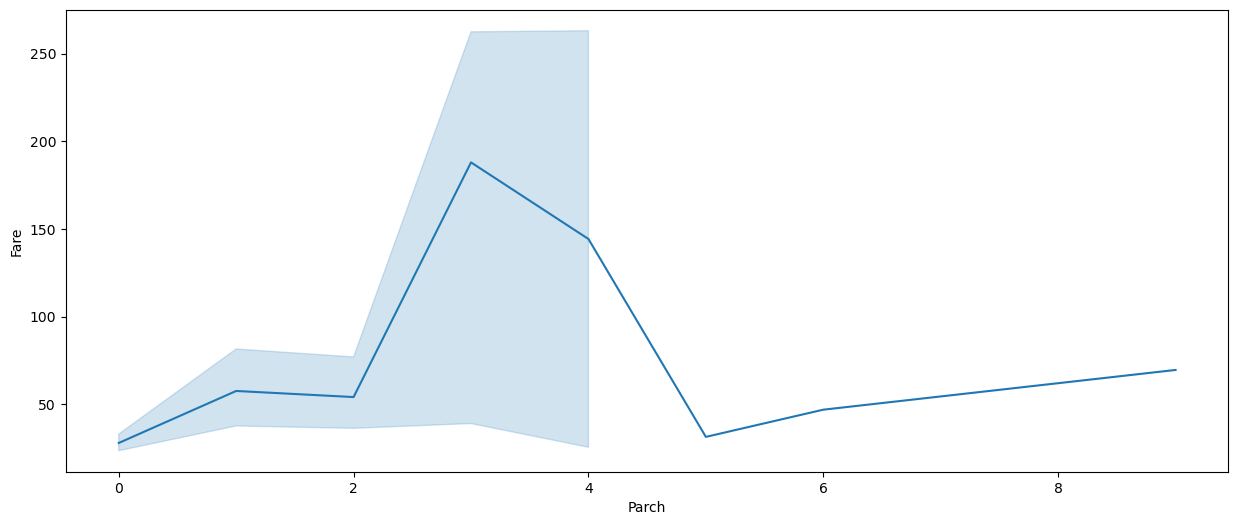

In [31]:
for i in numerical_columns:
  for j in numerical_columns:
    if i!=j:
      plt.figure(figsize=(15,6))
      sns.lineplot(x=df[j],y=df[i],data=df,palette = 'hls')
      plt.show()

In [32]:
pd.pivot_table(df,index='Survived',values=['Pclass','Age','SibSp','Parch','Fare'])

Age       Fare     Parch    Pclass     SibSp
Survived                                                    
0         30.272699  27.558326  0.274436  2.334586  0.379699
1         30.272400  49.747699  0.598684  2.144737  0.565789

In [33]:
df_new=df.copy()

In [34]:
df_new.groupby('Sex')['Age'].mean()

Sex
female    30.272400
male      30.272699
Name: Age, dtype: float64

In [35]:
df_new.groupby('Pclass')['Age'].mean()

Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64

In [36]:
df=pd.get_dummies(df,columns=object_columns,drop_first=True)

In [37]:
df

Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0           0       3  34.50000      0      0    7.8292         1           1   
1           1       3  47.00000      1      0    7.0000         0           0   
2           0       2  62.00000      0      0    9.6875         1           1   
3           0       3  27.00000      0      0    8.6625         1           0   
4           1       3  22.00000      1      1   12.2875         0           0   
..        ...     ...       ...    ...    ...       ...       ...         ...   
413         0       3  30.27259      0      0    8.0500         1           0   
414         1       1  39.00000      0      0  108.9000         0           0   
415         0       3  38.50000      0      0    7.2500         1           0   
416         0       3  30.27259      0      0    8.0500         1           0   
417         0       3  30.27259      1      1   22.3583         1           0   

     Embarked_S  
0             0  
1             1  
2             0  
3             1  
4             1  
..          ...  
413           1  
414           0  
415           1  
416           1  
417           0  

[418 rows x 9 columns]

In [38]:
corr=df.corr()

In [39]:
corr

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.108615 -0.000011  0.099943  0.159120  0.191382   
Pclass     -0.108615  1.000000 -0.440782  0.001087  0.018721 -0.576619   
Age        -0.000011 -0.440782  1.000000 -0.079535 -0.045073  0.326800   
SibSp       0.099943  0.001087 -0.079535  1.000000  0.306895  0.171488   
Parch       0.159120  0.018721 -0.045073  0.306895  1.000000  0.230001   
Fare        0.191382 -0.576619  0.326800  0.171488  0.230001  1.000000   
Sex_male   -1.000000  0.108615  0.000011 -0.099943 -0.159120 -0.191382   
Embarked_Q  0.115574  0.252608 -0.012719 -0.098824 -0.132948 -0.155539   
Embarked_S -0.105883  0.120783 -0.136822  0.079367  0.092201 -0.178464   

            Sex_male  Embarked_Q  Embarked_S  
Survived   -1.000000    0.115574   -0.105883  
Pclass      0.108615    0.252608    0.120783  
Age         0.000011   -0.012719   -0.136822  
SibSp      -0.099943   -0.098824    0.079367  
Parch      -0.159120   -0.132948    0.092201  
Fare       -0.191382   -0.155539   -0.178464  
Sex_male    1.000000   -0.115574    0.105883  
Embarked_Q -0.115574    1.000000   -0.474962  
Embarked_S  0.105883   -0.474962    1.000000

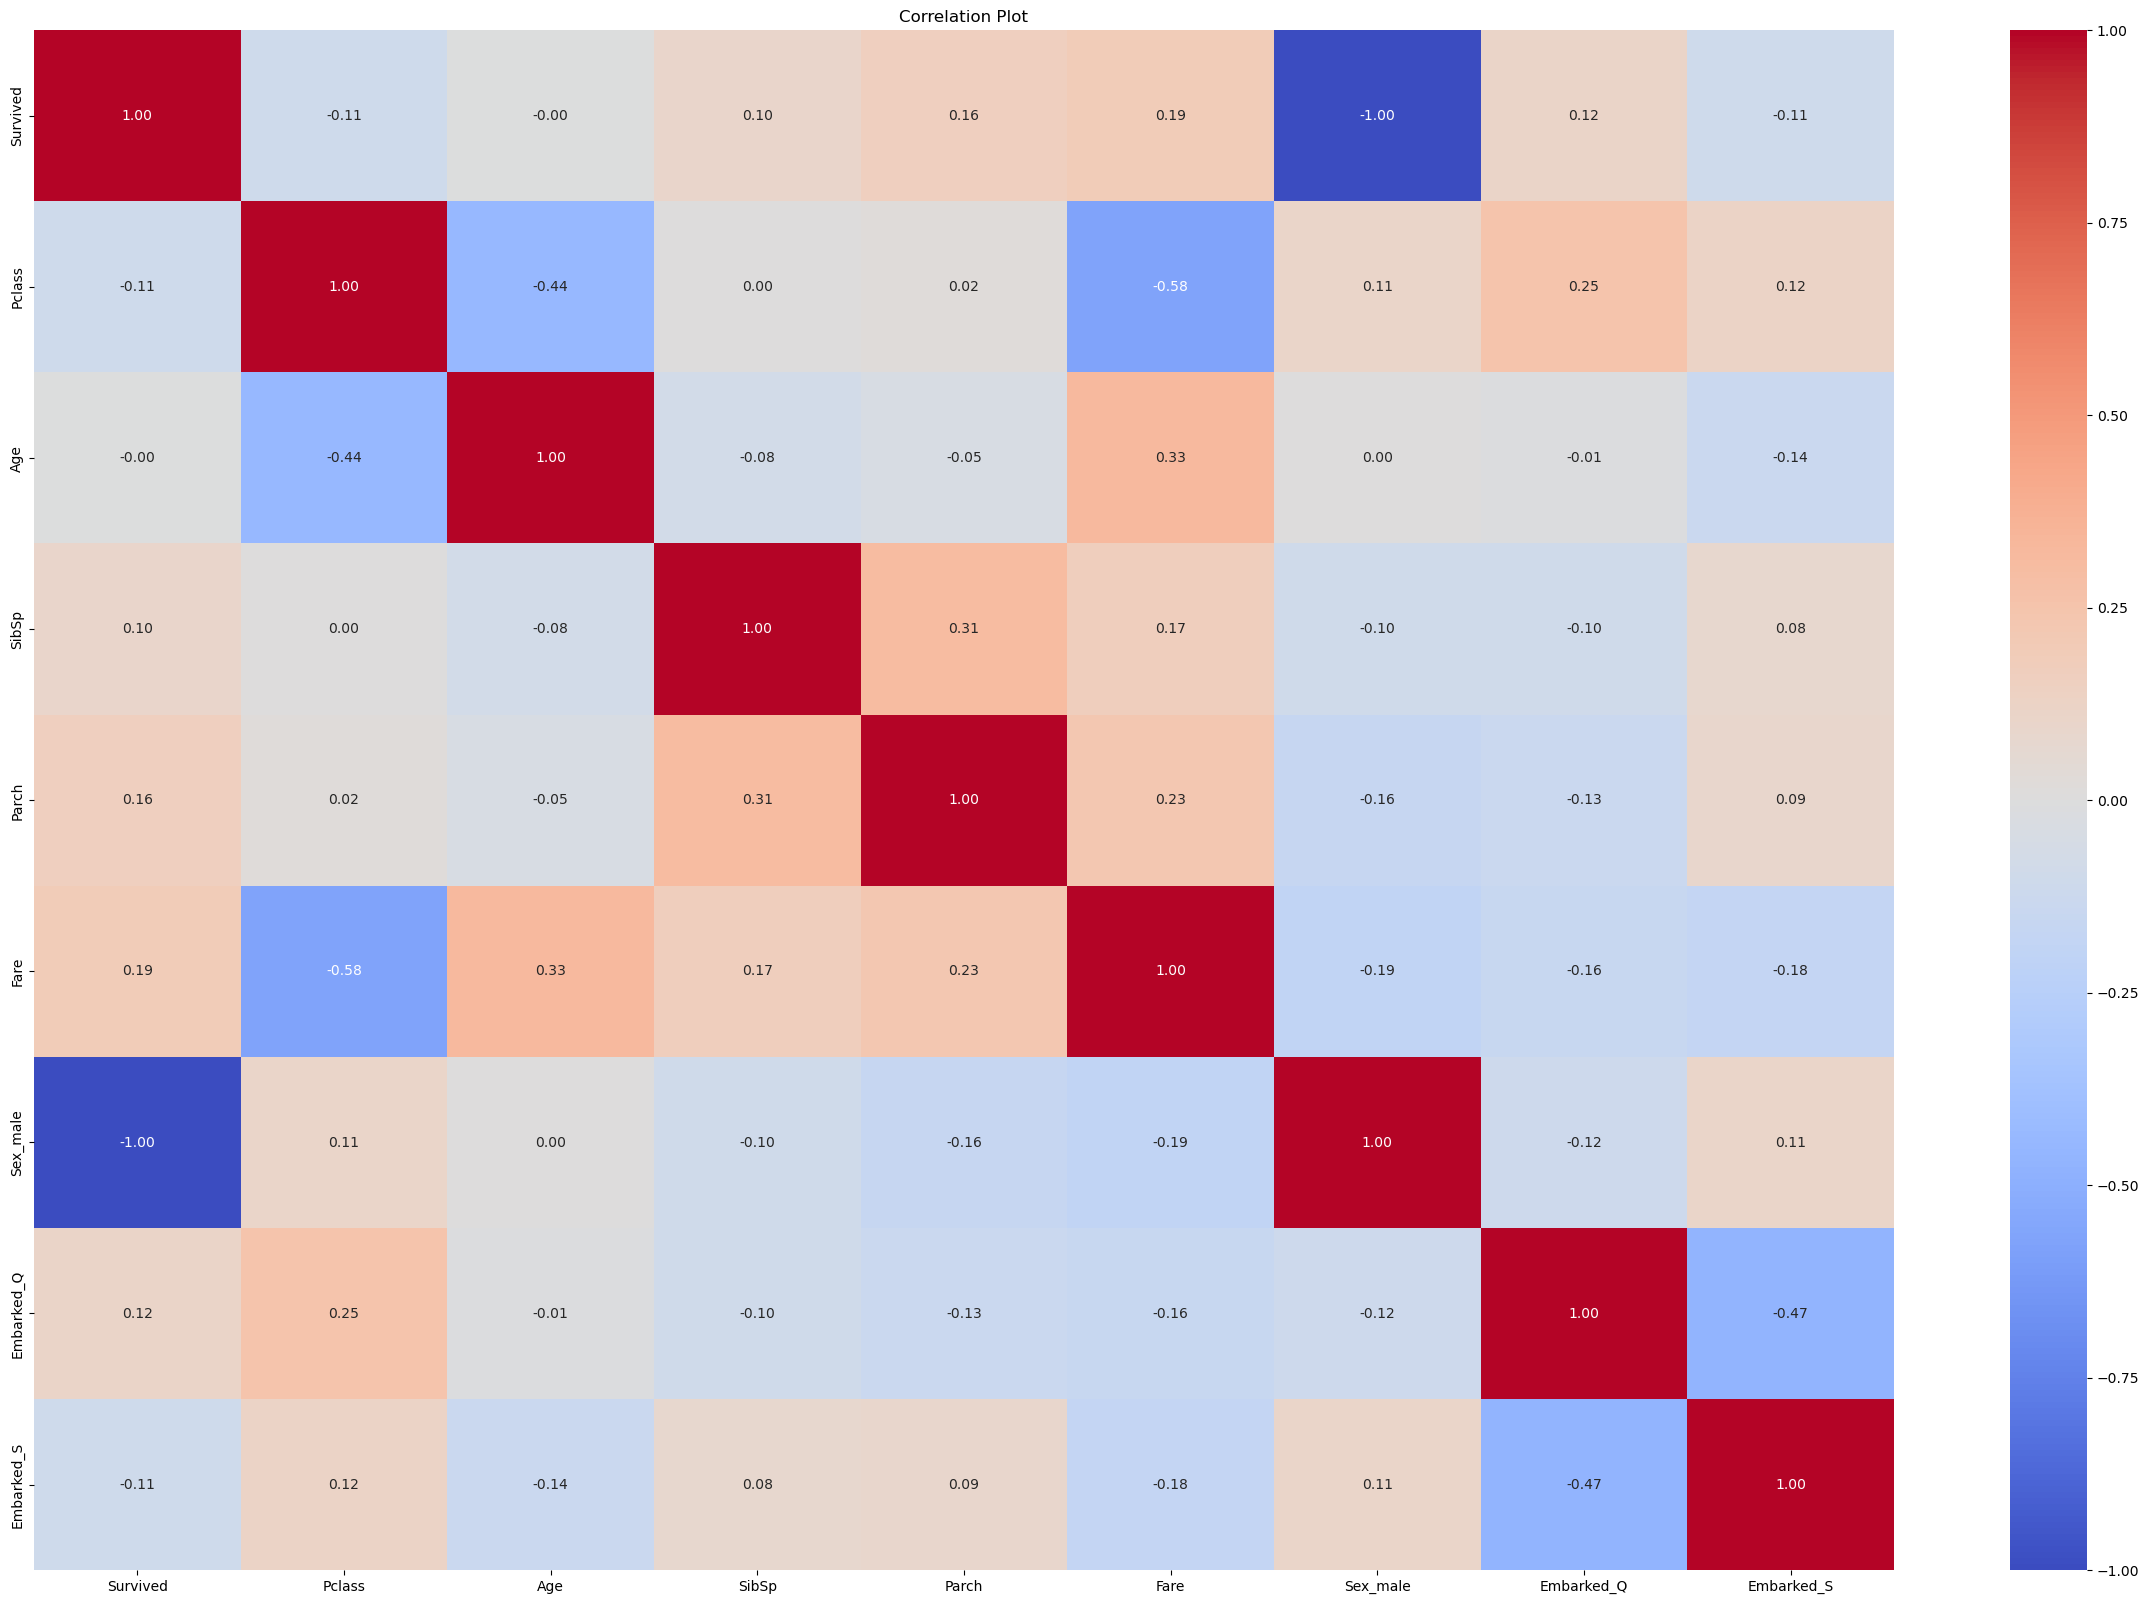

In [40]:
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True,cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [42]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [43]:
columns_to_scale=['Age','Fare']

In [44]:
df[columns_to_scale]=scaler.fit_transform(df[columns_to_scale])

In [45]:
df

Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0           0       3  0.452723      0      0  0.015282         1           1   
1           1       3  0.617566      1      0  0.013663         0           0   
2           0       2  0.815377      0      0  0.018909         1           1   
3           0       3  0.353818      0      0  0.016908         1           0   
4           1       3  0.287881      1      1  0.023984         0           0   
..        ...     ...       ...    ...    ...       ...       ...         ...   
413         0       3  0.396975      0      0  0.015713         1           0   
414         1       1  0.512066      0      0  0.212559         0           0   
415         0       3  0.505473      0      0  0.014151         1           0   
416         0       3  0.396975      0      0  0.015713         1           0   
417         0       3  0.396975      1      1  0.043640         1           0   

     Embarked_S  
0             0  
1             1  
2             0  
3             1  
4             1  
..          ...  
413           1  
414           0  
415           1  
416           1  
417           0  

[418 rows x 9 columns]

In [46]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred=logreg.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
log_score=accuracy_score(y_test,y_pred)

In [53]:
print(log_score)

1.0


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt_model = DecisionTreeClassifier()

In [56]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred_dt = dt_model.predict(X_test)

In [58]:
dt_score =accuracy_score(y_test,y_pred_dt)

In [59]:
print(dt_score)

1.0


In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf_classifier = RandomForestClassifier()

In [62]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
y_pred_rf = rf_classifier.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test,y_pred_rf)

In [65]:
accuracy

1.0

In [66]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [67]:
cm=confusion_matrix(y_test,y_pred_rf)
cm

array([[53,  0],
       [ 0, 31]], dtype=int64)

In [68]:
f1=f1_score(y_test,y_pred_rf)
f1

1.0

In [69]:
precision=precision_score(y_test,y_pred_rf)
precision

1.0

In [70]:
recall=recall_score(y_test,y_pred_rf)
recall

1.0

In [71]:
cr=classification_report(y_test,y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

